# Fantasy Football Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ffball_project_data_2.csv')

In [3]:
df = df.sort_values(['player_id','season'])

In [4]:
df.head()

player_id        player_name position recent_team  season  \
8319  00-0000104        Troy Aikman       QB         DAL  1999.0   
8320  00-0000104        Troy Aikman       QB         DAL  2000.0   
2551  00-0000145  Derrick Alexander       WR          KC  1999.0   
2552  00-0000145  Derrick Alexander       WR          KC  2000.0   
2553  00-0000145  Derrick Alexander       WR          KC  2001.0   

      games_played  injured injury type injury severity season ending  ...  \
8319          14.0      1.0  concussion           minor            no  ...   
8320          11.0      1.0  concussion            mild            no  ...   
2551          16.0      0.0         NaN             NaN           NaN  ...   
2552          15.0      0.0         NaN             NaN           NaN  ...   
2553          13.0      1.0    achilles            mild            no  ...   

      receiving_epa  receiving_2pt_conversions  racr  target_share  \
8319            NaN                        0.0   NaN           NaN   
8320            NaN                        0.0   NaN           NaN   
2551      22.726649                        0.0   0.0      0.216717   
2552      36.469097                        0.0   0.0      0.253858   
2553       2.118593                        0.0   0.0      0.163619   

      air_yards_share  wopr  special_teams_tds  fantasy_points  \
8319              NaN   NaN                0.0          167.80   
8320              NaN   NaN                0.0           63.94   
2551              NaN   NaN                0.0          109.40   
2552              NaN   NaN                0.0          185.00   
2553              NaN   NaN                0.0           66.60   

      fantasy_points_ppr  max_fantasy_points  
8319              167.80               167.8  
8320               63.94               167.8  
2551              163.40               257.0  
2552              257.00               257.0  
2553               93.60               257.0  

[5 rows x 53 columns]

In [5]:
id_list = df['player_id'].to_list()
team_list = df['recent_team'].to_list()

In [6]:
# Creates variable if player goes to new team

new_team = []
for i in range(len(id_list)):
    if id_list[i-1] == id_list[i]:
        if team_list[i-1] != team_list[i]:
            new_team.append(1)
        else:
            new_team.append(0)
    else:
        new_team.append(0)


In [7]:
df['new_team'] = new_team
qb_passing_yards_df = df[df['passing_yards']> 4000]
qb_passing_yards_df = qb_passing_yards_df[['player_id','player_name','position','recent_team','season','passing_yards']]
qb_passing_yards_df['qb_with_4000+_passing'] = 1
temp_df = qb_passing_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season'] + 1
temp_df.head()

player_id  season
7654  00-0001218  2000.0
2945  00-0001361  2003.0
5107  00-0003292  2003.0
2221  00-0003739  2005.0
1044  00-0005106  2000.0

In [8]:
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [9]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

[('00-0001218', 2000.0), ('00-0001361', 2003.0), ('00-0003292', 2003.0), ('00-0003739', 2005.0), ('00-0005106', 2000.0), ('00-0005106', 2005.0), ('00-0005106', 2008.0), ('00-0005106', 2010.0), ('00-0005741', 2003.0), ('00-0005755', 2001.0), ('00-0006355', 2004.0), ('00-0006355', 2005.0), ('00-0006355', 2006.0), ('00-0009311', 2007.0), ('00-0009311', 2008.0), ('00-0010346', 2000.0), ('00-0010346', 2001.0), ('00-0010346', 2002.0), ('00-0010346', 2003.0), ('00-0010346', 2004.0), ('00-0010346', 2005.0), ('00-0010346', 2007.0), ('00-0010346', 2008.0), ('00-0010346', 2009.0), ('00-0010346', 2010.0), ('00-0010346', 2011.0), ('00-0010346', 2013.0), ('00-0010346', 2014.0), ('00-0010346', 2015.0), ('00-0013042', 2005.0), ('00-0017200', 2002.0), ('00-0017200', 2009.0), ('00-0019596', 2006.0), ('00-0019596', 2008.0), ('00-0019596', 2010.0), ('00-0019596', 2012.0), ('00-0019596', 2013.0), ('00-0019596', 2014.0), ('00-0019596', 2015.0), ('00-0019596', 2016.0), ('00-0019596', 2018.0), ('00-0019596', 

In [10]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0001218, Season: 2000.0, Team: CAR
Player ID: 00-0001361, Season: 2003.0, Team: BUF
Player ID: 00-0003292, Season: 2003.0, Team: NYG
Player ID: 00-0003739, Season: 2005.0, Team: MIN
Player ID: 00-0005106, Season: 2000.0, Team: GB
Player ID: 00-0005106, Season: 2005.0, Team: GB
Player ID: 00-0005106, Season: 2008.0, Team: NYJ
Player ID: 00-0005106, Season: 2010.0, Team: MIN
Player ID: 00-0005741, Season: 2003.0, Team: LV
Player ID: 00-0005755, Season: 2001.0, Team: SF
Player ID: 00-0006355, Season: 2004.0, Team: KC
Player ID: 00-0006355, Season: 2005.0, Team: KC
Player ID: 00-0006355, Season: 2006.0, Team: KC
Player ID: 00-0009311, Season: 2007.0, Team: DET
Player ID: 00-0009311, Season: 2008.0, Team: DET
Player ID: 00-0010346, Season: 2000.0, Team: IND
Player ID: 00-0010346, Season: 2001.0, Team: IND
Player ID: 00-0010346, Season: 2002.0, Team: IND
Player ID: 00-0010346, Season: 2003.0, Team: IND
Player ID: 00-0010346, Season: 2004.0, Team: IND
Player ID: 00-0010346, Seas

In [11]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [12]:
df['QB_4000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Check if the (season, team) pair is in your list of tuples and position is not 'QB'
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'QB':
        # Update the "QB_4000_yards" column to 1 for rows that meet the criteria
        df.at[index, 'QB_4000_yards'] = 1

In [13]:
receiving_yards_df = df[df['receiving_yards']> 1000]
receiving_yards_df = receiving_yards_df[['player_id','player_name','position','recent_team','season','receiving_yards']]
temp_df = receiving_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [14]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000145', 2001.0), ('00-0001477', 2002.0), ('00-0001477', 2003.0), ('00-0001532', 2001.0), ('00-0001532', 2002.0), ('00-0002058', 2000.0), ('00-0002058', 2001.0), ('00-0002058', 2002.0), ('00-0002068', 2002.0), ('00-0002099', 2000.0), ('00-0002099', 2001.0), ('00-0002099', 2002.0), ('00-0002099', 2003.0), ('00-0002099', 2005.0), ('00-0002099', 2007.0), ('00-0002721', 2000.0), ('00-0002721', 2001.0), ('00-0003378', 2000.0), ('00-0003396', 2002.0), ('00-0003700', 2000.0), ('00-0004541', 2003.0), ('00-0004541', 2005.0), ('00-0004541', 2006.0), ('00-0004541', 2007.0), ('00-0004541', 2008.0), ('00-0004541', 2009.0), ('00-0004541', 2010.0), ('00-0004915', 2008.0), ('00-0005562', 2000.0), ('00-0005720', 2006.0), ('00-0005720', 2007.0), ('00-0005720', 2008.0), ('00-0006043', 2000.0), ('00-0006043', 2006.0), ('00-0006043', 2007.0), ('00-0006101', 2001.0), ('00-0006101', 2005.0), ('00-0006101', 2008.0), ('00-0006101', 2009.0), ('00-0007024', 2000.0), ('00-0007024', 2001.0), ('00-0007024', 

In [15]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000145, Season: 2001.0, Team: KC
Player ID: 00-0001477, Season: 2002.0, Team: CHI
Player ID: 00-0001477, Season: 2003.0, Team: CHI
Player ID: 00-0001532, Season: 2001.0, Team: ARI
Player ID: 00-0001532, Season: 2002.0, Team: ARI
Player ID: 00-0002058, Season: 2000.0, Team: LV
Player ID: 00-0002058, Season: 2001.0, Team: LV
Player ID: 00-0002058, Season: 2002.0, Team: LV
Player ID: 00-0002068, Season: 2002.0, Team: NE
Player ID: 00-0002099, Season: 2000.0, Team: LA
Player ID: 00-0002099, Season: 2001.0, Team: LA
Player ID: 00-0002099, Season: 2002.0, Team: LA
Player ID: 00-0002099, Season: 2003.0, Team: LA
Player ID: 00-0002099, Season: 2005.0, Team: LA
Player ID: 00-0002099, Season: 2007.0, Team: LA
Player ID: 00-0002721, Season: 2000.0, Team: MIN
Player ID: 00-0002721, Season: 2001.0, Team: MIN
Player ID: 00-0003378, Season: 2000.0, Team: WAS
Player ID: 00-0003396, Season: 2002.0, Team: LAC
Player ID: 00-0003700, Season: 2000.0, Team: DET
Player ID: 00-0004541, Season: 

In [16]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [17]:
df['Receiving_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] in ('QB', 'RB'):
        df.at[index, 'Receiving_1000_yards'] +=1

In [18]:
rushing_yards_df = df[df['rushing_yards']> 1000]
rushing_yards_df = rushing_yards_df[['player_id','player_name','position','recent_team','season','rushing_yards']]
temp_df = rushing_yards_df[['player_id','season']].copy()
temp_df['season'] = temp_df['season']+1
id_4000 = temp_df['player_id'].to_list()
season_4000 = temp_df['season'].to_list()

In [19]:
list_of_tuples = list(zip(id_4000, season_4000))
print(list_of_tuples)
tuples_of_tuples = tuple(list_of_tuples)

print(tuples_of_tuples)

[('00-0000210', 2001.0), ('00-0000316', 2001.0), ('00-0000745', 2001.0), ('00-0000745', 2003.0), ('00-0000745', 2004.0), ('00-0000745', 2005.0), ('00-0000745', 2006.0), ('00-0000745', 2007.0), ('00-0001215', 2000.0), ('00-0001215', 2001.0), ('00-0001215', 2002.0), ('00-0004052', 2000.0), ('00-0004052', 2001.0), ('00-0004052', 2002.0), ('00-0004052', 2004.0), ('00-0004304', 2000.0), ('00-0004304', 2001.0), ('00-0004304', 2002.0), ('00-0004304', 2003.0), ('00-0004304', 2005.0), ('00-0004640', 2001.0), ('00-0004640', 2005.0), ('00-0004640', 2006.0), ('00-0004640', 2007.0), ('00-0005092', 2000.0), ('00-0005092', 2001.0), ('00-0005092', 2002.0), ('00-0005779', 2000.0), ('00-0005779', 2001.0), ('00-0005816', 2000.0), ('00-0005883', 2000.0), ('00-0005883', 2001.0), ('00-0005883', 2003.0), ('00-0005883', 2004.0), ('00-0006305', 2001.0), ('00-0006305', 2002.0), ('00-0006305', 2003.0), ('00-0006305', 2004.0), ('00-0006305', 2005.0), ('00-0006305', 2007.0), ('00-0007180', 2002.0), ('00-0007661', 

In [20]:
def find_teams(df, tuples_of_tuples):
    teams = []
    for player_id, season in tuples_of_tuples:
        team = df[(df['player_id'] == player_id) & (df['season'] == season)]['recent_team'].values
        if len(team) > 0:
            teams.append((player_id, season, team[0]))
        else:
            teams.append((player_id, season, 'Team Not Found'))
    return teams

# Use the function
teams_list = find_teams(df, tuples_of_tuples)

# Display the result
for item in teams_list:
    print(f"Player ID: {item[0]}, Season: {item[1]}, Team: {item[2]}")

Player ID: 00-0000210, Season: 2001.0, Team: CHI
Player ID: 00-0000316, Season: 2001.0, Team: ATL
Player ID: 00-0000745, Season: 2001.0, Team: NYG
Player ID: 00-0000745, Season: 2003.0, Team: NYG
Player ID: 00-0000745, Season: 2004.0, Team: NYG
Player ID: 00-0000745, Season: 2005.0, Team: NYG
Player ID: 00-0000745, Season: 2006.0, Team: NYG
Player ID: 00-0000745, Season: 2007.0, Team: Team Not Found
Player ID: 00-0001215, Season: 2000.0, Team: PIT
Player ID: 00-0001215, Season: 2001.0, Team: PIT
Player ID: 00-0001215, Season: 2002.0, Team: PIT
Player ID: 00-0004052, Season: 2000.0, Team: WAS
Player ID: 00-0004052, Season: 2001.0, Team: WAS
Player ID: 00-0004052, Season: 2002.0, Team: WAS
Player ID: 00-0004052, Season: 2004.0, Team: CAR
Player ID: 00-0004304, Season: 2000.0, Team: CIN
Player ID: 00-0004304, Season: 2001.0, Team: CIN
Player ID: 00-0004304, Season: 2002.0, Team: CIN
Player ID: 00-0004304, Season: 2003.0, Team: CIN
Player ID: 00-0004304, Season: 2005.0, Team: NE
Player ID:

In [21]:
filtered_tuples = [(season, team) for player_id, season, team in teams_list if team != "Team Not Found"]

In [22]:
df['rushing_1000_yards'] = 0

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    if (row['season'], row['recent_team']) in filtered_tuples and row['position'] != 'RB':
        df.at[index, 'rushing_1000_yards'] +=1

In [23]:
df['fantasy_points_per_game'] = df['fantasy_points_ppr']/df['games_played']

In [24]:
# Get rid of missing values for stat columns
numeric_cols = df.select_dtypes(include=['float', 'int']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# fills na in injury columns
df['injury type'].fillna('no injury',inplace=True)
df['injury severity'].fillna('no injury',inplace=True)
df['season ending'].fillna('no injury',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8737 entries, 8319 to 8736
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8735 non-null   object 
 1   player_name                  8735 non-null   object 
 2   position                     8735 non-null   object 
 3   recent_team                  8735 non-null   object 
 4   season                       8737 non-null   float64
 5   games_played                 8737 non-null   float64
 6   injured                      8737 non-null   float64
 7   injury type                  8737 non-null   object 
 8   injury severity              8737 non-null   object 
 9   season ending                8737 non-null   object 
 10  completions                  8737 non-null   float64
 11  attempts                     8737 non-null   float64
 12  passing_yards                8737 non-null   float64
 13  passing_tds    

In [25]:
# Group by player_id and season, and count the number of unique teams
player_team_counts = df.groupby(['player_id', 'season'])['recent_team'].nunique()

# Filter to find instances where a player has played for more than one team in the same season
multiple_teams = player_team_counts[player_team_counts > 1]

# Show the results
multiple_teams.head(), multiple_teams.shape


(player_id   season
 00-0006331  2002.0    2
 00-0008210  2002.0    2
 00-0008560  2003.0    2
 00-0008612  2003.0    2
 00-0009163  2001.0    2
 Name: recent_team, dtype: int64,
 (173,))

In [26]:
# Correct the aggregation process
# Since 'season' is used in both grouping and aggregation, let's avoid using it in the aggregation dictionary directly

# Define aggregation rules specifically
aggregations = {
    'recent_team': 'last',
    'games_played': 'sum',
    'injured': 'max',  # Assuming 1 is injured, 0 is not injured
    'injury type': 'last',  # Taking the first non-null injury type
    'injury severity': 'last',  # Taking the first non-null injury severity
    'season ending': 'last',  # Taking the first non-null season ending
    'max_fantasy_points': 'max',
    'new_team':'first',
    'QB_4000_yards':'first',
    'Receiving_1000_yards':'first',
    'rushing_1000_yards':'first',
    'racr':'mean',
    'target_share':'mean',
    'air_yards_share':'mean',
    'wopr':'mean'
}

# Automatically adding all numerical columns to aggregations, except those handled specifically above
for col in df.columns:
    if df[col].dtype in ['float64', 'int64'] and col not in aggregations and col != 'season':
        aggregations[col] = 'sum'

# Group by player_id, player_name, position, and season and aggregate according to the defined rules
df = df.groupby(['player_id', 'player_name', 'position', 'season']).agg(aggregations).reset_index()

# Check the first few rows of the consolidated data
df.head()


player_id        player_name position  season recent_team  games_played  \
0  00-0000104        Troy Aikman       QB  1999.0         DAL          14.0   
1  00-0000104        Troy Aikman       QB  2000.0         DAL          11.0   
2  00-0000145  Derrick Alexander       WR  1999.0          KC          16.0   
3  00-0000145  Derrick Alexander       WR  2000.0          KC          15.0   
4  00-0000145  Derrick Alexander       WR  2001.0          KC          13.0   

   injured injury type injury severity season ending  ...  \
0      1.0  concussion           minor            no  ...   
1      1.0  concussion            mild            no  ...   
2      0.0   no injury       no injury     no injury  ...   
3      0.0   no injury       no injury     no injury  ...   
4      1.0    achilles            mild            no  ...   

   receiving_fumbles_lost  receiving_air_yards  receiving_yards_after_catch  \
0                     0.0                  0.0                          0.0   
1                     0.0                  0.0                          0.0   
2                     0.0                  0.0                          0.0   
3                     0.0                  0.0                          0.0   
4                     0.0                  0.0                          0.0   

   receiving_first_downs  receiving_epa  receiving_2pt_conversions  \
0                    0.0       0.000000                        0.0   
1                    0.0       0.000000                        0.0   
2                   31.0      22.726649                        0.0   
3                   51.0      36.469097                        0.0   
4                   22.0       2.118593                        0.0   

   special_teams_tds  fantasy_points  fantasy_points_ppr  \
0                0.0          167.80              167.80   
1                0.0           63.94               63.94   
2                0.0          109.40              163.40   
3                0.0          185.00              257.00   
4                0.0           66.60               93.60   

   fantasy_points_per_game  
0                11.985714  
1                 5.812727  
2                10.212500  
3                17.133333  
4                 7.200000  

[5 rows x 58 columns]

In [27]:
temp_df = pd.DataFrame(multiple_teams).reset_index()
temp_df['changed_teams_midseason'] = 1
temp_df.drop(columns=['recent_team'],inplace=True)
df = pd.merge(df, temp_df, on=['player_id','season'], how='left')
df['changed_teams_midseason'].fillna(0, inplace=True)

In [28]:
df.sort_values(['player_name', 'season'], inplace=True)

# Shift the 'recent_team' within each player's data to propagate the previous year's team to the current year
df['recent_team'] = df.groupby('player_name')['recent_team'].shift(-1)

# Since the last season for each player will now have a NaN for 'recent_team', you might want to fill it with the current value
df['recent_team'] = df['recent_team'].fillna(method='ffill')

# Merging Datasets 

In [29]:
# dataset containing categorical information on each player
df2 = pd.read_csv('player_info.csv',encoding='ISO-8859-1')

In [30]:
df2.shape

(1431, 10)

In [31]:
# Get rid of rows with no data

columns_except_name = df2.columns.drop('player_name')
rows_with_only_name = df2[df2[columns_except_name].isnull().all(axis=1)]

# Removing those rows from the dataset
cleaned_data = df2.drop(rows_with_only_name.index)


In [32]:
df2.shape

(1431, 10)

In [33]:
# Convert height to total inches: (feet * 12) + inches
cleaned_data['height_in_inches'] = df2['feet'].fillna(0) * 12 + df2['inches'].fillna(0)

# Dropping the original feet and inches columns
cleaned_data = cleaned_data.drop(columns=['feet', 'inches'])

In [34]:
cleaned_data['draft_info'].count()

1186

In [35]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
cleaned_data['draft_pick'], cleaned_data['draft_year'] = zip(*cleaned_data['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
cleaned_data[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0      Jared Goff  Draft: Los Angeles Rams in the 1st round (1st ...   
1     Evan Engram  Draft: New York Giants in the 1st round (23rd ...   
2  Shane Matthews                                                NaN   
3     Alec Pierce  Draft: Indianapolis Colts in the 2nd round (53...   
4      Jared Cook  Draft: Tennessee Titans in the 3rd round (89th...   

  draft_pick draft_year  
0          1       2016  
1         23       2017  
2       None       None  
3         53       2022  
4         89       2009

In [36]:
# dataset for info of players that have the same name
duplicate_df = pd.read_csv('duplicate_player_info.csv')

In [37]:
# Convert height to total inches: (feet * 12) + inches
duplicate_df['height_in_inches'] = duplicate_df['feet'].fillna(0) * 12 + duplicate_df['inches'].fillna(0)

# Dropping the original feet and inches columns
duplicate_df = duplicate_df.drop(columns=['feet', 'inches'])

In [38]:
import re

# Function to handle all variations of ordinal numbers in the draft pick extraction
def extract_draft_details_final_fix(draft_info):
    if pd.isna(draft_info):
        return None, None
    pick_match = re.search(r'\((\d+)(st|nd|rd|th) overall\)', draft_info)
    year_match = re.search(r'(\d{4}) NFL Draft', draft_info)
    pick = pick_match.group(1) if pick_match else None
    year = year_match.group(1) if year_match else None
    return pick, year

# Apply the function and update the columns
duplicate_df['draft_pick'], duplicate_df['draft_year'] = zip(*duplicate_df['draft_info'].apply(extract_draft_details_final_fix))

# Display the updated data to confirm correct extraction
duplicate_df[['player_name', 'draft_info', 'draft_pick', 'draft_year']].head()


player_name                                         draft_info  \
0  Michael Pittman  Draft: Arizona Cardinals in the 4th round (95t...   
1  Michael Pittman  Draft: Indianapolis Colts in the 2nd round (34...   
2    Mike Williams  Draft: Detroit Lions in the 1st round (10th ov...   
3    Mike Williams  Draft: Tampa Bay Buccaneers in the 4th round (...   
4    Mike Williams  Draft: Los Angeles Chargers in the 1st round (...   

  draft_pick draft_year  
0         95       1998  
1         34       2020  
2         10       2005  
3        101       2010  
4          7       2017

In [39]:
merged_data = pd.merge(df, cleaned_data, on='player_name', how='inner')

In [40]:
# full birthday data for each player
birthday_df = pd.read_csv('player_birthday.csv')

In [41]:
merged_data.drop(columns=['birthday'],inplace=True)

In [42]:
merged_data = pd.merge(merged_data, birthday_df, on='player_name', how='inner')

In [43]:
merged_data2 = pd.merge(df, duplicate_df, on=['player_id','player_name'], how='inner')

In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 8399
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    8400 non-null   object 
 1   player_name                  8400 non-null   object 
 2   position                     8400 non-null   object 
 3   season                       8400 non-null   float64
 4   recent_team                  8400 non-null   object 
 5   games_played                 8400 non-null   float64
 6   injured                      8400 non-null   float64
 7   injury type                  8400 non-null   object 
 8   injury severity              8400 non-null   object 
 9   season ending                8400 non-null   object 
 10  max_fantasy_points           8400 non-null   float64
 11  new_team                     8400 non-null   int64  
 12  QB_4000_yards                8400 non-null   int64  
 13  Receiving_1000_yar

In [45]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 0 to 134
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    135 non-null    object 
 1   player_name                  135 non-null    object 
 2   position                     135 non-null    object 
 3   season                       135 non-null    float64
 4   recent_team                  135 non-null    object 
 5   games_played                 135 non-null    float64
 6   injured                      135 non-null    float64
 7   injury type                  135 non-null    object 
 8   injury severity              135 non-null    object 
 9   season ending                135 non-null    object 
 10  max_fantasy_points           135 non-null    float64
 11  new_team                     135 non-null    int64  
 12  QB_4000_yards                135 non-null    int64  
 13  Receiving_1000_yards

In [46]:
# Convert weight(lbs.) to string for both datasets if not merging on this, or to int if you are.
merged_data['weight(lbs.)'] = merged_data['weight(lbs.)'].astype(str)
merged_data2['weight(lbs.)'] = merged_data2['weight(lbs.)'].astype(str)

# Convert height_in_inches to float for both datasets if they're used in merging or comparisons.
merged_data['height_in_inches'] = merged_data['height_in_inches'].astype(float)
merged_data2['height_in_inches'] = merged_data2['height_in_inches'].astype(float)

merged_data = pd.merge(merged_data, merged_data2, how='outer')


In [47]:
# Check to make sure same number of rows as original dataset

print(merged_data.shape)
print(df.shape)

(8535, 70)
(8557, 59)


In [48]:
# Dataset with information on head coach and regular season record
coach_data = pd.read_excel('NFL Coach Data.xlsx')

In [49]:
coach_data.head()

coach_name recent_team  season  (1=firstyearwithteam,0=2+seasons)  \
0    VinceTobin         ARI    1999                                  0   
1    VinceTobin         ARI    2000                                  0   
2  DaveMcGinnis         ARI    2001                                  1   
3  DaveMcGinnis         ARI    2002                                  0   
4  DaveMcGinnis         ARI    2003                                  0   

   years_coached  wins  loses  ties  
0            3.0   6.0   10.0   0.0  
1            4.0   3.0   13.0   0.0  
2            0.0   7.0    9.0   0.0  
3            1.0   5.0   11.0   0.0  
4            2.0   4.0   12.0   0.0

In [50]:
# Final merge
df = pd.merge(merged_data, coach_data , on=['recent_team','season'], how='left')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8535 entries, 0 to 8534
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   player_id                          8535 non-null   object 
 1   player_name                        8535 non-null   object 
 2   position                           8535 non-null   object 
 3   season                             8535 non-null   float64
 4   recent_team                        8535 non-null   object 
 5   games_played                       8535 non-null   float64
 6   injured                            8535 non-null   float64
 7   injury type                        8535 non-null   object 
 8   injury severity                    8535 non-null   object 
 9   season ending                      8535 non-null   object 
 10  max_fantasy_points                 8535 non-null   float64
 11  new_team                           8535 non-null   int64

In [52]:
df['wins'].fillna(df['wins'].mean(),inplace=True)
df['loses'].fillna(df['loses'].mean(),inplace=True)
df['ties'].fillna(df['ties'].mean(),inplace=True)
df['years_coached'].fillna(0,inplace=True)

# Data Preprocessing 

In [53]:
# drop columns not neccessary for model
df.drop(columns=['college','high_school_name','high_school_state','draft_info','max_fantasy_points','born','draft_team','recent_team'],inplace=True)

In [54]:
# Get rid of instances for weight where lb is contained
df['weight']=df['weight(lbs.)'].str.replace('lb','')
df.drop(columns=['weight(lbs.)'],inplace=True)
df['weight'] = df['weight'].astype(int)

In [55]:
# Extract year from birthday column
df['birthday'] = pd.to_datetime(df['birthday'])

# Format the datetime objects to 'MM/DD/YYYY'
df['birthday'] = df['birthday'].dt.strftime('%m/%d/%Y')

df['birthday'] = pd.to_datetime(df['birthday'])

# Extract the year and create a new column
df['birthday_year'] = df['birthday'].dt.year
df['birthday_year']

0       1997
1       1997
2       1997
3       1997
4       1997
        ... 
8530    1984
8531    1984
8532    1984
8533    1984
8534    1984
Name: birthday_year, Length: 8535, dtype: int64

In [56]:
# get age of player for each season
df['age'] = df['season'] - df['birthday_year']
df['age']

0       22.0
1       23.0
2       24.0
3       25.0
4       26.0
        ... 
8530    26.0
8531    27.0
8532    31.0
8533    32.0
8534    33.0
Name: age, Length: 8535, dtype: float64

In [57]:
df.drop(columns=['birthday','birthday_year'],inplace=True)

In [58]:
# assign all undrafted players to 999th pick for binning purposes
df['draft_pick'].fillna('999',inplace=True)
df['draft_pick'] = df['draft_pick'].astype(int)

In [59]:
# bin weights
weight_bins = range(160, 281, 20)
df['binned_weight'] = pd.cut(df['weight'], bins=weight_bins, right=False,
                               labels=[f"{i}-{i+19}" for i in weight_bins[:-1]])

In [60]:
# bin heights
height_bins = range(66, 82, 3)
df['binned_height'] = pd.cut(df['height_in_inches'], bins=height_bins, right=False,
                               labels=[f"{i}-{i+2}" for i in height_bins[:-1]])

In [61]:
# bin draft picks
# bins aren't 100% accurate just because there are different amount picks in each round due
# to compensatory picks and penaltys

draft_bins = [0,6,17,33,49,65,101,141,181,221,500,1000]
df['binned_draft_pick'] = pd.cut(df['draft_pick'], bins=draft_bins, right=False, labels=
 ["Top 5", "Early 1st Round", "Late First Round", "Early Second Round","Late Second Round",
"Third Round","Fourth Round","Fifth Round","Sixth Round","Seventh Round","Undrafted"])

In [62]:
df['binned_draft_pick'].value_counts()

Undrafted             1421
Third Round           1284
Late First Round       921
Fourth Round           815
Early Second Round     739
Late Second Round      691
Early 1st Round        677
Fifth Round            618
Top 5                  559
Sixth Round            489
Seventh Round          321
Name: binned_draft_pick, dtype: int64

In [63]:
# assign draft year for undrafted players as first year they played
temp_df = pd.DataFrame(df[df['draft_year'].isna() == True].groupby('player_id')['season'].min())
temp_df['draft_year'] = temp_df['season']
temp_df.drop(columns=['season'],inplace=True)

In [64]:
temp_df.shape

(248, 1)

In [65]:
temp_df2 = pd.DataFrame(df[df['draft_year'].isna() == False].groupby('player_id')['draft_year'].min())
temp_df = pd.concat([temp_df,temp_df2])

In [66]:
df = pd.merge(df, temp_df , on='player_id', how='outer')

In [67]:
df[['draft_year_x','draft_year_y']]

draft_year_x draft_year_y
0            2019         2019
1            2019         2019
2            2019         2019
3            2019         2019
4            2019         2019
...           ...          ...
8530         2009         2009
8531         2009         2009
8532         2009         2009
8533         2009         2009
8534         2009         2009

[8535 rows x 2 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8535 entries, 0 to 8534
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          8535 non-null   object  
 1   player_name                        8535 non-null   object  
 2   position                           8535 non-null   object  
 3   season                             8535 non-null   float64 
 4   games_played                       8535 non-null   float64 
 5   injured                            8535 non-null   float64 
 6   injury type                        8535 non-null   object  
 7   injury severity                    8535 non-null   object  
 8   season ending                      8535 non-null   object  
 9   new_team                           8535 non-null   int64   
 10  QB_4000_yards                      8535 non-null   int64   
 11  Receiving_1000_yards               8535 non

In [69]:
df['draft_year'] = df['draft_year_y']
df.drop(columns=['draft_year_y','draft_year_x'],inplace=True)

In [70]:
# need to fix this issue where players could have been drafted before 1999
df[(df['binned_draft_pick'] == 'Undrafted') & (df['draft_year'] == 1999)]

player_id      player_name position  season  games_played  injured  \
817   00-0001098  Brandon Bennett       RB  1999.0           0.0      1.0   
818   00-0001098  Brandon Bennett       RB  2000.0          15.0      0.0   
819   00-0001098  Brandon Bennett       RB  2001.0          15.0      0.0   
820   00-0001098  Brandon Bennett       RB  2002.0          10.0      1.0   
821   00-0001098  Brandon Bennett       RB  2003.0          14.0      0.0   
...          ...              ...      ...     ...           ...      ...   
8265  00-0002962    Wayne Chrebet       WR  2001.0          15.0      0.0   
8266  00-0002962    Wayne Chrebet       WR  2002.0          15.0      0.0   
8267  00-0002962    Wayne Chrebet       WR  2003.0           7.0      1.0   
8268  00-0002962    Wayne Chrebet       WR  2004.0          14.0      1.0   
8269  00-0002962    Wayne Chrebet       WR  2005.0           6.0      1.0   

     injury type injury severity season ending  new_team  ...  years_coached  \
817         knee          severe           yes         0  ...            7.0   
818    no injury       no injury     no injury         0  ...            8.0   
819    no injury       no injury     no injury         0  ...            1.0   
820         knee            mild            no         0  ...            2.0   
821    no injury       no injury     no injury         0  ...            1.0   
...          ...             ...           ...       ...  ...            ...   
8265   no injury       no injury     no injury         0  ...            0.0   
8266   no injury       no injury     no injury         0  ...            1.0   
8267        head        moderate            no         0  ...            2.0   
8268         leg           minor            no         0  ...            3.0   
8269        head          severe           yes         0  ...            4.0   

      wins  loses  ties  weight   age  binned_weight  binned_height  \
817    4.0   12.0   0.0     220  26.0        220-239          69-71   
818    4.0   12.0   0.0     220  27.0        220-239          69-71   
819    6.0   10.0   0.0     220  28.0        220-239          69-71   
820    2.0   14.0   0.0     220  29.0        220-239          69-71   
821   11.0    5.0   0.0     220  30.0        220-239          69-71   
...    ...    ...   ...     ...   ...            ...            ...   
8265  10.0    6.0   0.0     188  28.0        180-199          69-71   
8266   9.0    7.0   0.0     188  29.0        180-199          69-71   
8267   6.0   10.0   0.0     188  30.0        180-199          69-71   
8268  10.0    6.0   0.0     188  31.0        180-199          69-71   
8269   4.0   12.0   0.0     188  32.0        180-199          69-71   

      binned_draft_pick  draft_year  
817           Undrafted      1999.0  
818           Undrafted      1999.0  
819           Undrafted      1999.0  
820           Undrafted      1999.0  
821           Undrafted      1999.0  
...                 ...         ...  
8265          Undrafted      1999.0  
8266          Undrafted      1999.0  
8267          Undrafted      1999.0  
8268          Undrafted      1999.0  
8269          Undrafted      1999.0  

[176 rows x 71 columns]

In [71]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_next_season'] = df.groupby('player_id')['fantasy_points'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points', 'fantasy_points_next_season']].head())


       player_id  season  fantasy_points  fantasy_points_next_season
8010  00-0000104  1999.0          167.80                       63.94
8011  00-0000104  2000.0           63.94                         NaN
2482  00-0000145  1999.0          109.40                      185.00
2483  00-0000145  2000.0          185.00                       66.60
2484  00-0000145  2001.0           66.60                       19.40


In [72]:
df = df.sort_values(by=['player_id', 'season'])

# Step 2: Create a new column for next season's fantasy points
df['fantasy_points_ppr_next_season'] = df.groupby('player_id')['fantasy_points_ppr'].shift(-1)

# Now, df will include the fantasy points of the next season in the current season's row.
# You might want to check the result
print(df[['player_id', 'season', 'fantasy_points_ppr', 'fantasy_points_ppr_next_season']].head())


       player_id  season  fantasy_points_ppr  fantasy_points_ppr_next_season
8010  00-0000104  1999.0              167.80                           63.94
8011  00-0000104  2000.0               63.94                             NaN
2482  00-0000145  1999.0              163.40                          257.00
2483  00-0000145  2000.0              257.00                           93.60
2484  00-0000145  2001.0               93.60                           33.40


In [73]:
indices_to_drop = df[(df['fantasy_points_next_season'].isna())].index
# df[(df['season'] != 2023) &
# Drop these rows using the indices
df = df.drop(indices_to_drop)

In [74]:
df.groupby(['player_name','player_id'])['age'].max()

player_name   player_id 
A.J. Brown    00-0035676    25.0
A.J. Dillon   00-0036265    24.0
A.J. Feeley   00-0020305    30.0
A.J. Green    00-0027942    33.0
Aaron Brooks  00-0001823    29.0
                            ... 
Zach Pascal   00-0033251    28.0
Zach Wilson   00-0037013    23.0
Zach Zenner   00-0031665    27.0
Zack Moss     00-0036251    25.0
Zay Jones     00-0033891    27.0
Name: age, Length: 1304, dtype: float64

In [75]:
temp_df = df[(df['draft_year'] == 1999) & (df['binned_draft_pick']=='Undrafted')]
temp_df['player_name'].unique()

array(['James Allen', 'Brandon Bennett', 'Wayne Chrebet', 'Jake Delhomme',
       'Jay Fiedler', 'Brian Finneran', 'Oronde Gadsden', 'Jeff Garcia',
       'Priest Holmes', 'Damon Huard', 'James Jett', 'Randy Jordan',
       'Jon Kitna', 'Chad Lewis', 'Ray Lucas', 'Stacey Mack',
       'Shane Matthews', 'David Patten', 'Marcus Pollard',
       'Leslie Shepherd', 'Rod Smith', 'James Thrash', 'Kurt Warner',
       'Terrence Wilkins'], dtype=object)

In [76]:
temp_df[temp_df['player_name']=='Rod Smith']

player_id player_name position  season  games_played  injured  \
6898  00-0015290   Rod Smith       WR  1999.0          15.0      0.0   
6899  00-0015290   Rod Smith       WR  2000.0          16.0      0.0   
6900  00-0015290   Rod Smith       WR  2001.0          15.0      0.0   
6901  00-0015290   Rod Smith       WR  2002.0          16.0      0.0   
6902  00-0015290   Rod Smith       WR  2003.0          15.0      0.0   
6903  00-0015290   Rod Smith       WR  2004.0          16.0      0.0   
6904  00-0015290   Rod Smith       WR  2005.0          16.0      0.0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
6898   no injury       no injury     no injury         0  ...   10.0   0.0   
6899   no injury       no injury     no injury         0  ...    5.0   0.0   
6900   no injury       no injury     no injury         0  ...    8.0   0.0   
6901   no injury       no injury     no injury         0  ...    7.0   0.0   
6902   no injury       no injury     no injury         0  ...    6.0   0.0   
6903   no injury       no injury     no injury         0  ...    6.0   0.0   
6904   no injury       no injury     no injury         0  ...    3.0   0.0   

      weight   age  binned_weight  binned_height  binned_draft_pick  \
6898     200  29.0        200-219          72-74          Undrafted   
6899     200  30.0        200-219          72-74          Undrafted   
6900     200  31.0        200-219          72-74          Undrafted   
6901     200  32.0        200-219          72-74          Undrafted   
6902     200  33.0        200-219          72-74          Undrafted   
6903     200  34.0        200-219          72-74          Undrafted   
6904     200  35.0        200-219          72-74          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
6898      1999.0                      219.70                          317.70  
6899      1999.0                      205.00                          318.00  
6900      1999.0                      131.60                          220.60  
6901      1999.0                      121.18                          195.18  
6902      1999.0                      159.70                          238.70  
6903      1999.0                      143.20                          228.20  
6904      1999.0                       66.70                          118.70  

[7 rows x 73 columns]

In [77]:
# Manually assign draft year for players undrafted before 1999

df.loc[df['player_name']=='James Allen', 'draft_year'] = 1998
df.loc[df['player_name']=='Brandon Bennett', 'draft_year'] = 1998
df.loc[df['player_name']=='Wayne Chrebet', 'draft_year'] = 1995
df.loc[df['player_name']=='Jay Fiedler', 'draft_year'] = 1995
df.loc[df['player_name']=='Oronde Gadsden', 'draft_year'] = 1998
df.loc[df['player_name']=='Priest Holmes', 'draft_year'] = 1997
df.loc[df['player_name']=='Damon Huard', 'draft_year'] = 1998
df.loc[df['player_name']=='James Jett', 'draft_year'] = 1993
df.loc[df['player_name']=='Randy Jordan', 'draft_year'] = 1993
df.loc[df['player_name']=='Jon Kitna', 'draft_year'] = 1997
df.loc[df['player_name']=='Chad Lewis', 'draft_year'] = 1997
df.loc[df['player_name']=='Ray Lucas', 'draft_year'] = 1996
df.loc[df['player_name']=='Shane Matthews', 'draft_year'] = 1996
df.loc[df['player_name']=='David Patten', 'draft_year'] = 1997
df.loc[df['player_name']=='Marcus Pollard', 'draft_year'] = 1995
df.loc[df['player_name']=='Leslie Shepherd', 'draft_year'] = 1994
df.loc[df['player_name']=='James Thrash', 'draft_year'] = 1997
df.loc[df['player_name']=='Kurt Warner', 'draft_year'] = 1998
df.loc[df['player_id']=='00-0015290', 'draft_year'] = 1997

In [78]:
df[df['player_name'] == 'Rod Smith']

player_id player_name position  season  games_played  injured  \
6898  00-0015290   Rod Smith       WR  1999.0          15.0      0.0   
6899  00-0015290   Rod Smith       WR  2000.0          16.0      0.0   
6900  00-0015290   Rod Smith       WR  2001.0          15.0      0.0   
6901  00-0015290   Rod Smith       WR  2002.0          16.0      0.0   
6902  00-0015290   Rod Smith       WR  2003.0          15.0      0.0   
6903  00-0015290   Rod Smith       WR  2004.0          16.0      0.0   
6904  00-0015290   Rod Smith       WR  2005.0          16.0      0.0   
6906  00-0031900   Rod Smith       RB  2015.0           3.0      0.0   
6907  00-0031900   Rod Smith       RB  2016.0           1.0      0.0   
6908  00-0031900   Rod Smith       RB  2017.0          10.0      0.0   

     injury type injury severity season ending  new_team  ...  loses  ties  \
6898   no injury       no injury     no injury         0  ...   10.0   0.0   
6899   no injury       no injury     no injury         0  ...    5.0   0.0   
6900   no injury       no injury     no injury         0  ...    8.0   0.0   
6901   no injury       no injury     no injury         0  ...    7.0   0.0   
6902   no injury       no injury     no injury         0  ...    6.0   0.0   
6903   no injury       no injury     no injury         0  ...    6.0   0.0   
6904   no injury       no injury     no injury         0  ...    3.0   0.0   
6906   no injury       no injury     no injury         0  ...   12.0   0.0   
6907   no injury       no injury     no injury         1  ...    3.0   0.0   
6908   no injury       no injury     no injury         0  ...    7.0   0.0   

      weight   age  binned_weight  binned_height  binned_draft_pick  \
6898     200  29.0        200-219          72-74          Undrafted   
6899     200  30.0        200-219          72-74          Undrafted   
6900     200  31.0        200-219          72-74          Undrafted   
6901     200  32.0        200-219          72-74          Undrafted   
6902     200  33.0        200-219          72-74          Undrafted   
6903     200  34.0        200-219          72-74          Undrafted   
6904     200  35.0        200-219          72-74          Undrafted   
6906     200  45.0        200-219          72-74          Undrafted   
6907     200  46.0        200-219          72-74          Undrafted   
6908     200  47.0        200-219          72-74          Undrafted   

      draft_year  fantasy_points_next_season  fantasy_points_ppr_next_season  
6898        1997                      219.70                          317.70  
6899        1997                      205.00                          318.00  
6900        1997                      131.60                          220.60  
6901        1997                      121.18                          195.18  
6902        1997                      159.70                          238.70  
6903        1997                      143.20                          228.20  
6904        1997                       66.70                          118.70  
6906      2015.0                        0.40                            1.40  
6907      2015.0                       73.40                           92.40  
6908      2015.0                       24.70                           33.70  

[10 rows x 73 columns]

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7177 entries, 8010 to 4885
Data columns (total 73 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          7177 non-null   object  
 1   player_name                        7177 non-null   object  
 2   position                           7177 non-null   object  
 3   season                             7177 non-null   float64 
 4   games_played                       7177 non-null   float64 
 5   injured                            7177 non-null   float64 
 6   injury type                        7177 non-null   object  
 7   injury severity                    7177 non-null   object  
 8   season ending                      7177 non-null   object  
 9   new_team                           7177 non-null   int64   
 10  QB_4000_yards                      7177 non-null   int64   
 11  Receiving_1000_yards               7177 

In [80]:
df['draft_year']=df['draft_year'].astype('int')
df['year_in_league'] = df['season'] - df['draft_year'] + 1

In [81]:
df.head()

player_id        player_name position  season  games_played  injured  \
8010  00-0000104        Troy Aikman       QB  1999.0          14.0      1.0   
2482  00-0000145  Derrick Alexander       WR  1999.0          16.0      0.0   
2483  00-0000145  Derrick Alexander       WR  2000.0          15.0      0.0   
2484  00-0000145  Derrick Alexander       WR  2001.0          13.0      1.0   
7346  00-0000166  Stephen Alexander       TE  1999.0          15.0      0.0   

     injury type injury severity season ending  new_team  ...  ties  weight  \
8010  concussion           minor            no         0  ...   0.0     219   
2482   no injury       no injury     no injury         0  ...   0.0     195   
2483   no injury       no injury     no injury         0  ...   0.0     195   
2484    achilles            mild            no         0  ...   0.0     195   
7346   no injury       no injury     no injury         0  ...   0.0     250   

       age  binned_weight  binned_height   binned_draft_pick  draft_year  \
8010  33.0        200-219          75-77               Top 5        1989   
2482  28.0        180-199          72-74    Late First Round        1994   
2483  29.0        180-199          72-74    Late First Round        1994   
2484  30.0        180-199          72-74    Late First Round        1994   
7346  24.0        240-259          75-77  Early Second Round        1998   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
8010                       63.94                           63.94   
2482                      185.00                          257.00   
2483                       66.60                           93.60   
2484                       19.40                           33.40   
7346                       62.00                          108.00   

      year_in_league  
8010            11.0  
2482             6.0  
2483             7.0  
2484             8.0  
7346             2.0  

[5 rows x 74 columns]

In [82]:
df.drop(columns=['draft_year','weight','coach_name','draft_pick','height_in_inches'],inplace=True)

In [83]:
# make all injury data same case and remove whitespaces

df['injury severity'] = df['injury severity'].str.strip().str.lower()
df['injury type'] = df['injury type'].str.strip().str.lower()
df['season ending'] = df['season ending'].str.strip().str.lower()

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7177 entries, 8010 to 4885
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          7177 non-null   object  
 1   player_name                        7177 non-null   object  
 2   position                           7177 non-null   object  
 3   season                             7177 non-null   float64 
 4   games_played                       7177 non-null   float64 
 5   injured                            7177 non-null   float64 
 6   injury type                        7177 non-null   object  
 7   injury severity                    7177 non-null   object  
 8   season ending                      7177 non-null   object  
 9   new_team                           7177 non-null   int64   
 10  QB_4000_yards                      7177 non-null   int64   
 11  Receiving_1000_yards               7177 

# Data Visualization 

In [85]:
rb_df = df[df['position'] == 'RB'].copy()
rb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [86]:
rb_df.drop(columns=['rushing_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

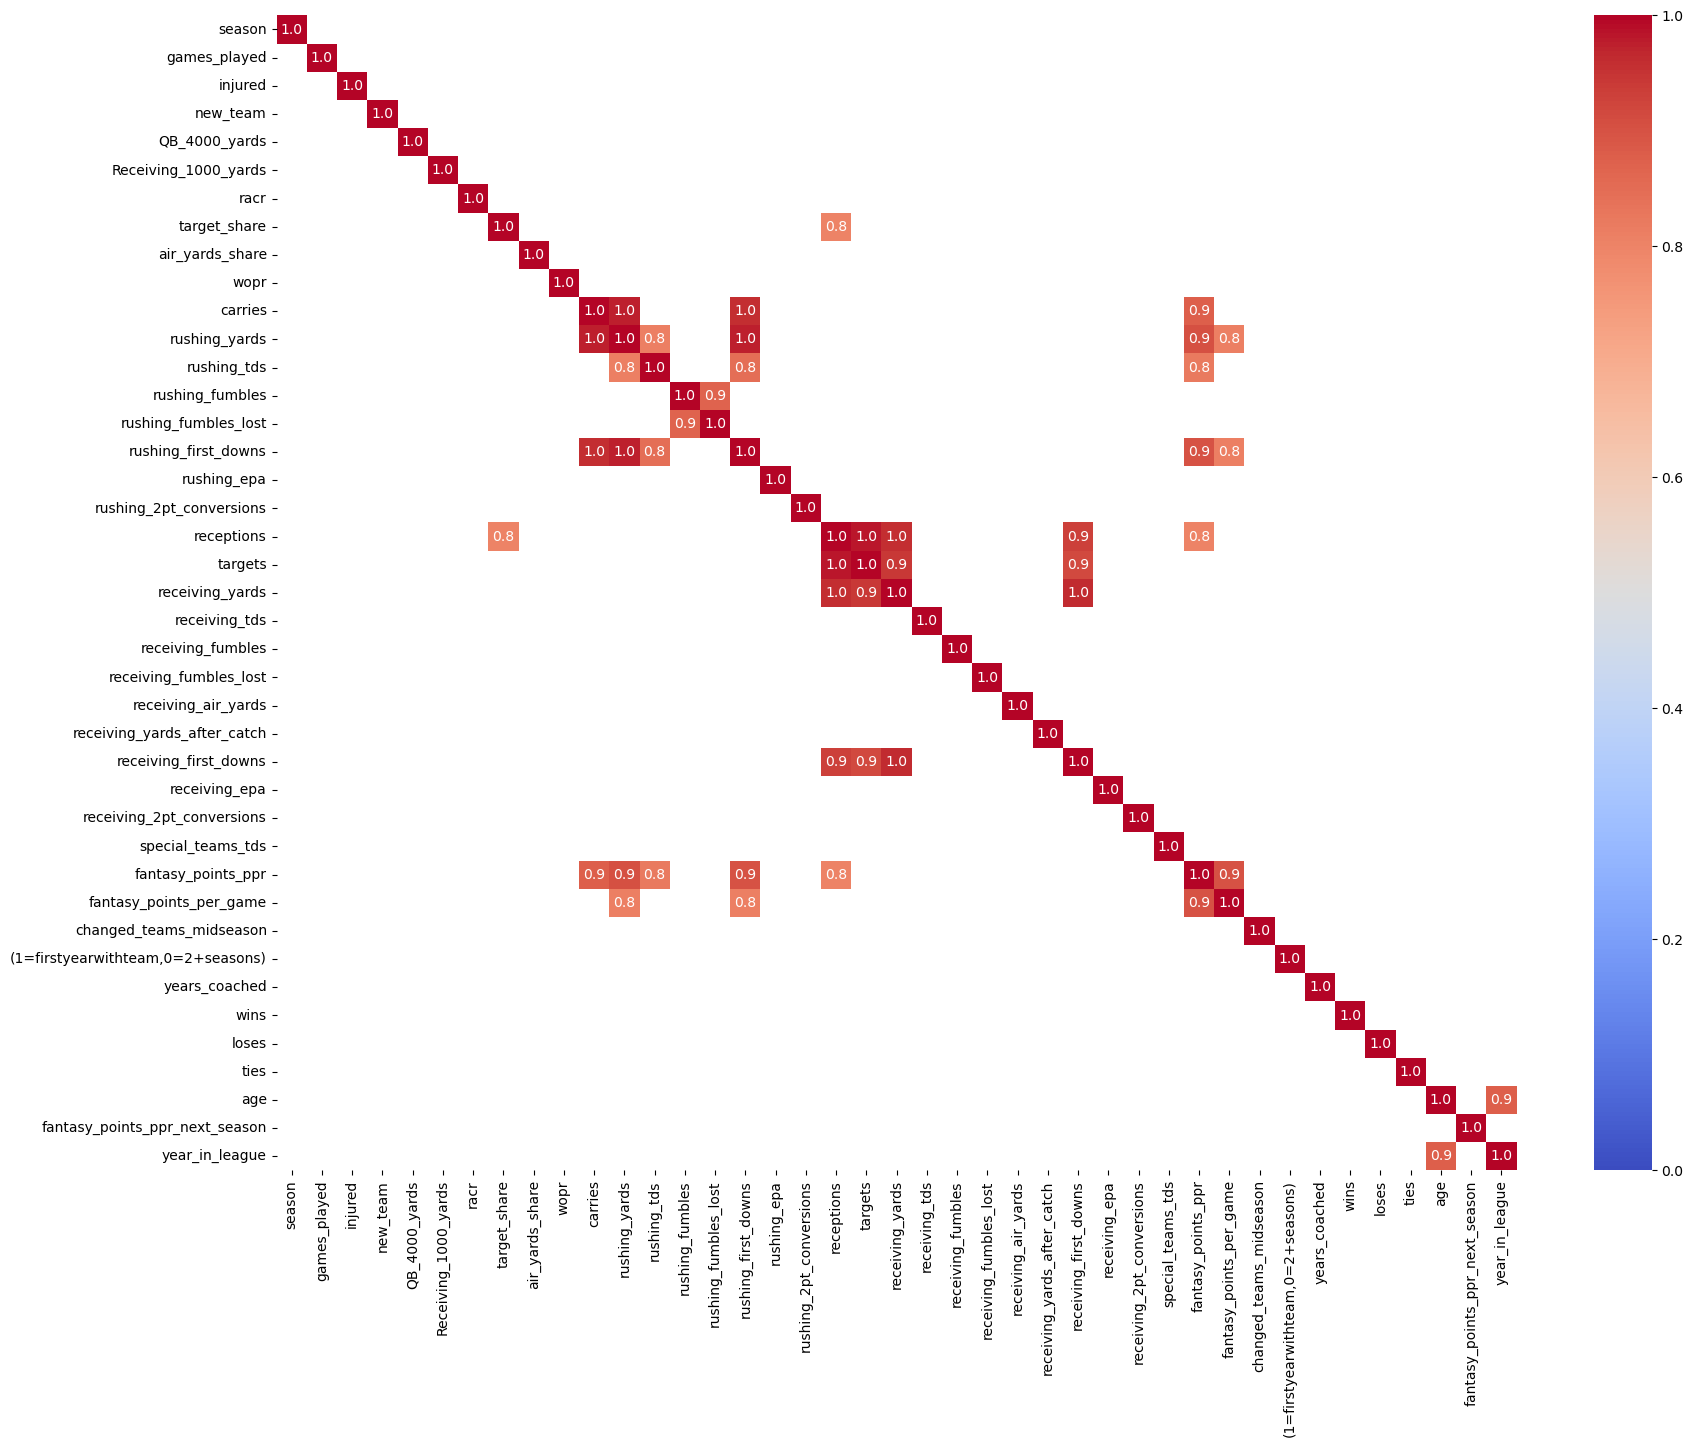

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numeric columns
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


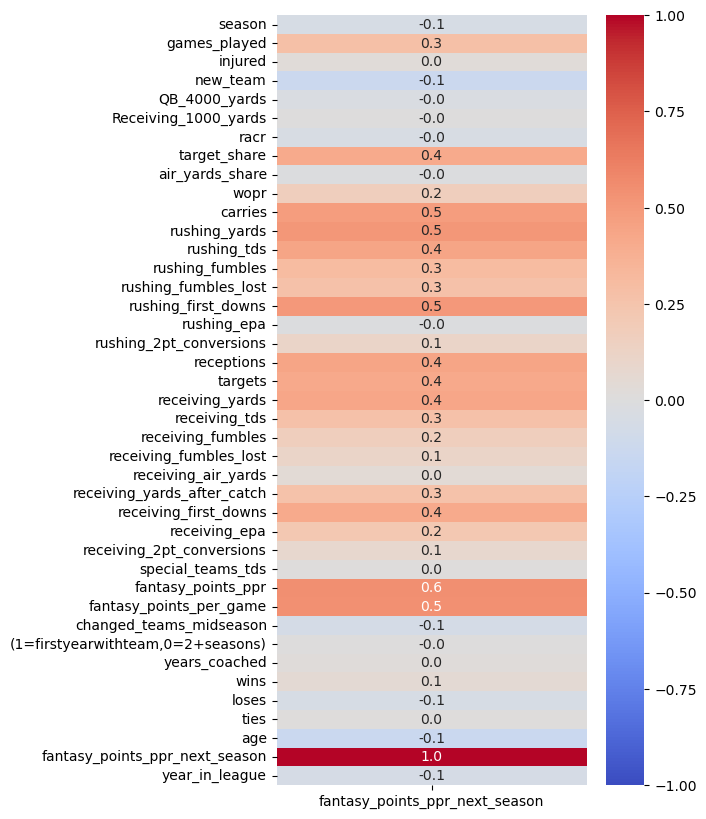

In [88]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr().round(2)

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()


In [89]:
rb_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','rushing_yards','rushing_tds', 'receiving_first_downs',
                    'targets','rushing_first_downs','carries'],inplace=True)

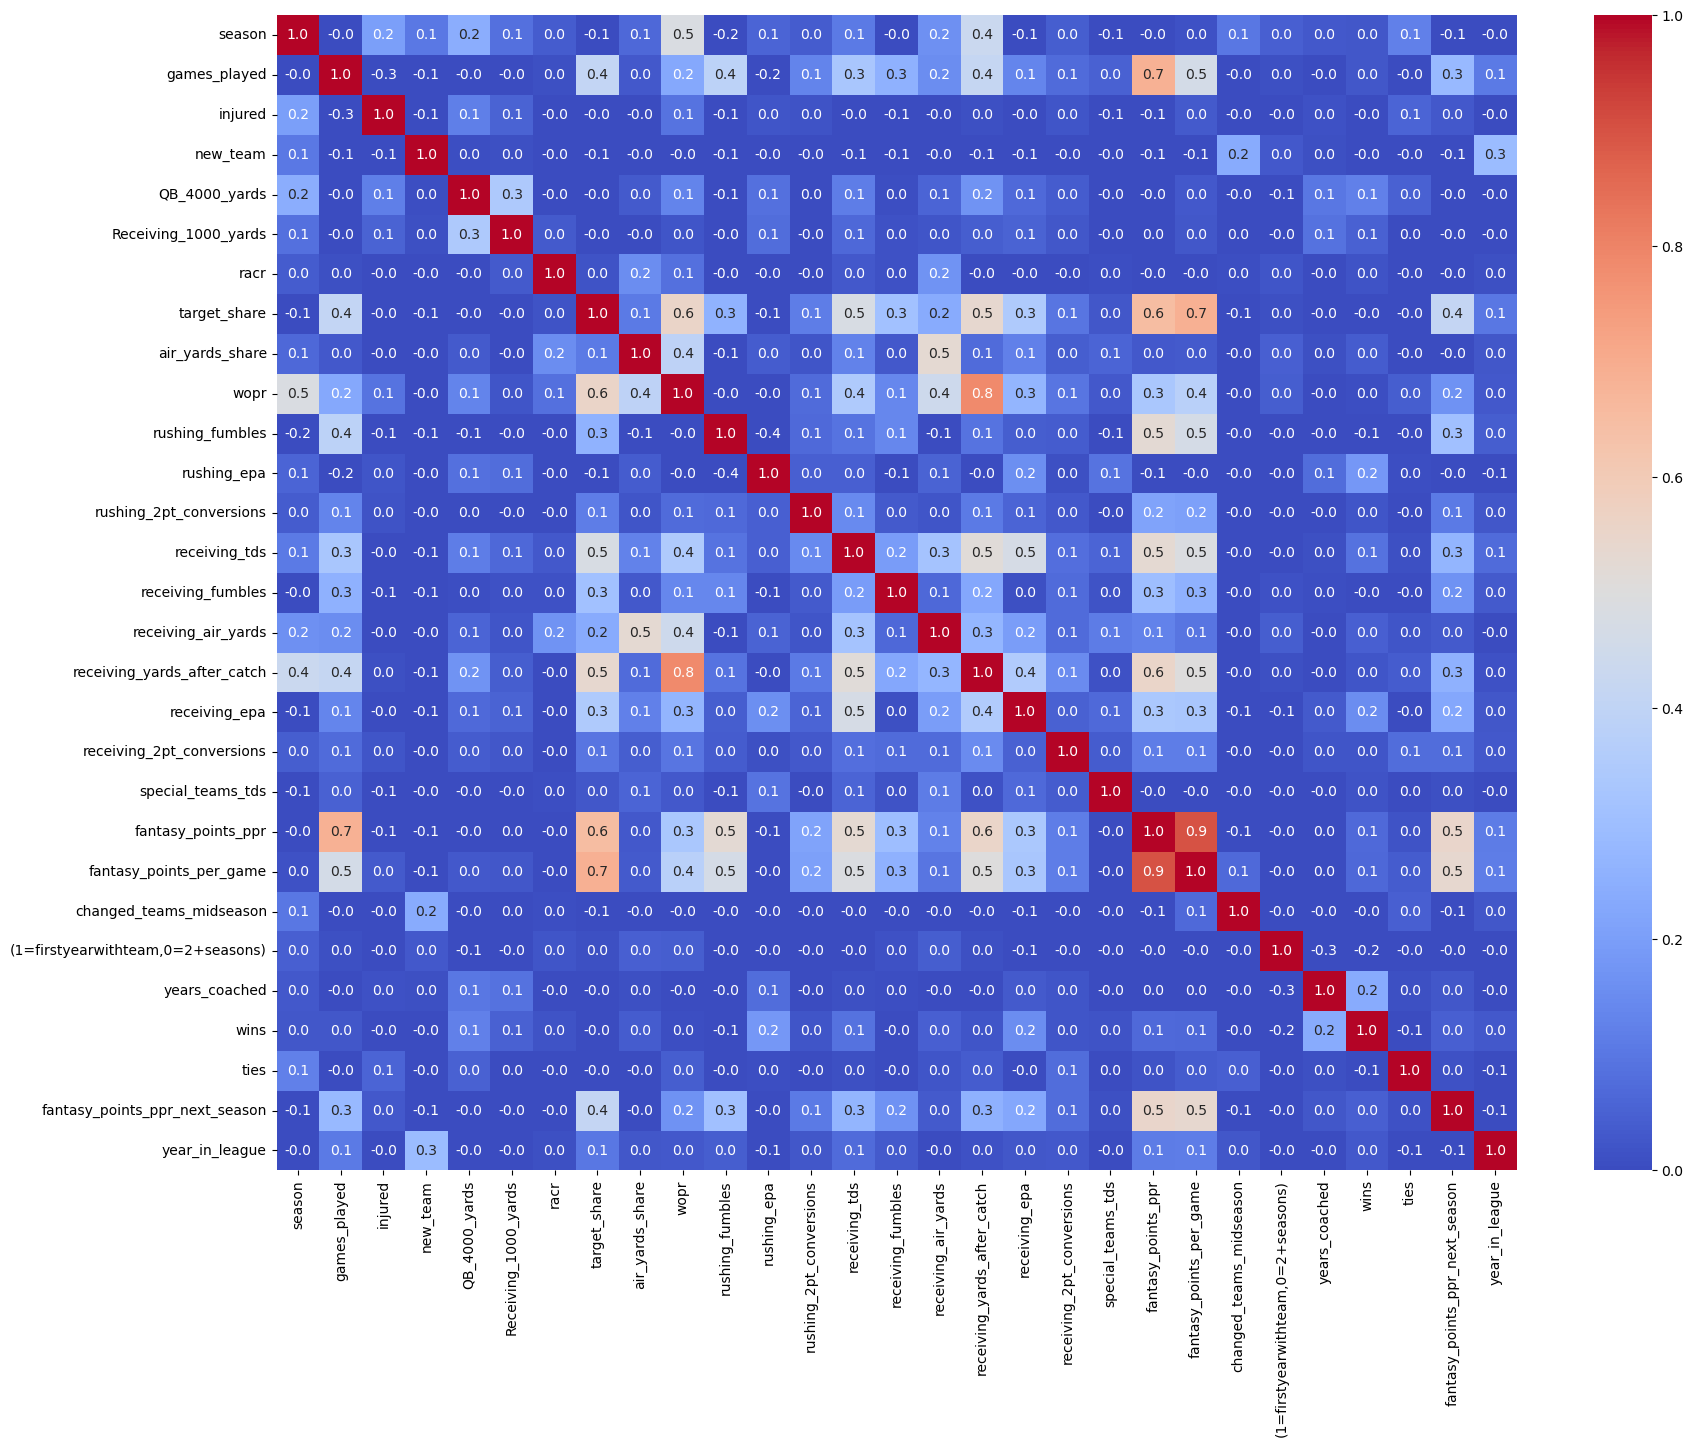

In [90]:
numeric_cols = rb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()


In [91]:
wr_df = df[(df['position'] == 'WR') | (df['position'] == 'TE')].copy()
wr_df.head()

player_id        player_name position  season  games_played  injured  \
2482  00-0000145  Derrick Alexander       WR  1999.0          16.0      0.0   
2483  00-0000145  Derrick Alexander       WR  2000.0          15.0      0.0   
2484  00-0000145  Derrick Alexander       WR  2001.0          13.0      1.0   
7346  00-0000166  Stephen Alexander       TE  1999.0          15.0      0.0   
7347  00-0000166  Stephen Alexander       TE  2000.0          16.0      0.0   

     injury type injury severity season ending  new_team  ...  wins  loses  \
2482   no injury       no injury     no injury         0  ...   9.0    7.0   
2483   no injury       no injury     no injury         0  ...   7.0    9.0   
2484    achilles            mild            no         0  ...   5.0   11.0   
7346   no injury       no injury     no injury         0  ...  10.0    6.0   
7347   no injury       no injury     no injury         0  ...   8.0    8.0   

      ties   age  binned_weight  binned_height   binned_draft_pick  \
2482   0.0  28.0        180-199          72-74    Late First Round   
2483   0.0  29.0        180-199          72-74    Late First Round   
2484   0.0  30.0        180-199          72-74    Late First Round   
7346   0.0  24.0        240-259          75-77  Early Second Round   
7347   0.0  25.0        240-259          75-77  Early Second Round   

      fantasy_points_next_season  fantasy_points_ppr_next_season  \
2482                       185.0                           257.0   
2483                        66.6                            93.6   
2484                        19.4                            33.4   
7346                        62.0                           108.0   
7347                         8.5                            17.5   

      year_in_league  
2482             6.0  
2483             7.0  
2484             8.0  
7346             2.0  
7347             3.0  

[5 rows x 69 columns]

In [92]:
wr_df.drop(columns=['Receiving_1000_yards','completions','attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota','fantasy_points_next_season', 'fantasy_points'],
           inplace=True)

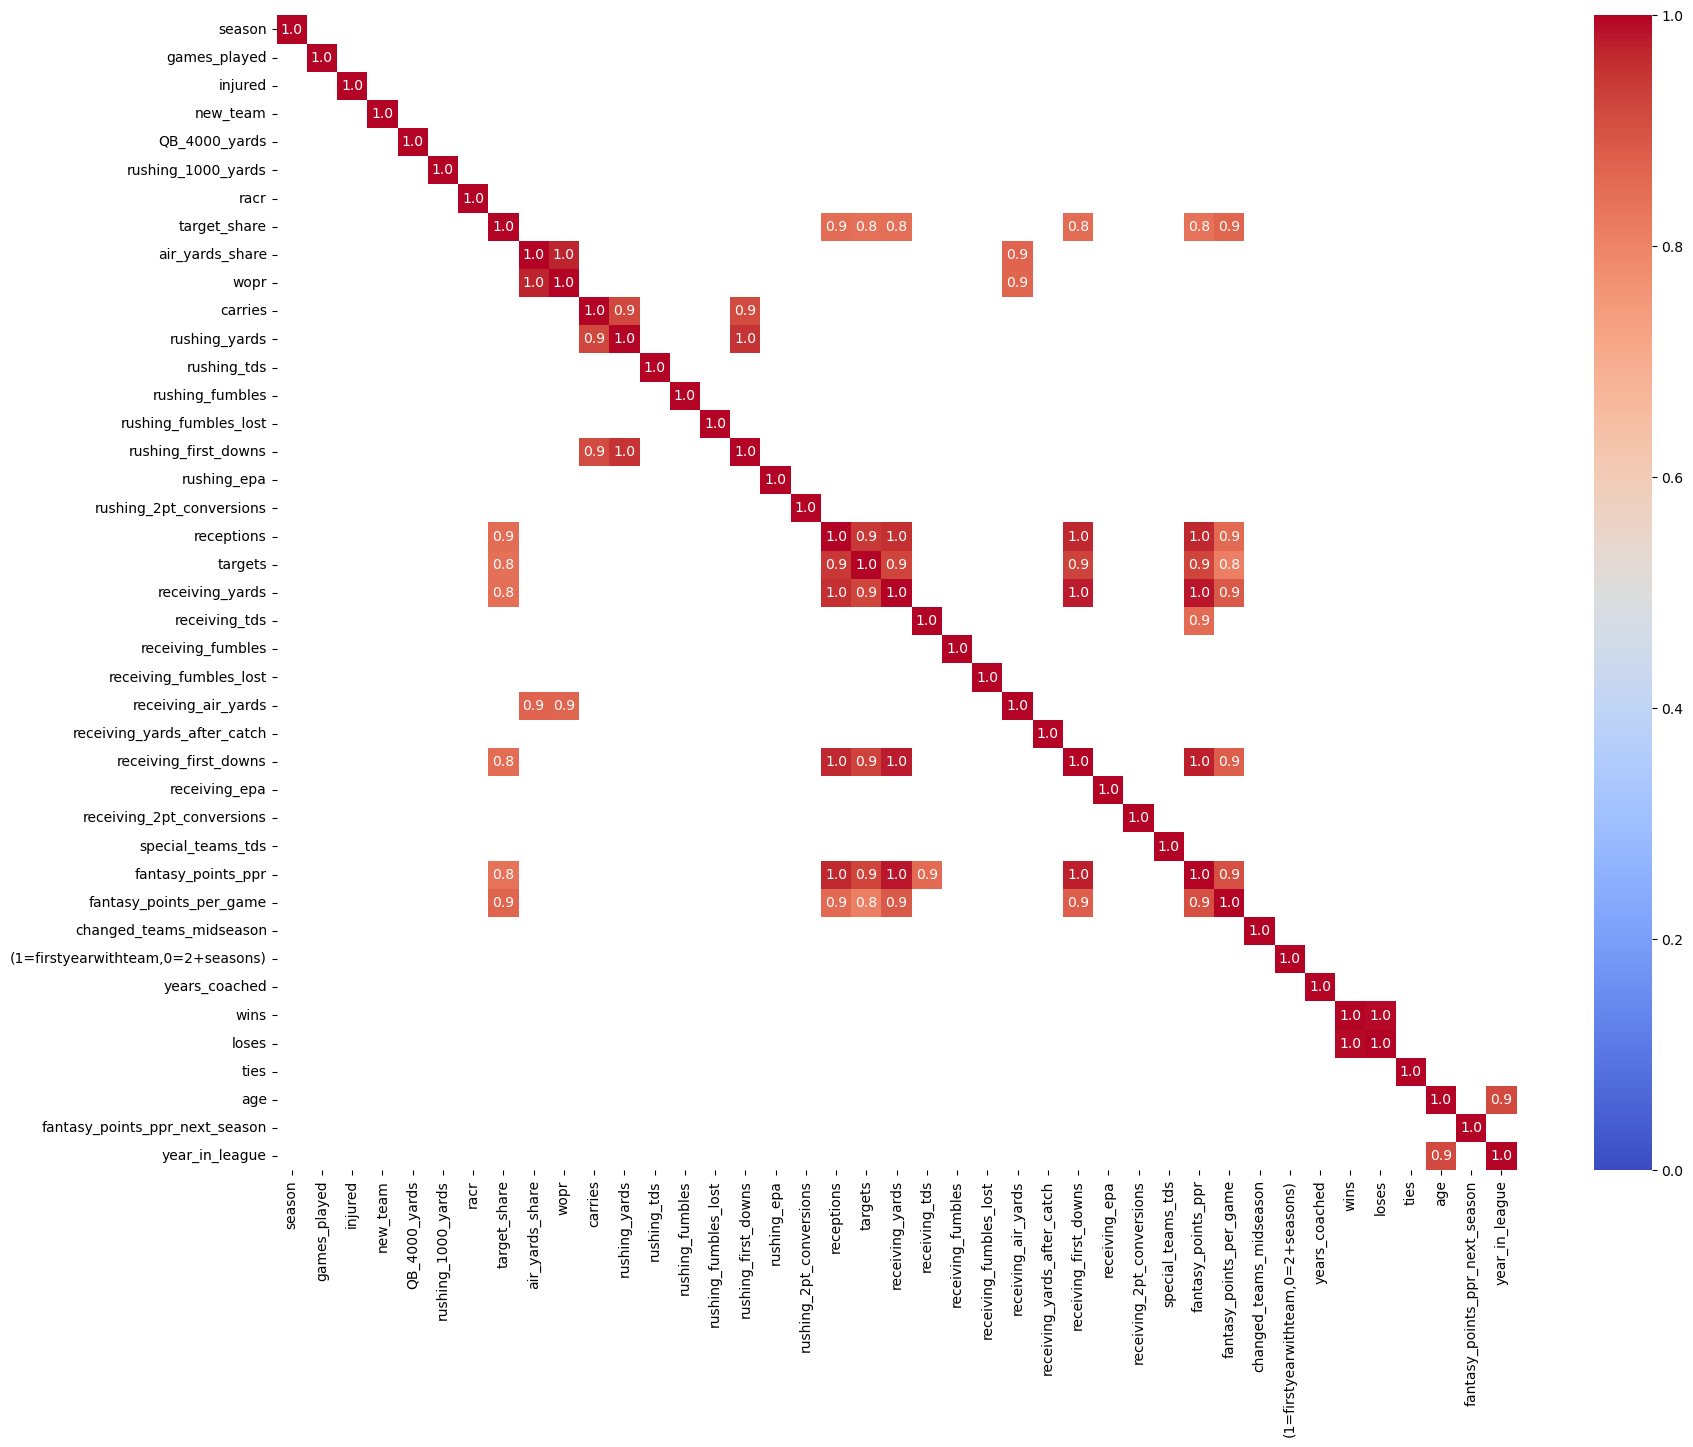

In [93]:
# Select only numeric columns
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

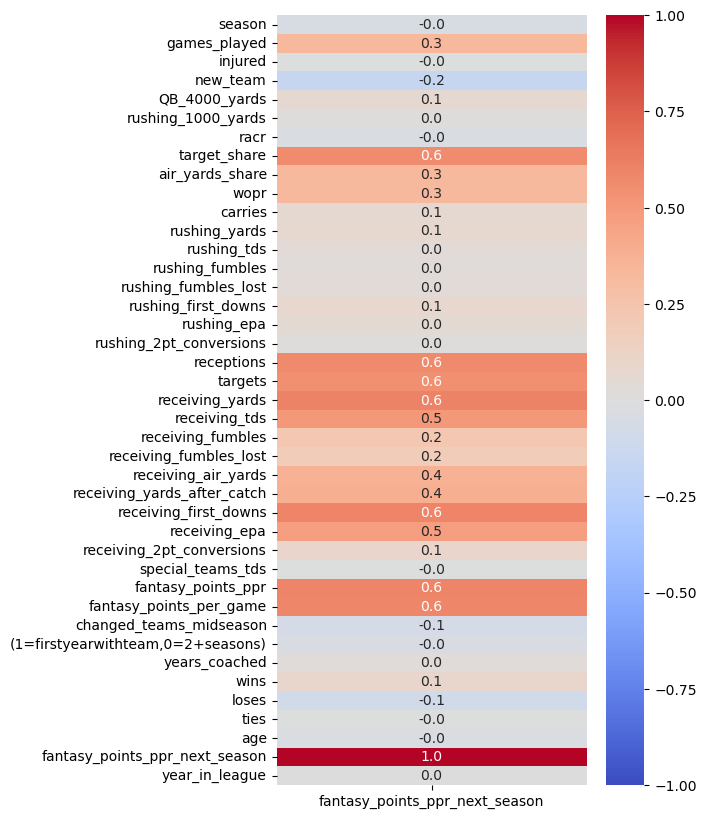

In [94]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [95]:
wr_df.drop(columns=['age','loses','receiving_fumbles_lost','rushing_fumbles_lost','receiving_yards'
,'receptions','receiving_first_downs','target_share','targets','receiving_tds','receiving_air_yards',
                    'wopr','rushing_first_downs','carries',],inplace=True)

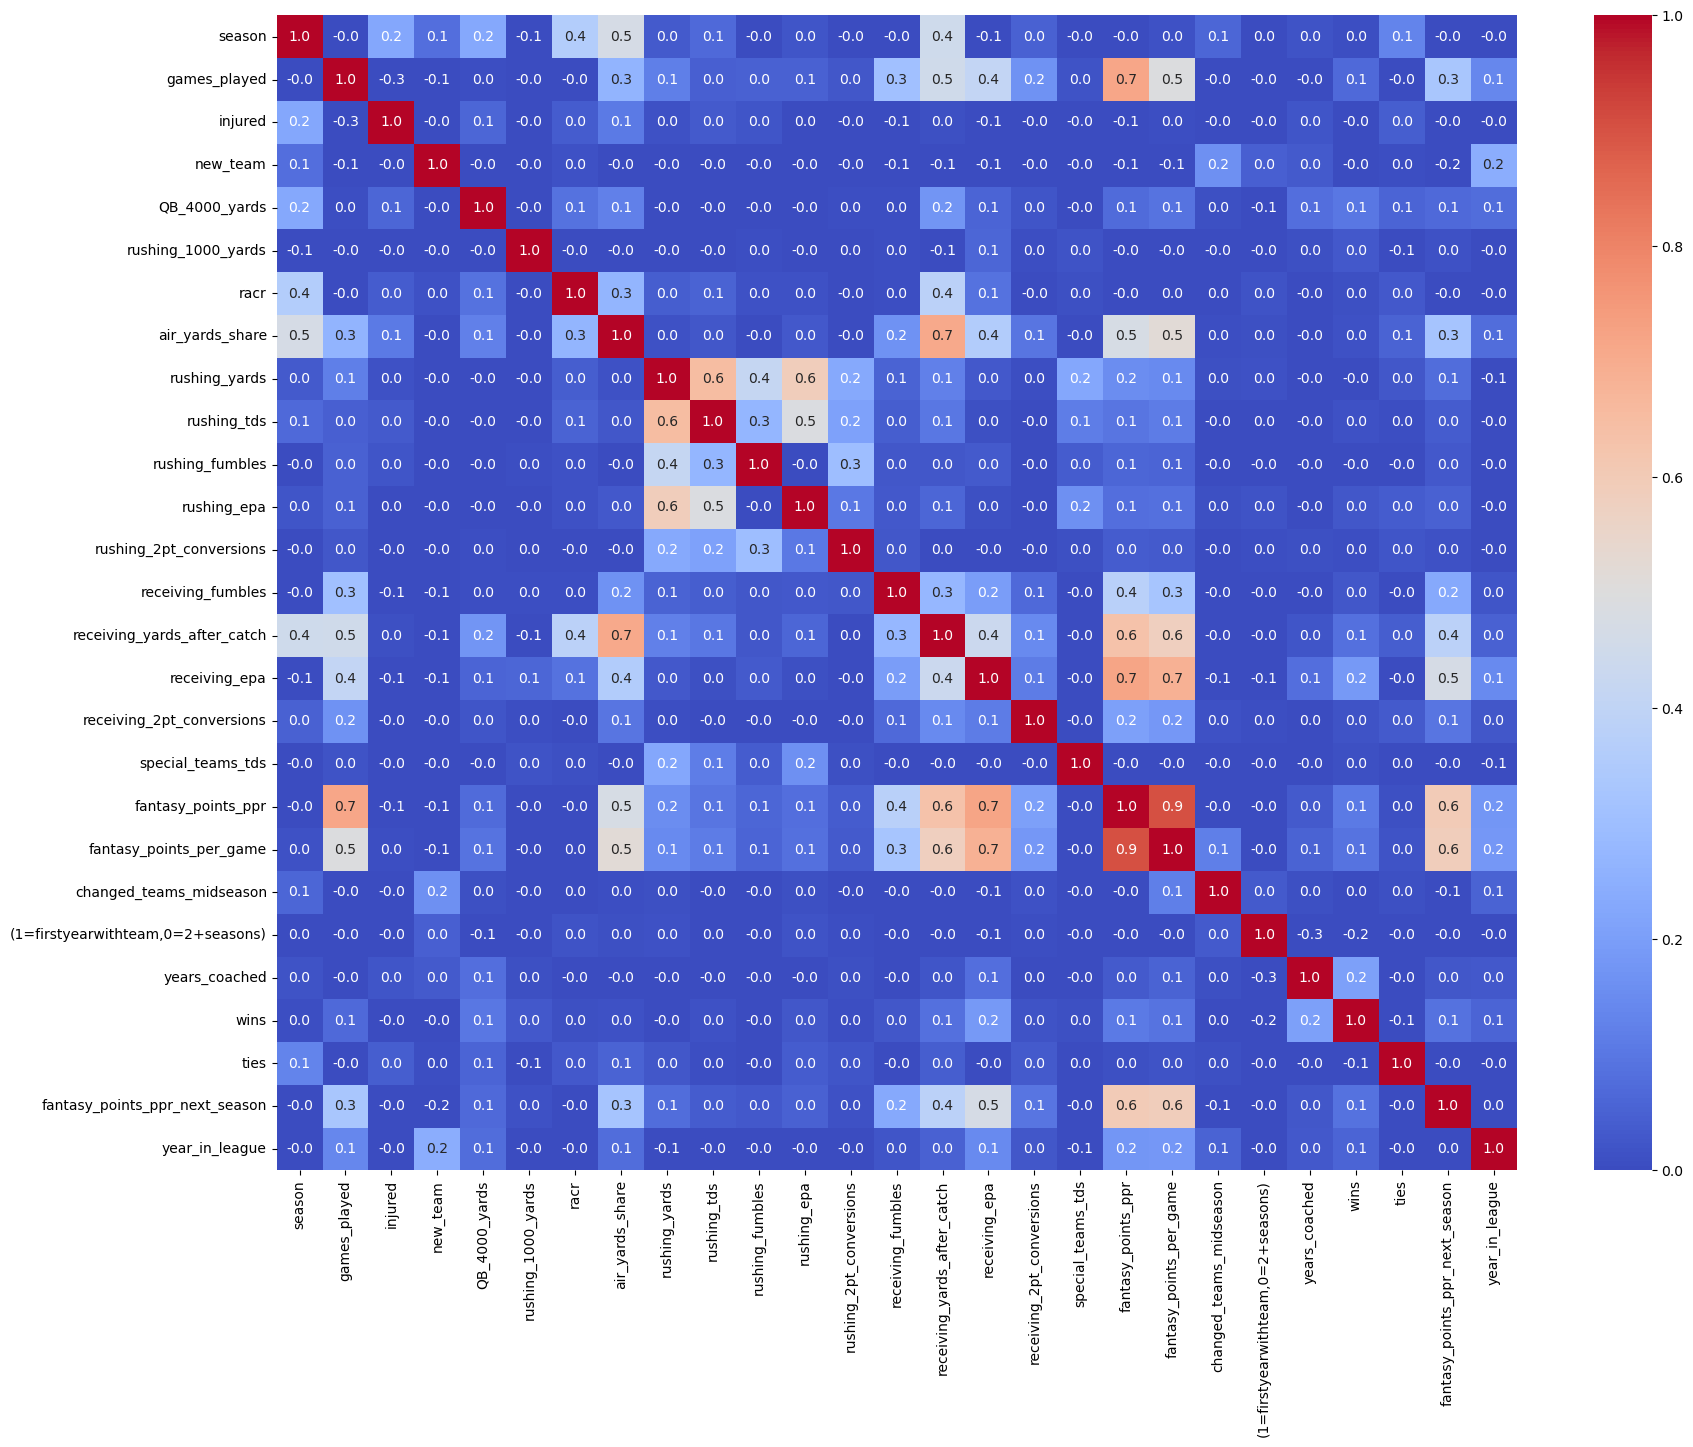

In [96]:
numeric_cols = wr_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

In [97]:
qb_df = df[(df['position'] == 'QB')].copy()
qb_df.head()

player_id  player_name position  season  games_played  injured  \
8010  00-0000104  Troy Aikman       QB  1999.0          14.0      1.0   
7807  00-0000722   Tony Banks       QB  1999.0          11.0      0.0   
7808  00-0000722   Tony Banks       QB  2000.0          11.0      0.0   
7809  00-0000722   Tony Banks       QB  2001.0          15.0      0.0   
7810  00-0000722   Tony Banks       QB  2003.0           6.0      0.0   

     injury type injury severity season ending  new_team  ...      wins  \
8010  concussion           minor            no         0  ...  8.000000   
7807   no injury       no injury     no injury         0  ...  8.000000   
7808   no injury       no injury     no injury         0  ...  8.000000   
7809   no injury       no injury     no injury         1  ...  8.043284   
7810   no injury       no injury     no injury         1  ...  5.000000   

          loses      ties   age  binned_weight  binned_height  \
8010   8.000000  0.000000  33.0        200-219          75-77   
7807   8.000000  0.000000  26.0        220-239          75-77   
7808   8.000000  0.000000  27.0        220-239          75-77   
7809   8.039052  0.036513  28.0        220-239          75-77   
7810  11.000000  0.000000  30.0        220-239          75-77   

       binned_draft_pick  fantasy_points_next_season  \
8010               Top 5                       63.94   
7807  Early Second Round                       85.22   
7808  Early Second Round                      136.64   
7809  Early Second Round                       44.42   
7810  Early Second Round                        0.64   

      fantasy_points_ppr_next_season  year_in_league  
8010                           63.94            11.0  
7807                           85.22             4.0  
7808                          136.64             5.0  
7809                           44.42             6.0  
7810                            0.64             8.0  

[5 rows x 69 columns]

In [98]:
df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'QB_4000_yards', 'Receiving_1000_yards',
       'rushing_1000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards',
       'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost',
       'receiving_air_yards', 'receiving_yards_after_catch',
       'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversio

In [99]:
qb_df.drop(columns=['receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'special_teams_tds', 'fantasy_points',
        'QB_4000_yards', 'racr', 'target_share', 'air_yards_share', 'wopr',
                    'fantasy_points_next_season'],inplace=True)

In [100]:
starting_data = pd.read_excel('QBstarterbackup.xlsx')
qb_df = qb_df.merge(starting_data, how = 'inner', on = ['player_id', 'season'] )

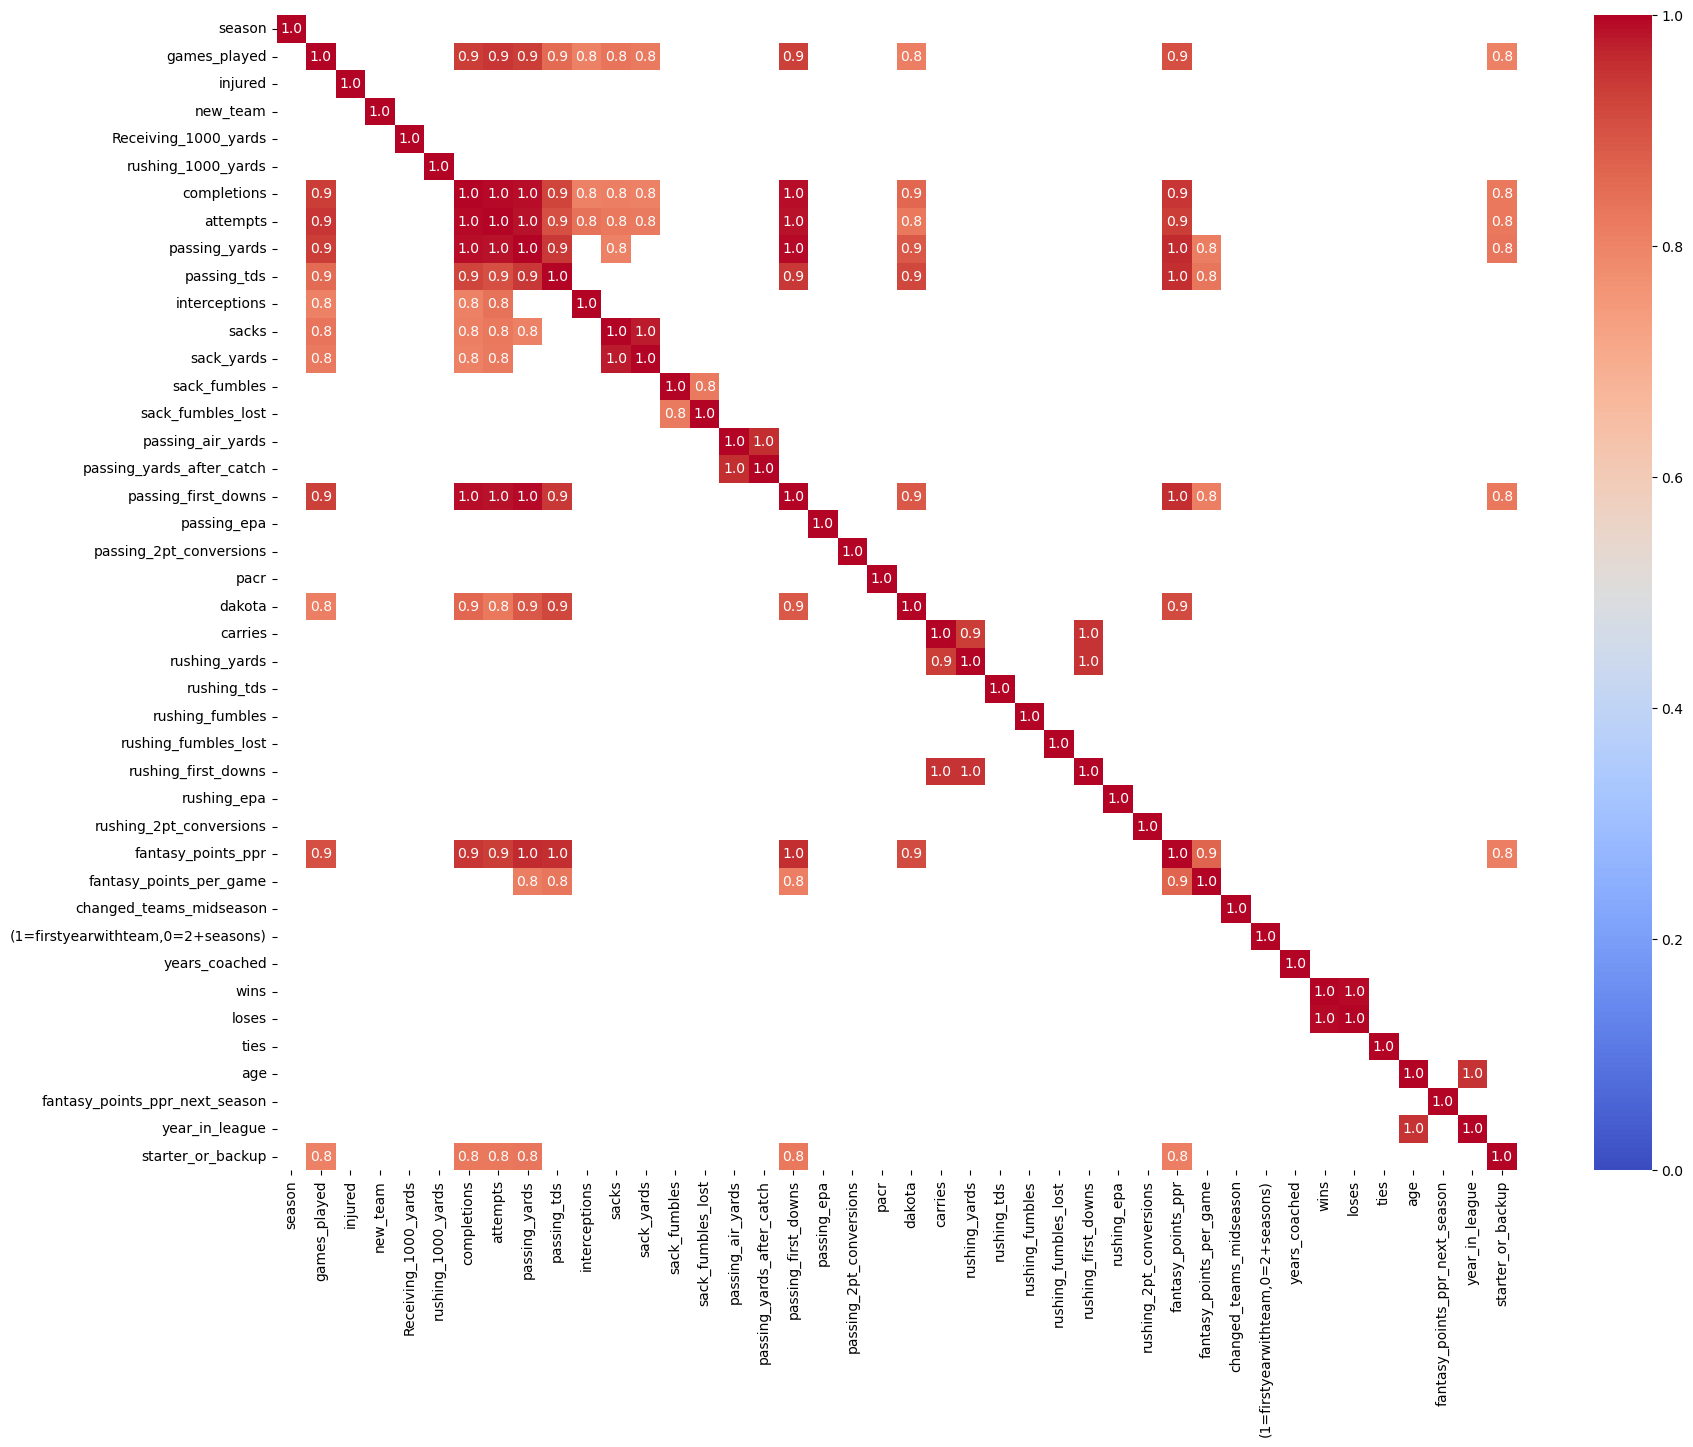

In [101]:
# Select only numeric columns
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr().abs()
strong_corr = corr[corr > 0.80]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(strong_corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

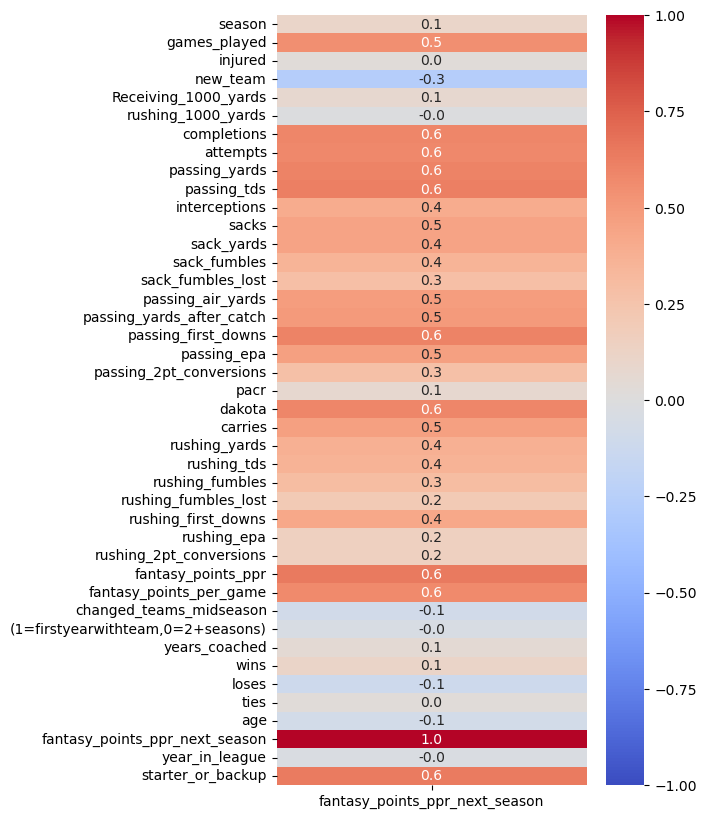

In [102]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix and round it to two decimals
corr = numeric_cols.corr()

# Isolate the correlation of 'fantasy_points_ppr_next_season' with all other variables
corr_fantasy = corr[['fantasy_points_ppr_next_season']]

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5, 10)  # Adjust the size based on the number of variables
sns.heatmap(corr_fantasy, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm', center=0, ax=ax)
plt.show()

In [103]:
qb_df.drop(columns=['completions', 'attempts','passing_yards', 'passing_tds',
                    'passing_first_downs','dakota','loses','age','passing_air_yards','sack_yards',
                    'carries','rushing_first_downs','sack_fumbles_lost'],inplace=True)

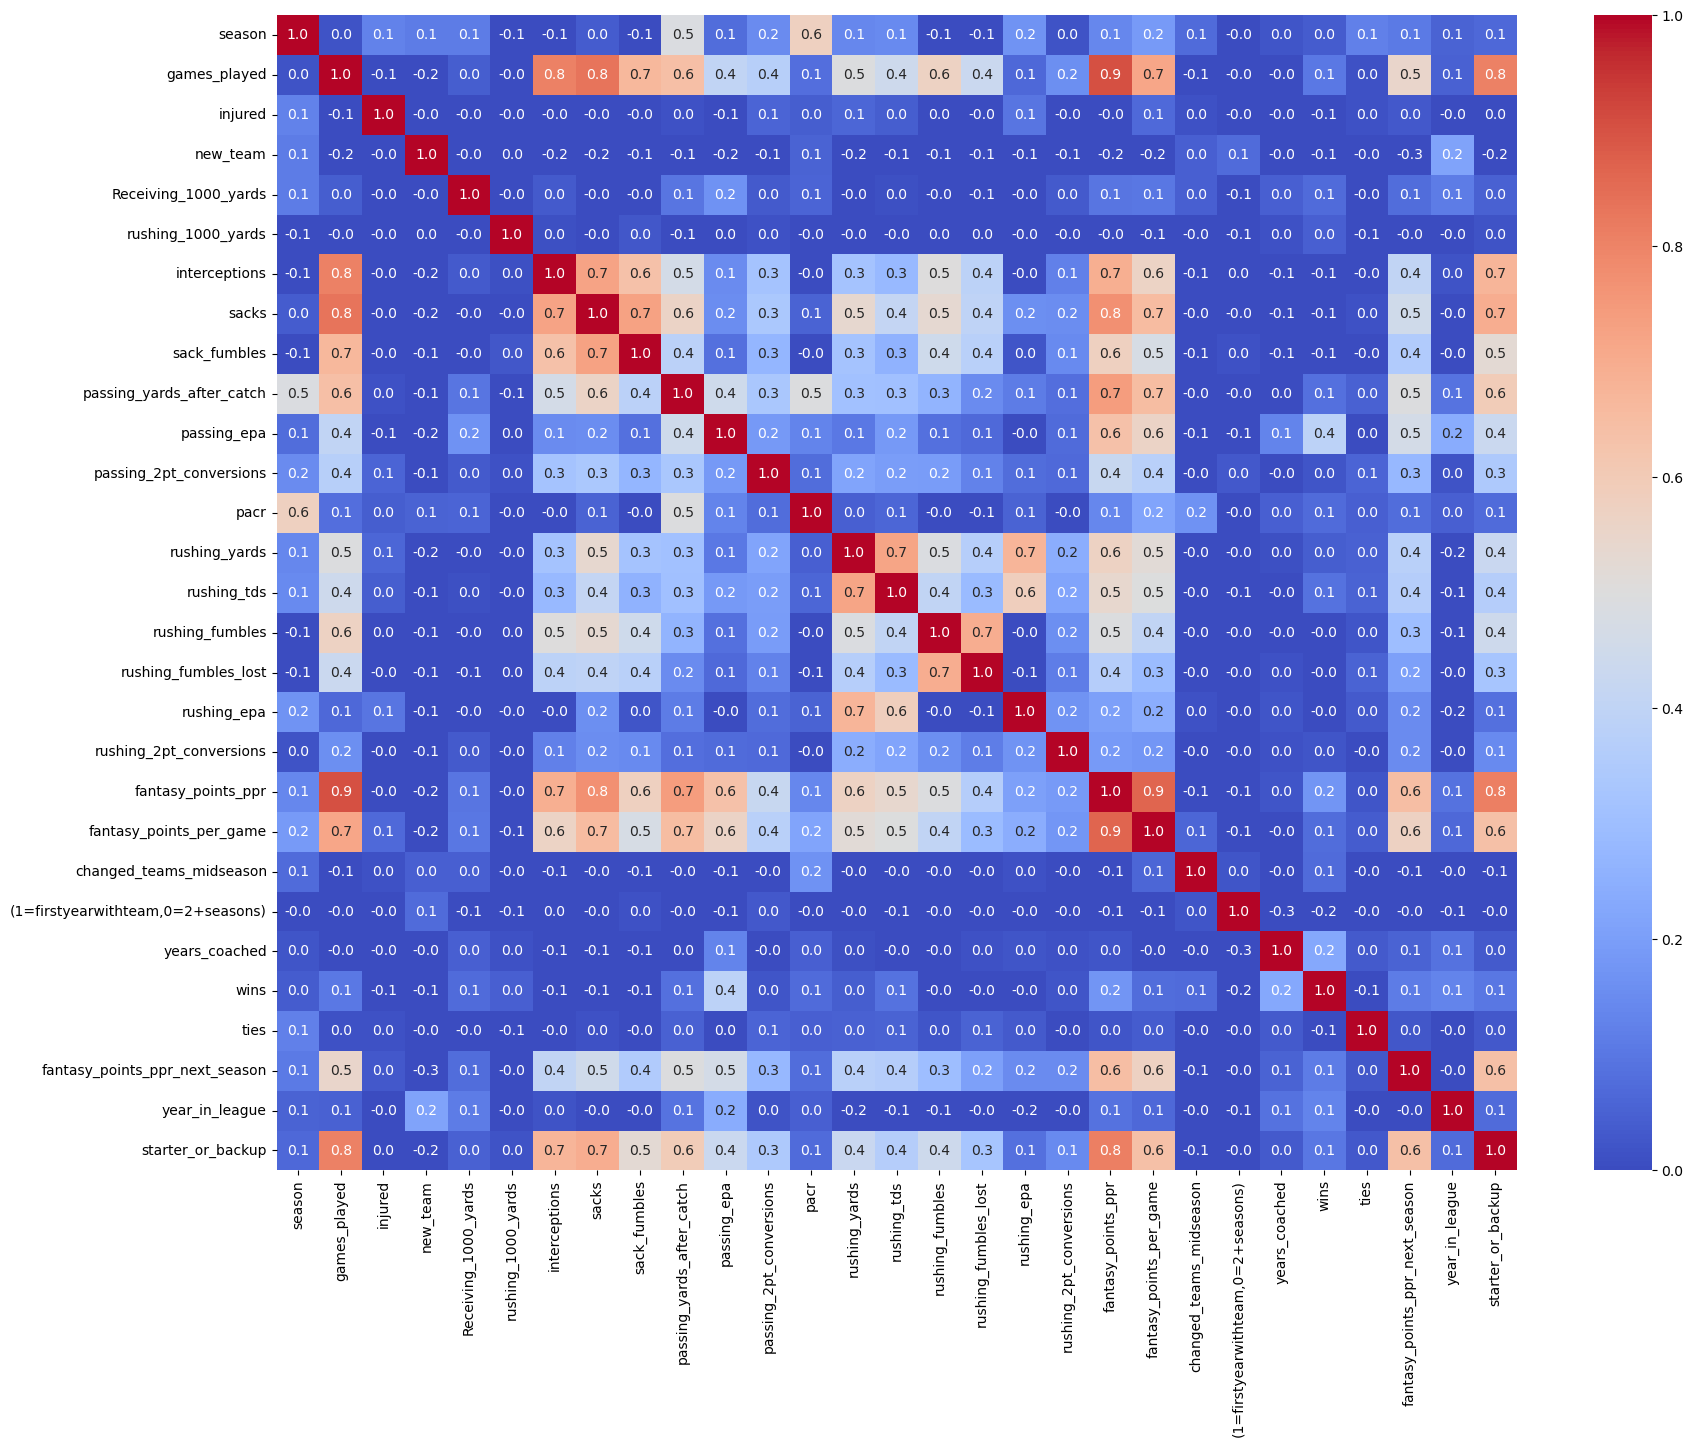

In [104]:
numeric_cols = qb_df.select_dtypes(include=[np.number])

# Compute the correlation matrix, round it to two decimals, and filter strong correlations
corr = numeric_cols.corr()

# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.heatmap(corr, annot=True, fmt='.1f', vmin=0, cmap='coolwarm', center=0.5, ax=ax)
plt.show()

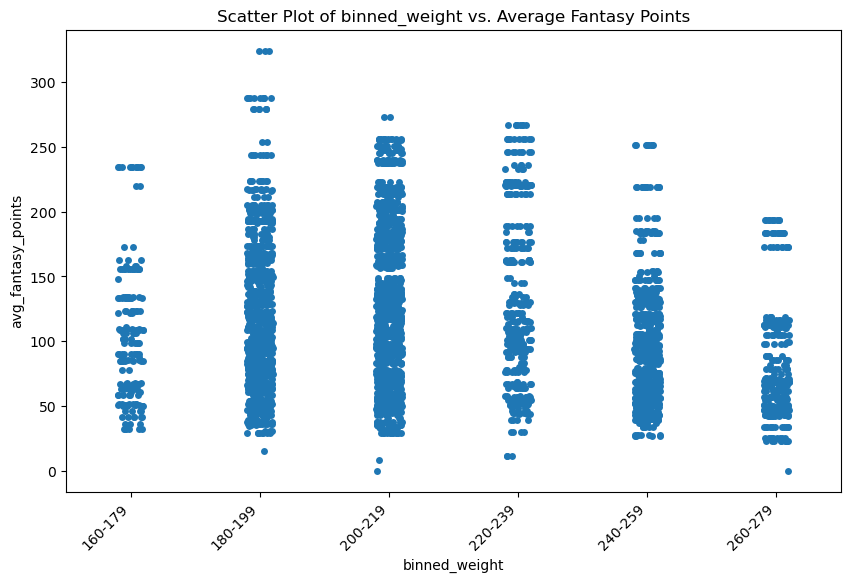

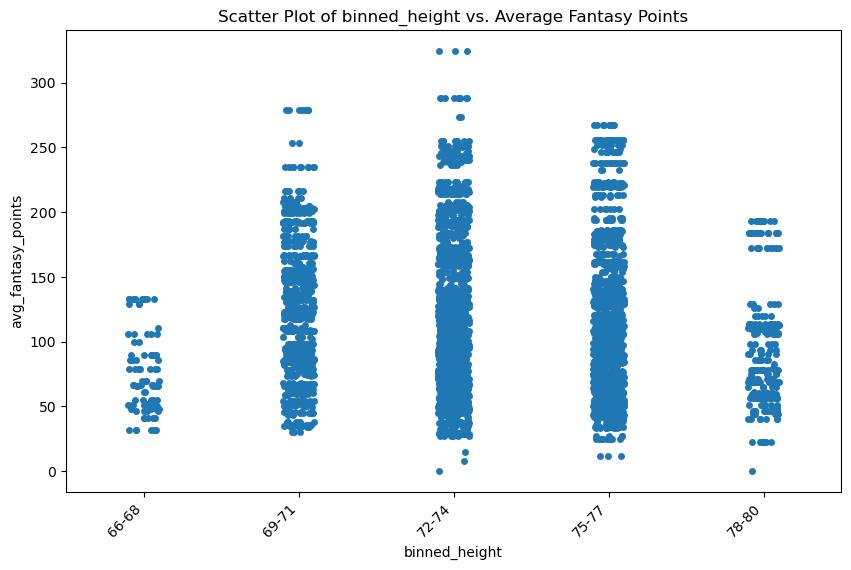

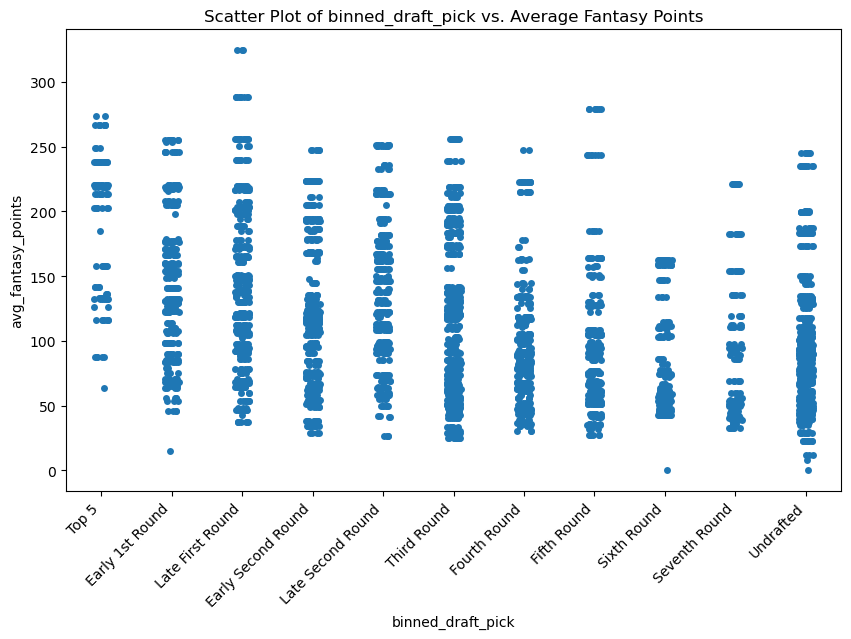

In [105]:
temp_df = wr_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

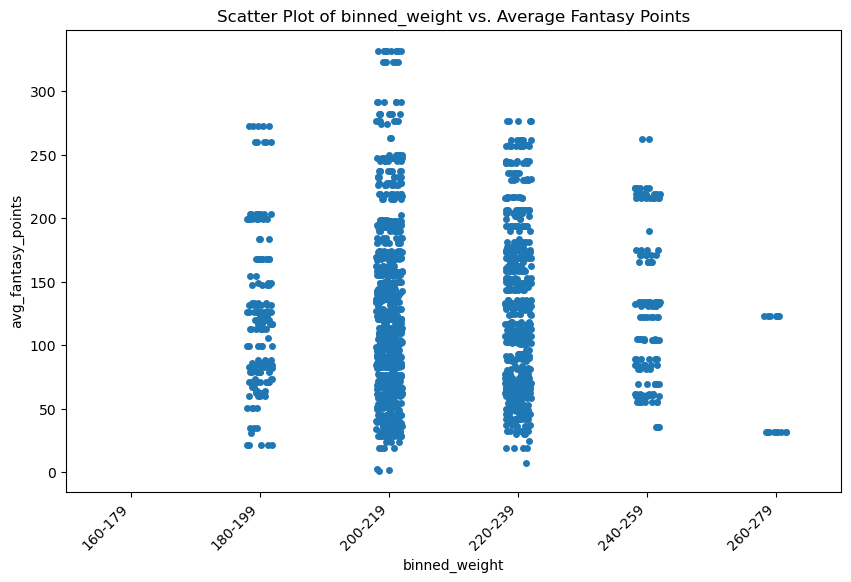

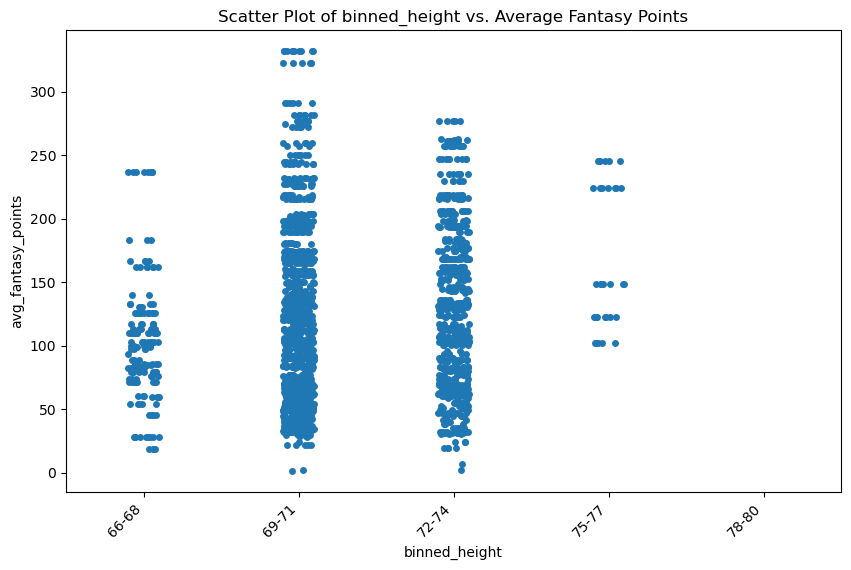

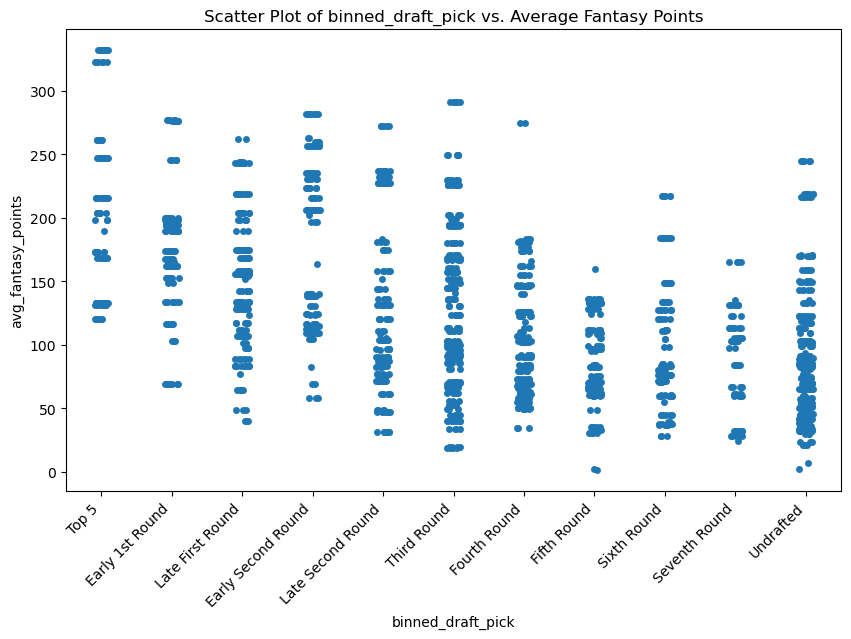

In [106]:
temp_df = rb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

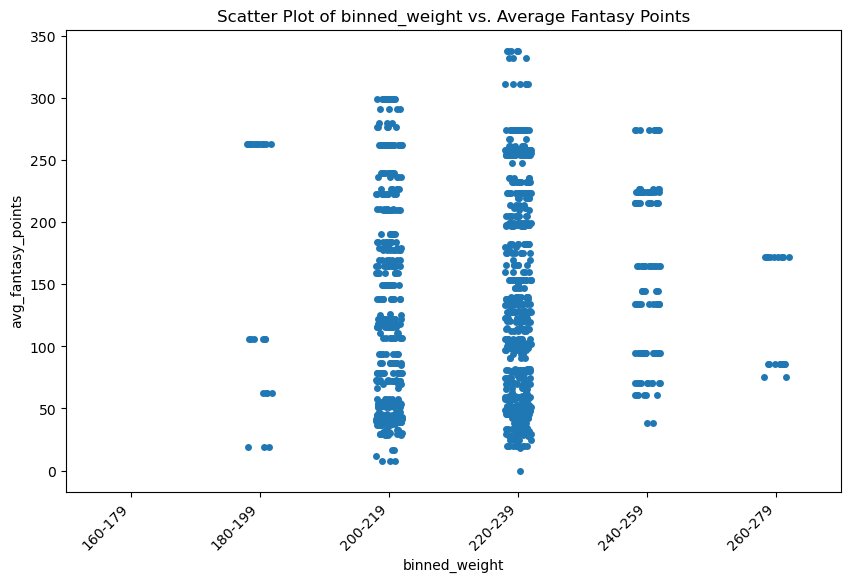

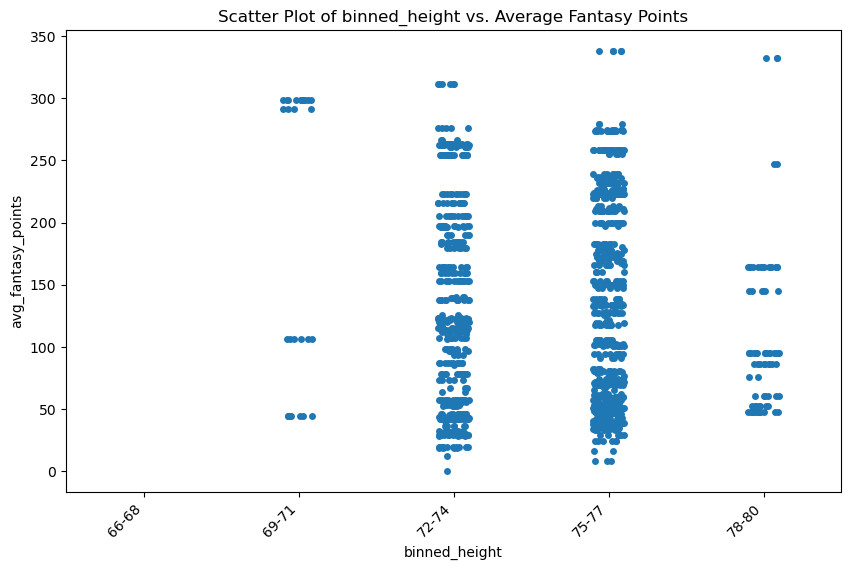

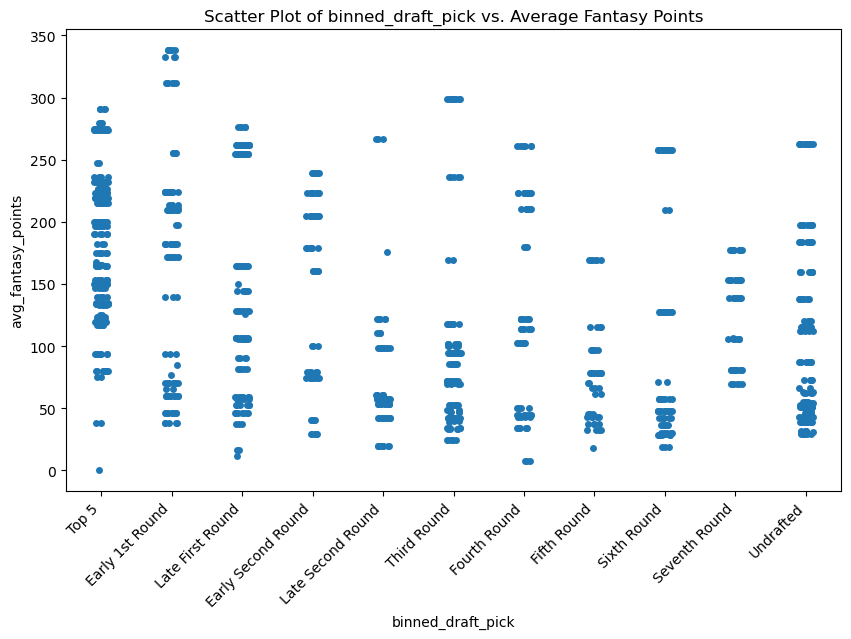

In [107]:
temp_df = qb_df
temp_df['avg_fantasy_points'] = temp_df.groupby('player_id')['fantasy_points_ppr'].transform('mean')

non_numeric_cols=df[['binned_weight','binned_height','binned_draft_pick']]
# Plot each non-numeric column against 'fantasy_points_ppr_next_season'
for column in non_numeric_cols.columns:
    plt.figure(figsize=(10, 6))
    # Use seaborn to create a scatter plot. As seaborn scatter plot does not directly support non-numeric data,
    # we use a category plot or strip plot here.
    sns.stripplot(x=column, y='avg_fantasy_points', data=temp_df)

    # Providing a title for each plot
    plt.title(f'Scatter Plot of {column} vs. Average Fantasy Points')

    # Improve plot readability by rotating x labels if they are too long or numerous
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.show()

In [108]:
wr_df.groupby('binned_draft_pick')['fantasy_points_ppr'].agg(['mean','median','max'])

mean  median    max
binned_draft_pick                            
Top 5               190.130991  191.40  359.2
Early 1st Round     143.463063  144.20  369.1
Late First Round    138.337039  126.50  385.3
Early Second Round  120.784976  112.85  374.6
Late Second Round   134.321507  120.40  358.4
Third Round         116.121198  102.00  439.5
Fourth Round         94.131405   81.50  339.2
Fifth Round          91.446811   79.50  341.2
Sixth Round          89.051875   80.60  297.7
Seventh Round        94.472464   78.65  282.2
Undrafted            91.091638   79.60  390.9

In [109]:
wr_injury = wr_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
wr_injury[wr_injury['count'] > 20].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            concussion    99.320606   76.00   86.344863     33
                knee          88.472549   76.50   65.543384     51
                hamstring    119.565714  103.30   91.712393     35
                ankle        114.975942  104.90   77.468448     69
                shoulder     123.248000  118.20   79.731587     25
                leg          133.218261  126.60   93.369554     23
minor           hamstring    113.937826  104.27   72.745094     46
                leg          132.496296  127.00  101.010637     27
                ankle        148.854444  154.80   82.031472     36
                knee         165.669444  164.25   83.688111     36
moderate        foot         103.969565   80.10   81.491374     23
                knee          99.436000   86.30   75.999612     40
                ankle         96.188235   91.50   61.685202     34
                hamstring    133.531176  114.50   91.943418     34
no injury       no injury    110.508978   97.35   81.210748   2876
severe          foot          65.629630   53.20   78.604212     27
                knee          90.405098   64.50   76.641526     51
                ankle         93.275652   78.90   76.126106     23
                leg           93.968182   80.30   78.028001     22
                acl           92.090000   90.55   64.874217     40

In [110]:
rb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
rb_injury[rb_injury['count'] > 15].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            hamstring    107.500000   96.20   78.654093     20
                leg          115.878824   98.34   93.988126     17
                knee         125.597436  122.70   91.360165     39
                ankle        164.437059  174.80   90.678667     34
minor           leg          140.613000  127.70  114.030072     20
                ankle        137.688000  142.20  102.438454     25
moderate        knee          91.376923   67.10   68.739725     26
                ankle        110.640952  104.10   97.535089     21
no injury       no injury    113.776617   93.95   92.064579   1330
severe          acl          103.423077   68.95   95.881975     26
                knee         103.564211   84.50   79.830496     38

In [111]:
qb_injury = rb_df.groupby(['injury severity','injury type'])['fantasy_points_ppr_next_season'].agg(['mean','median','std','count'])
qb_injury[rb_injury['count'] > 5].sort_values(by=['injury severity','median'])

mean  median         std  count
injury severity injury type                                       
mild            ribs          61.583333   40.25   72.058793      6
                toe          129.746667   79.95  110.685144      6
                foot         120.111111   94.90  100.077675      9
                hamstring    107.500000   96.20   78.654093     20
                mcl          118.685714   98.30   77.027818      7
                leg          115.878824   98.34   93.988126     17
                shoulder     115.120000  116.85   85.047958     10
                knee         125.597436  122.70   91.360165     39
                concussion   138.960000  125.15   80.747799     10
                ankle        164.437059  174.80   90.678667     34
                groin        153.028571  199.40  118.371333      7
minor           knee         116.285714   76.55  106.256539     14
                groin        124.900000   77.70   89.909658      7
                toe          115.442857  112.70   78.461814      7
                leg          140.613000  127.70  114.030072     20
                foot         110.614286  129.40   61.173672      7
                hamstring    167.434000  133.22  102.665431     10
                concussion   143.690909  140.10   96.301157     11
                ankle        137.688000  142.20  102.438454     25
                shoulder     179.583333  184.60   92.115393      6
moderate        knee          91.376923   67.10   68.739725     26
                mcl           92.600000   73.50   78.408716      7
                leg           86.346154   81.30   77.619989     13
                ankle        110.640952  104.10   97.535089     21
                hamstring    107.728571  112.40  118.244432      7
                foot         145.450000  151.50   62.570669      8
no injury       no injury    113.776617   93.95   92.064579   1330
severe          leg           75.813333   50.90   74.216449     15
                achilles      78.900000   53.95   76.263045      6
                ankle         71.841667   64.70   63.083631     12
                acl          103.423077   68.95   95.881975     26
                knee         103.564211   84.50   79.830496     38
                shoulder     113.667500  113.20   90.197076      8
                foot         181.145714  208.00  101.567778      7

In [112]:
conditions = (rb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
rb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
rb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
rb_df.loc[conditions, 'injured'] = 1

In [113]:
conditions = (qb_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
qb_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
qb_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
qb_df.loc[conditions, 'injured'] = 1

In [114]:
conditions = (wr_df['injury severity'].isin(['minor', 'mild']))

# Replace 'injury_severity' under specified conditions
wr_df.loc[conditions, 'injury severity'] = 'no injury'

# Replace 'injury_type' and 'season_ending' under specified conditions
wr_df.loc[conditions, ['injury type', 'season ending']] = 'no injury'

# Update 'injured' column under specified conditions
wr_df.loc[conditions, 'injured'] = 1

In [115]:
wr_df['injury severity'].unique()

array(['no injury', 'severe', 'moderate', 'suspension'], dtype=object)

# Modeling 

## Quaterback Analysis

### Regression

In [116]:
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from  sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics as stat
import math
import sklearn.metrics


In [117]:
#function to test for correlation between the independent variables
def multicollinearity(x):
  vif_data = pd.DataFrame()
  vif_data["feature"] = x.columns
  vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

  for index, row in vif_data.iterrows():
      print(row)
  return vif_data

In [118]:
qb_df.columns

Index(['player_id', 'player_name', 'position', 'season', 'games_played',
       'injured', 'injury type', 'injury severity', 'season ending',
       'new_team', 'Receiving_1000_yards', 'rushing_1000_yards',
       'interceptions', 'sacks', 'sack_fumbles', 'passing_yards_after_catch',
       'passing_epa', 'passing_2pt_conversions', 'pacr', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_epa',
       'rushing_2pt_conversions', 'fantasy_points_ppr',
       'fantasy_points_per_game', 'changed_teams_midseason',
       '(1=firstyearwithteam,0=2+seasons)', 'years_coached', 'wins', 'ties',
       'binned_weight', 'binned_height', 'binned_draft_pick',
       'fantasy_points_ppr_next_season', 'year_in_league', 'starter_or_backup',
       'avg_fantasy_points'],
      dtype='object')

In [119]:
qb_df.dropna(axis = 0, inplace=True)

In [120]:
#function to check for correlation
def prediction_scatterplot(actual, pred):
  plt.figure(figsize=(8, 6))
  plt.scatter(actual, pred, color='blue')
  plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs. Predicted')
  plt.show()


In [121]:
#function to get the model
def linear_reg(x_train, x_test, y_train, y_test, test_ids_names=None):
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    x_train2 = sm.add_constant(x_train)
    reg = sm.OLS(y_train, x_train2)
    reg1 = reg.fit()
    print(reg1.summary())
    y_pred_train = lr.predict(x_train)
    #accuracy of training data
    prediction_scatterplot(y_train, y_pred_train)
    mse_train = sklearn.metrics.mean_squared_error(y_train, y_pred_train)
    print(f"RMSE Training = { math.sqrt(mse_train)}")

    #accuracy of test data
    y_pred_test = lr.predict(x_test)

    prediction_scatterplot(y_test, y_pred_test)

    mse_test = sklearn.metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    print(f"RMSE Testing = {rmse_test}")
    if test_ids_names is not None:
      results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': y_pred_test
    })

      results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
      results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
      results = results.sort_values('predicted_fantasy_points',ascending=False)
      top = results.head(10)

      top_predictions(top)

In [122]:
#converts all the categorical and binned data
x = pd.get_dummies(qb_df.drop(columns=['player_id', 'player_name','season','fantasy_points_ppr_next_season']),drop_first=True).astype(float)
y = qb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)


In [123]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature    games_played
VIF           14.525516
Name: 0, dtype: object
feature     injured
VIF        1.943464
Name: 1, dtype: object
feature    new_team
VIF        1.231214
Name: 2, dtype: object
feature    Receiving_1000_yards
VIF                    1.130838
Name: 3, dtype: object
feature    rushing_1000_yards
VIF                  1.097808
Name: 4, dtype: object
feature    interceptions
VIF             4.391062
Name: 5, dtype: object
feature       sacks
VIF        6.335376
Name: 6, dtype: object
feature    sack_fumbles
VIF            2.521185
Name: 7, dtype: object
feature    passing_yards_after_catch
VIF                          4.39769
Name: 8, dtype: object
feature    passing_epa
VIF           6.892395
Name: 9, dtype: object
feature    passing_2pt_conversions
VIF                       1.358991
Name: 10, dtype: object
feature        pacr
VIF        1.831278
Name: 11, dtype: object
feature    rushing_yards
VIF             6.290258
Name: 12, dtype: object
feature    rushing_tds
VIF  

feature        VIF
0                      games_played  14.525516
1                           injured   1.943464
2                          new_team   1.231214
3              Receiving_1000_yards   1.130838
4                rushing_1000_yards   1.097808
..                              ...        ...
74   binned_draft_pick_Fourth Round   1.431786
75    binned_draft_pick_Fifth Round   1.373947
76    binned_draft_pick_Sixth Round   1.610877
77  binned_draft_pick_Seventh Round   1.373284
78      binned_draft_pick_Undrafted   2.273644

[79 rows x 2 columns]

In [125]:
x.drop(columns = ['fantasy_points_ppr', 'injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)

In [126]:
multicollinearity(x)

feature     injured
VIF        2.274733
Name: 0, dtype: object
feature    new_team
VIF        1.539406
Name: 1, dtype: object
feature    Receiving_1000_yards
VIF                    2.252531
Name: 2, dtype: object
feature    rushing_1000_yards
VIF                  1.806211
Name: 3, dtype: object
feature    interceptions
VIF             8.494544
Name: 4, dtype: object
feature        sacks
VIF        13.366448
Name: 5, dtype: object
feature    sack_fumbles
VIF            5.601208
Name: 6, dtype: object
feature    passing_yards_after_catch
VIF                         5.909409
Name: 7, dtype: object
feature    passing_epa
VIF            3.09775
Name: 8, dtype: object
feature    passing_2pt_conversions
VIF                       1.659055
Name: 9, dtype: object
feature        pacr
VIF        3.907521
Name: 10, dtype: object
feature    rushing_yards
VIF             8.537532
Name: 11, dtype: object
feature    rushing_tds
VIF           3.711576
Name: 12, dtype: object
feature    rushing_fumbles
V

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature       VIF
0                           injured  2.274733
1                          new_team  1.539406
2              Receiving_1000_yards  2.252531
3                rushing_1000_yards  1.806211
4                     interceptions  8.494544
..                              ...       ...
65   binned_draft_pick_Fourth Round  1.468908
66    binned_draft_pick_Fifth Round  1.329334
67    binned_draft_pick_Sixth Round  1.615066
68  binned_draft_pick_Seventh Round  1.358119
69      binned_draft_pick_Undrafted  2.056577

[70 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.632
Model:                                        OLS   Adj. R-squared:                  0.599
Method:                             Least Squares   F-statistic:                     18.86
Date:                            Fri, 31 May 2024   Prob (F-statistic):          9.97e-128
Time:                                    12:45:26   Log-Likelihood:                -4843.8
No. Observations:                             863   AIC:                             9834.
Df Residuals:                                 790   BIC:                         1.018e+04
Df Model:                                      72                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

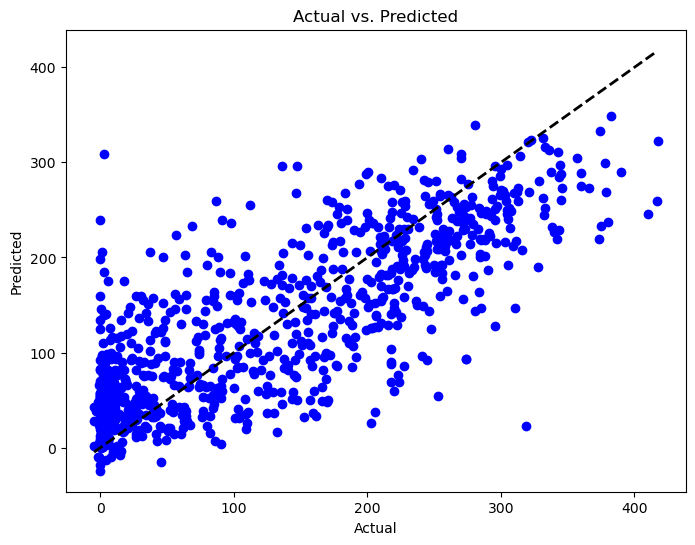

RMSE Training = 66.27535394255175


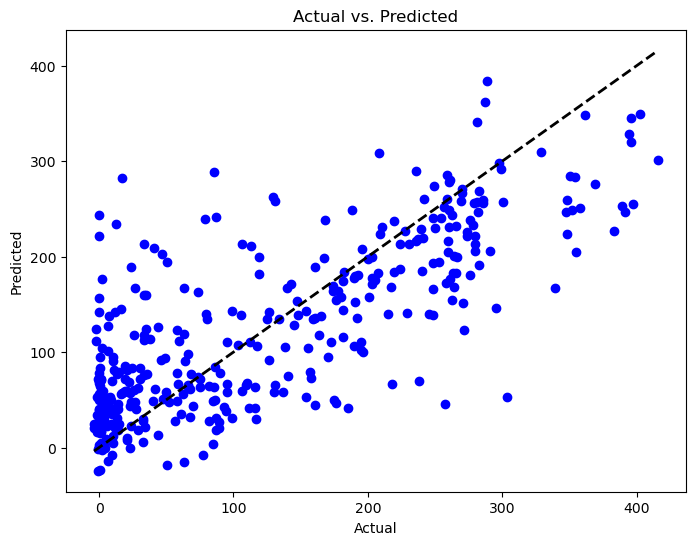

RMSE Testing = 73.21937214733224


In [127]:
#calls on the model to predict outcome in general
linear_reg(x_train, x_test, y_train, y_test)

In [128]:

train_qb = qb_df[qb_df['season']!=2022]
test_qb = qb_df[qb_df['season']==2022]

In [129]:
# Saving player_id and player_name before dropping them
train_ids_names = train_qb[['player_id', 'player_name']]
test_ids_names = test_qb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','fantasy_points_ppr']),drop_first=True).astype(float)
train_y = train_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_qb.drop(columns=['player_id','player_name','position','season','fantasy_points_ppr_next_season','fantasy_points_ppr']),drop_first=True).astype(float)
test_y = test_qb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [130]:
#plot_of_results
def top_predictions(results):
  melted_results = pd.melt(results, id_vars=['player_id', 'player_name'],
                         value_vars=['actual_fantasy_points', 'predicted_fantasy_points'],
                         var_name='Fantasy Points Type', value_name='Fantasy Points')

  sns.set(style="whitegrid")
  plt.figure(figsize=(12, 6))
  sns.barplot(x='player_name', y='Fantasy Points', hue='Fantasy Points Type', data=melted_results)
  plt.xlabel('Player Name')
  plt.ylabel('Fantasy Points')
  plt.title('Actual vs. Predicted Fantasy Points for Each Player')
  plt.xticks(rotation=90)
  plt.legend()
  plt.tight_layout()
  plt.show()

In [132]:
train_X.drop(columns = [ 'fantasy_points_per_game','injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)
test_X.drop(columns = [ 'fantasy_points_per_game','injury type_knee', 'injury type_no injury', 'injury type_shoulder', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_72-74', 'games_played'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.647
Model:                                        OLS   Adj. R-squared:                  0.625
Method:                             Least Squares   F-statistic:                     29.93
Date:                            Fri, 31 May 2024   Prob (F-statistic):          6.14e-204
Time:                                    12:46:07   Log-Likelihood:                -6605.6
No. Observations:                            1179   AIC:                         1.335e+04
Df Residuals:                                1110   BIC:                         1.370e+04
Df Model:                                      68                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

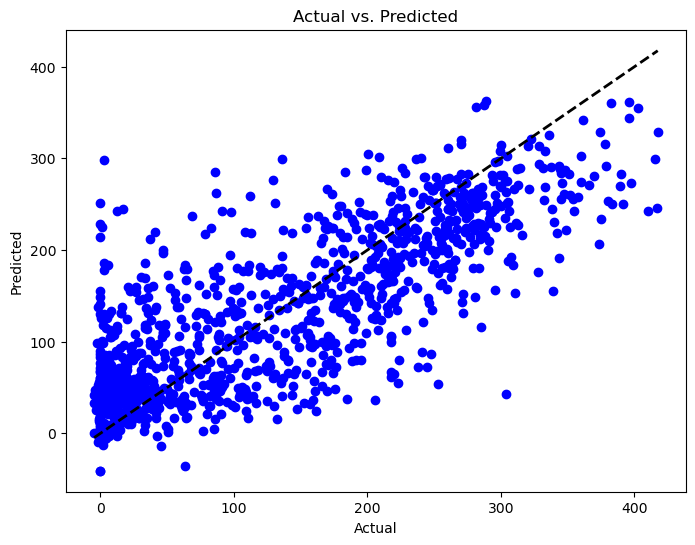

RMSE Training = 65.61139992917985


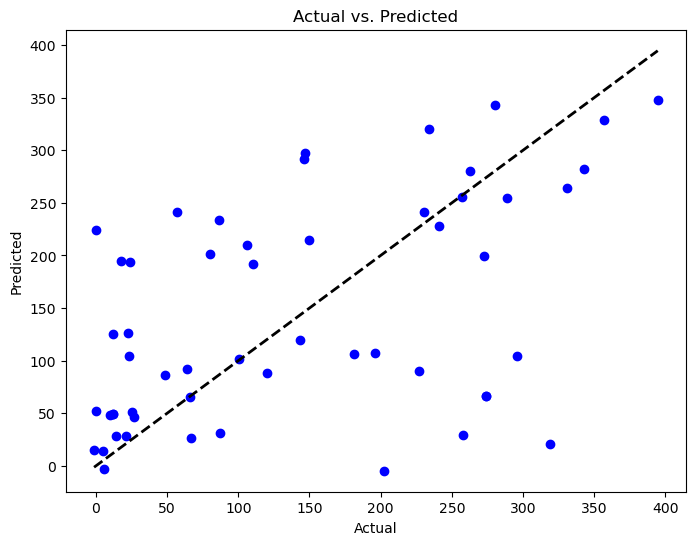

RMSE Testing = 110.75416452935632


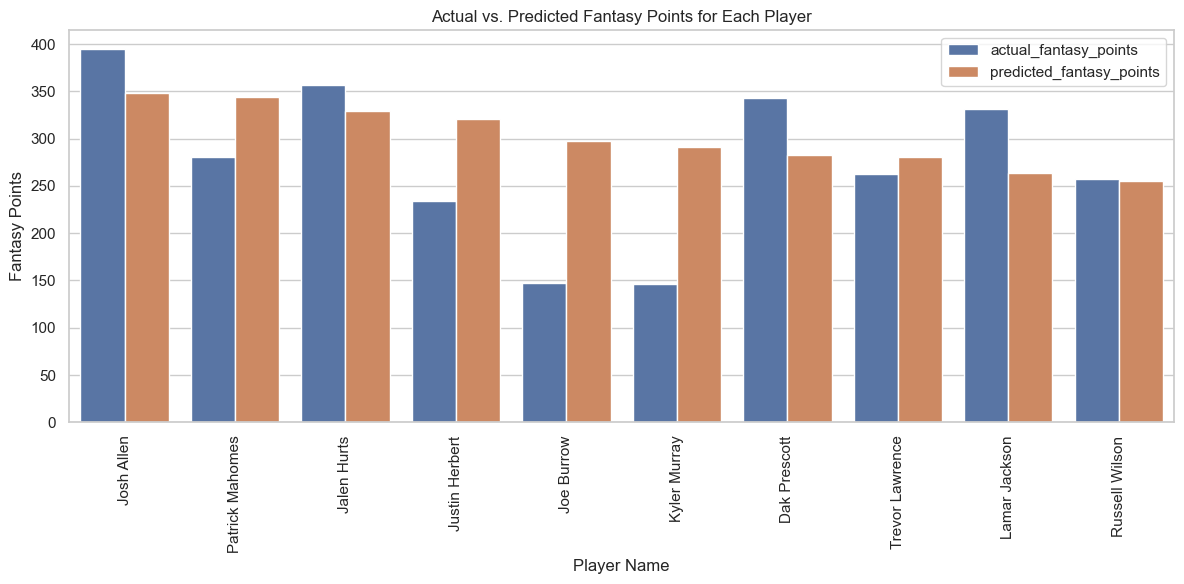

In [133]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

In [134]:
#random forrest regression model
def randomforest(train_X, test_X, train_y, test_y, test_ids_names):
    # Create RandomForestRegressor object with configuration
    regressor = RandomForestRegressor(max_depth=10, criterion="squared_error", oob_score=True, bootstrap=True)
    regressor.fit(train_X, train_y)

    # Access the OOB Score
    oob_score = regressor.oob_score_
    print(f'Out-of-Bag Score: {oob_score}')

    # Making predictions on the test data
    predictions = regressor.predict(test_X)

    # Evaluating the model
    mse = sklearn.metrics.mean_squared_error(test_y, predictions)
    print(f'Root Mean Squared Error: {math.sqrt(mse)}')

    r2 = r2_score(test_y, predictions)
    print(f'R-squared: {r2}')

    # Prepare DataFrame to show predictions with player information
    results = pd.DataFrame({
        'player_id': test_ids_names['player_id'],
        'player_name': test_ids_names['player_name'],
        'actual_fantasy_points': test_y,
        'predicted_fantasy_points': predictions
    })

    results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
    results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
    results = results.sort_values('predicted_fantasy_points',ascending=False)
    top = results.head(10)

    top_predictions(top)
    prediction_scatterplot(test_y, predictions)
    return results


Out-of-Bag Score: 0.5824161809403338
Root Mean Squared Error: 108.4469678081669
R-squared: 0.14842252745351092


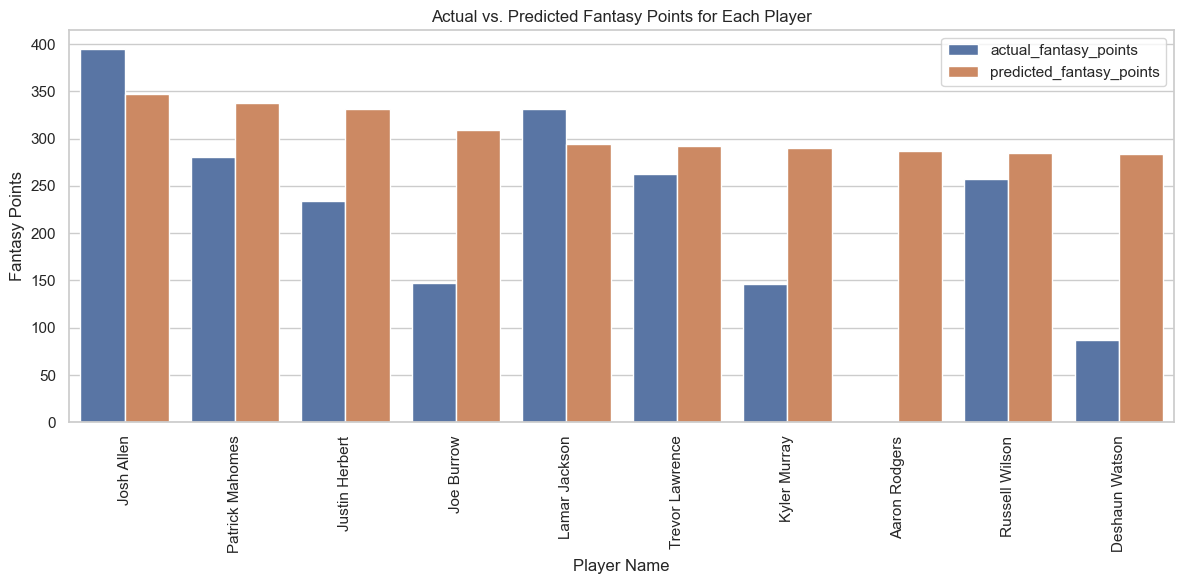

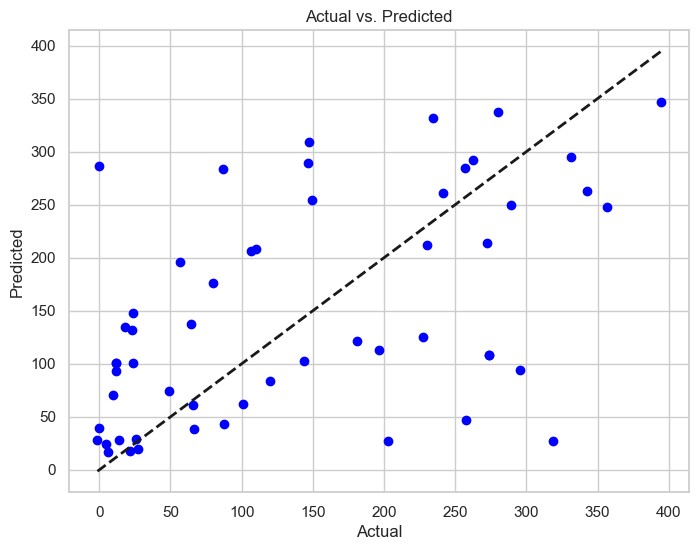

In [135]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)


In [136]:
results.sort_values('predicted_fantasy_points',ascending=False)

player_id        player_name  actual_fantasy_points  \
1221  00-0034857         Josh Allen                 394.64   
1186  00-0033873    Patrick Mahomes                 280.22   
1253  00-0036355     Justin Herbert                 234.16   
1259  00-0036442         Joe Burrow                 147.16   
1210  00-0034796      Lamar Jackson                 331.22   
1265  00-0036971    Trevor Lawrence                 262.54   
1230  00-0035228       Kyler Murray                 146.36   
640   00-0023459      Aaron Rodgers                   0.00   
983   00-0029263     Russell Wilson                 256.90   
1174  00-0033537     Deshaun Watson                  86.80   
1143  00-0033077       Dak Prescott                 342.84   
1080  00-0031280         Derek Carr                 241.12   
1004  00-0029604       Kirk Cousins                 149.74   
1152  00-0033106         Jared Goff                 289.10   
1256  00-0036389        Jalen Hurts                 356.82   
1248  00-0036212     Tua Tagovailoa                 272.36   
1263  00-0036945      Justin Fields                 230.18   
1272  00-0038102      Kenny Pickett                 110.20   
1267  00-0036972          Mac Jones                 106.40   
1242  00-0035710       Daniel Jones                  56.96   
1038  00-0029701     Ryan Tannehill                  80.04   
943   00-0027973        Andy Dalton                  23.64   
1089  00-0031345    Jimmy Garoppolo                  64.10   
1261  00-0036898        Davis Mills                  17.82   
1159  00-0033119    Jacoby Brissett                  22.86   
1062  00-0030565         Geno Smith                 227.26   
1273  00-0038122     Desmond Ridder                 181.14   
1235  00-0035289    Gardner Minshew                 196.20   
1216  00-0034855     Baker Mayfield                 274.06   
1215  00-0034855     Baker Mayfield                 274.06   
1169  00-0033357        Taysom Hill                 143.52   
1125  00-0032268     Marcus Mariota                  11.76   
1124  00-0032268     Marcus Mariota                  11.76   
1226  00-0034869        Sam Darnold                  23.38   
1271  00-0037834        Brock Purdy                 295.60   
1103  00-0031503     Jameis Winston                  11.96   
1269  00-0037013        Zach Wilson                 119.94   
1180  00-0033869  Mitchell Trubisky                  48.68   
972   00-0028986        Case Keenum                   9.74   
827   00-0026158         Joe Flacco                 100.84   
1110  00-0031800    Taylor Heinicke                  66.00   
1270  00-0037077         Sam Howell                 257.54   
960   00-0028118       Tyrod Taylor                  87.34   
1071  00-0031237  Teddy Bridgewater                  -0.20   
1164  00-0033319       Nick Mullens                  66.74   
1245  00-0035993      Tyler Huntley                  25.62   
1202  00-0034577         Kyle Allen                  -1.30   
1129  00-0032436       Jeff Driskel                  13.94   
1250  00-0036264        Jordan Love                 319.06   
1195  00-0033949       Joshua Dobbs                 202.66   
869   00-0026625        Brian Hoyer                   4.94   
1116  00-0032156     Trevor Siemian                  26.96   
1192  00-0033936      C.J. Beathard                  21.46   
928   00-0027948     Blaine Gabbert                   5.90   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
1221                347.015992                 1.0                    1.0  
1186                337.582007                 8.0                    2.0  
1253                331.803668                16.0                    3.0  
1259                309.247874                23.0                    4.0  
1210                294.502607                 4.0                    5.0  
1265                292.293806                12.0                    6.0  
1230                289.650815                24.0              

### XGBoost

In [137]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


In [138]:
def xgboost(train_X, test_X, train_y, test_y, test_ids_names ):
  xg_reg = xgb.XGBRegressor(objective = "reg:squarederror",n_estimators = 10,random_state=0)
  xg_reg.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(xg_reg.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()



  xgb_params = {
    'colsample_bytree': [0.8, 0.7,0.6],
    'n_estimators': [60,70,80],
    'max_depth': [4,5,7]
}

  xgb_grid = GridSearchCV(
      estimator = xg_reg, param_grid =  xgb_params, scoring="neg_mean_squared_error",cv=4,verbose=1
  )
  xgb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_xgb_reg = xgb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_xgb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)


  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
    'player_id': test_ids_names['player_id'],
    'player_name': test_ids_names['player_name'],
    'actual_fantasy_points': test_y,
    'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return xgb_grid




avg_fantasy_points: 0.271998
starter_or_backup: 0.174297
year_in_league: 0.025481
pacr: 0.021192
passing_epa: 0.021055
passing_yards_after_catch: 0.020355
rushing_fumbles: 0.020350
wins: 0.020138
injury type_leg: 0.019721
changed_teams_midseason: 0.019711
binned_weight_220-239: 0.019474
rushing_tds: 0.018727
season ending_yes: 0.018057
rushing_2pt_conversions: 0.017780
binned_weight_200-219: 0.016976
binned_draft_pick_Third Round: 0.016562
binned_draft_pick_Late Second Round: 0.016205
years_coached: 0.015865
rushing_fumbles_lost: 0.015825
rushing_yards: 0.015511
new_team: 0.014939
rushing_epa: 0.014371
injury type_ankle: 0.013801
binned_draft_pick_Undrafted: 0.013455
binned_weight_240-259: 0.013390
interceptions: 0.012869
binned_draft_pick_Fourth Round: 0.012839
passing_2pt_conversions: 0.012503
binned_draft_pick_Sixth Round: 0.011743
injury type_finger: 0.011308
sacks: 0.010838
injury type_acl: 0.009612
sack_fumbles: 0.009475
injury severity_severe: 0.008872
binned_draft_pick_Seventh 

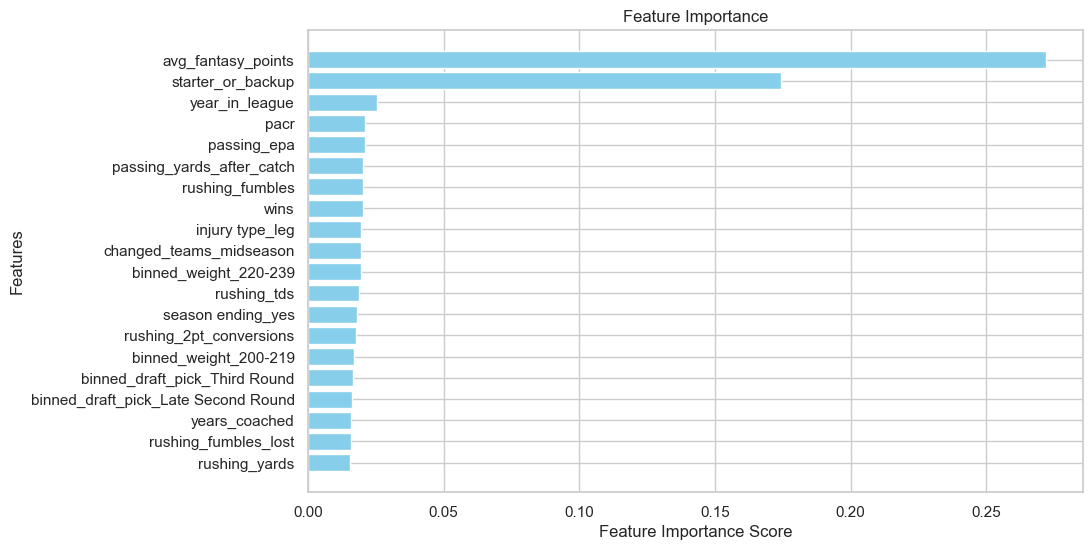

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 112.8442369190667
R-squared: 0.07796351770316412


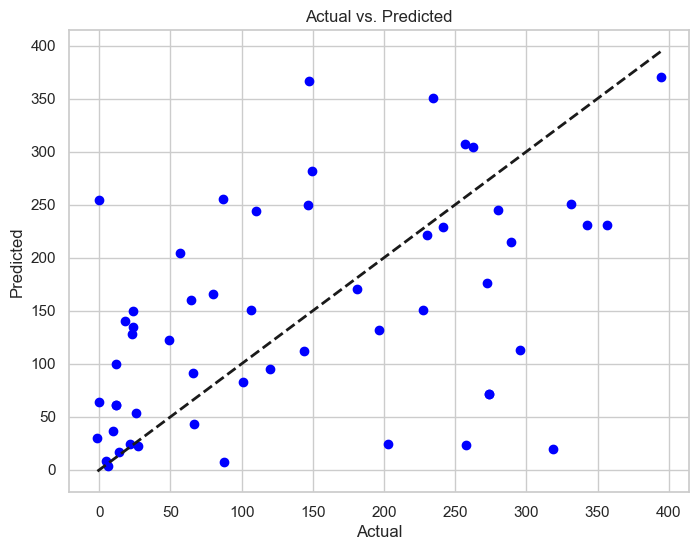

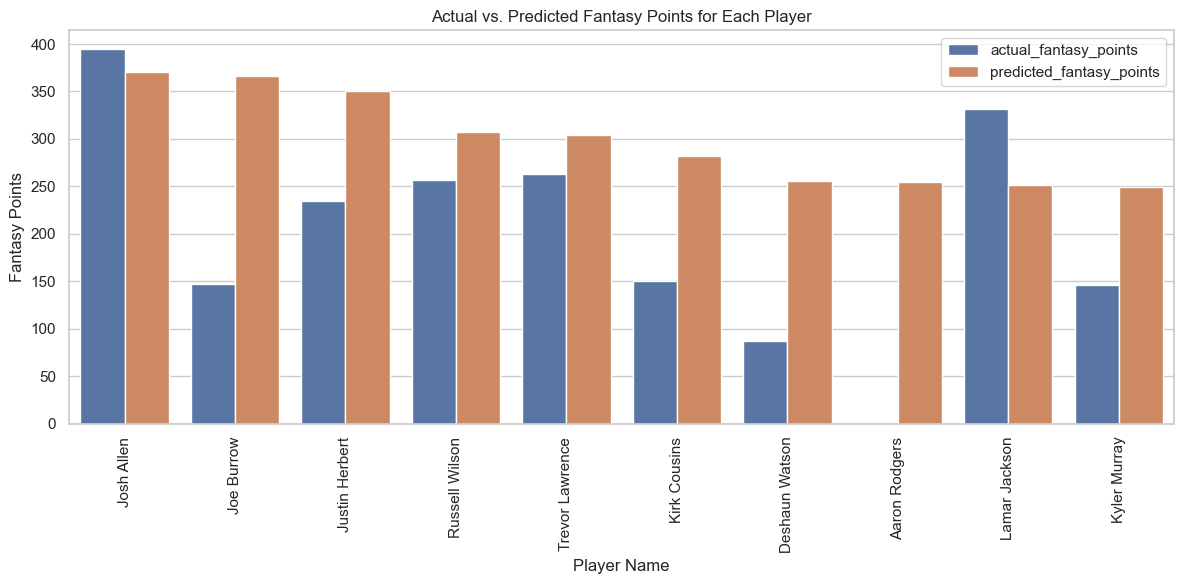

In [139]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )


### Gradient Boosting

In [140]:
def gradientboosting(train_X, test_X, train_y, test_y, test_ids_names):
  gb = GradientBoostingRegressor(max_depth=4, n_estimators=200,random_state=2)
  gb.fit(train_X,train_y)
  feature_importance = [(train_X.columns[i], item) for i, item in enumerate(gb.feature_importances_)]

  sorted_feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
  for feature, importance in sorted_feature_importance:
    print("{0:s}: {1:.6f}".format(feature, importance))
  features = [feature[0] for feature in sorted_feature_importance]
  importance_scores = [feature[1] for feature in sorted_feature_importance]
  plt.figure(figsize=(10, 6))
  plt.barh(features[:20], importance_scores[:20], color='skyblue')
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title('Feature Importance')
  plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
  plt.show()
  gb_params = {
      'max_depth':[4,5],
      'n_estimators':[250,275],
      'subsample':[0.75,0.8],
              'max_features':[0.2]
  }

  gb_grid = GridSearchCV(
      estimator = gb, param_grid =  gb_params, scoring="neg_mean_squared_error",cv=5,verbose=1
      )

  gb_grid.fit(train_X, train_y)

  # Get best estimator from grid search
  best_gb_reg = gb_grid.best_estimator_

  # Make predictions on test data
  Y_pred = best_gb_reg.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
})

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

  return gb_grid

avg_fantasy_points: 0.587614
starter_or_backup: 0.101249
passing_epa: 0.042518
year_in_league: 0.036527
rushing_epa: 0.034801
passing_yards_after_catch: 0.023356
pacr: 0.022120
rushing_yards: 0.020015
wins: 0.018841
sacks: 0.015582
interceptions: 0.012705
years_coached: 0.011460
rushing_tds: 0.007460
sack_fumbles: 0.007007
new_team: 0.005290
passing_2pt_conversions: 0.005102
rushing_1000_yards: 0.004902
rushing_fumbles_lost: 0.003712
injured: 0.003034
rushing_fumbles: 0.002750
(1=firstyearwithteam,0=2+seasons): 0.002481
season ending_yes: 0.002204
rushing_2pt_conversions: 0.002099
binned_weight_240-259: 0.001822
binned_draft_pick_Undrafted: 0.001797
injury type_acl: 0.001795
changed_teams_midseason: 0.001614
binned_draft_pick_Sixth Round: 0.001486
binned_weight_260-279: 0.001344
binned_draft_pick_Late First Round: 0.001210
binned_draft_pick_Third Round: 0.001185
injury type_finger: 0.001175
binned_height_78-80: 0.001160
binned_weight_220-239: 0.001040
injury type_ankle: 0.001017
injury

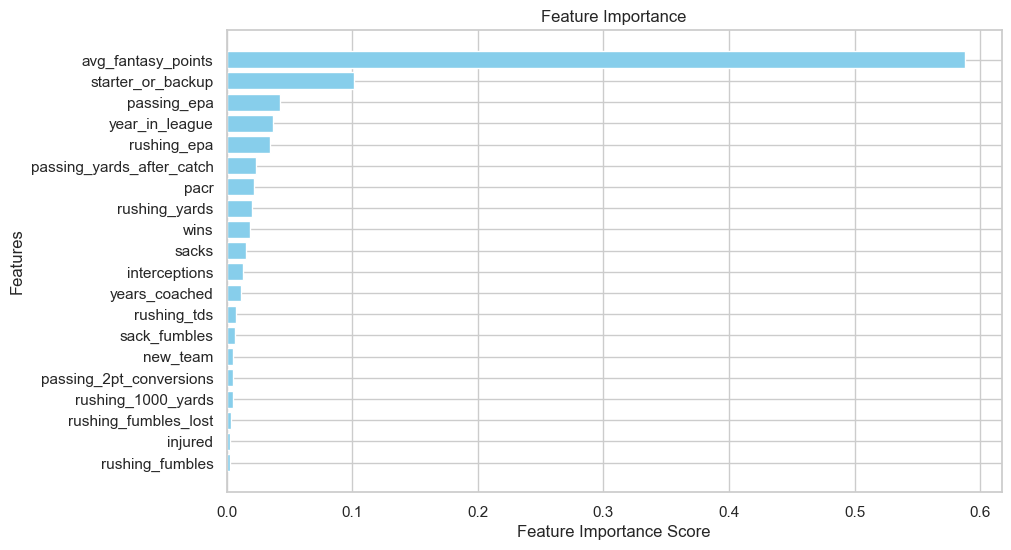

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 109.60408415267787
R-squared: 0.13015311623098968


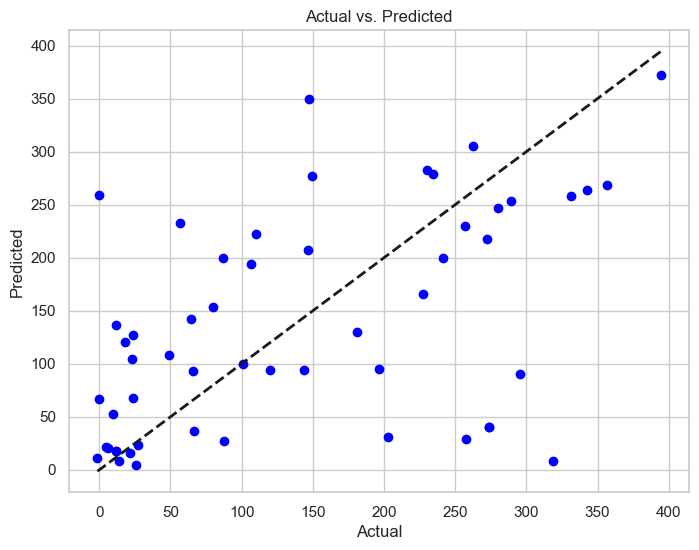

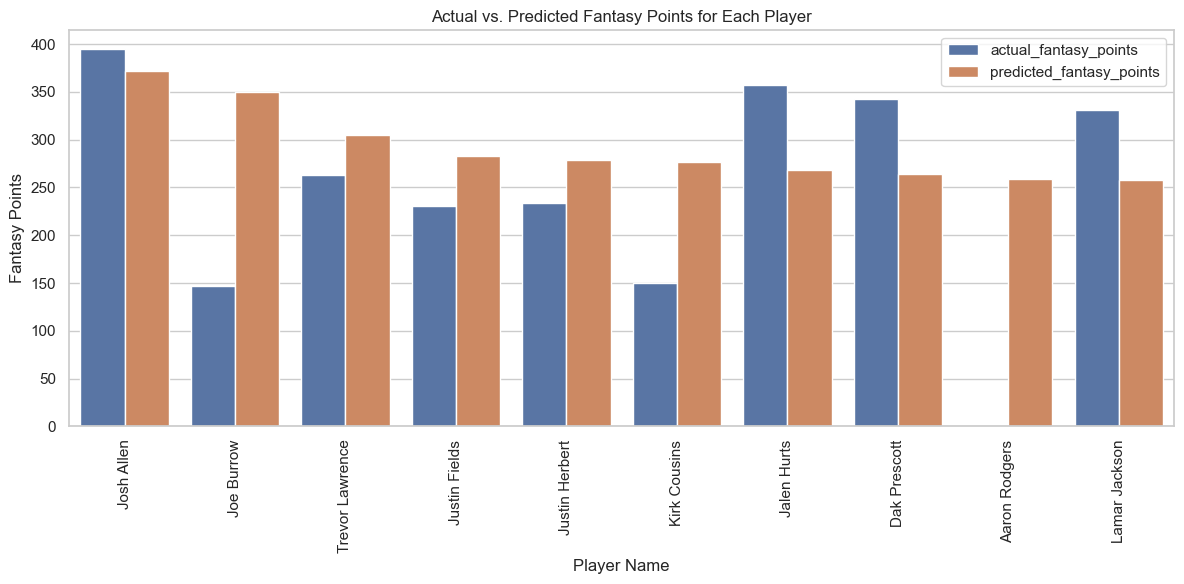

In [141]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

In [142]:
from sklearn.ensemble import VotingRegressor

In [143]:
def votingregressor(xgb_results, gb_results):
# After multiple trials xgb and gradient boosting were most successful models which is why they are the models used in the voting regressor

  regressors = [ ('XGBRegressor',xgb_results),('GradientBoostingRegressor',gb_results)]

  # Combing variables in a voting regression was the most effective method for minimizing RMSE

  vr = VotingRegressor(estimators=regressors)
  vr.fit(train_X, train_y)
  Y_pred = vr.predict(test_X)
  mse = sklearn.metrics.mean_squared_error(test_y, Y_pred)


  # Evaluate performance

  rmse = np.sqrt(mse)
  r2 = r2_score(test_y, Y_pred)


  print("Root Mean Squared Error:", rmse)
  print("R-squared:", r2)

  prediction_scatterplot(test_y, Y_pred)

  results = pd.DataFrame({
  'player_id': test_ids_names['player_id'],
  'player_name': test_ids_names['player_name'],
  'actual_fantasy_points': test_y,
  'predicted_fantasy_points': Y_pred
  })

  results['actual_points_rank'] = results['actual_fantasy_points'].rank(ascending=False)
  results['predicted_points_rank'] = results['predicted_fantasy_points'].rank(ascending=False)
  results = results.sort_values('predicted_fantasy_points',ascending=False)
  top = results.head(10)

  top_predictions(top)
  #results.sort_values('predicted_fantasy_points',ascending=False)

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 110.14214402460834
R-squared: 0.12159178361146783


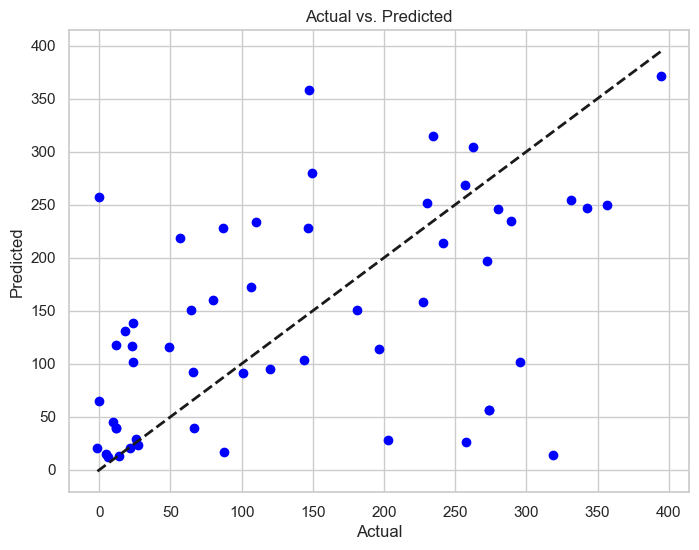

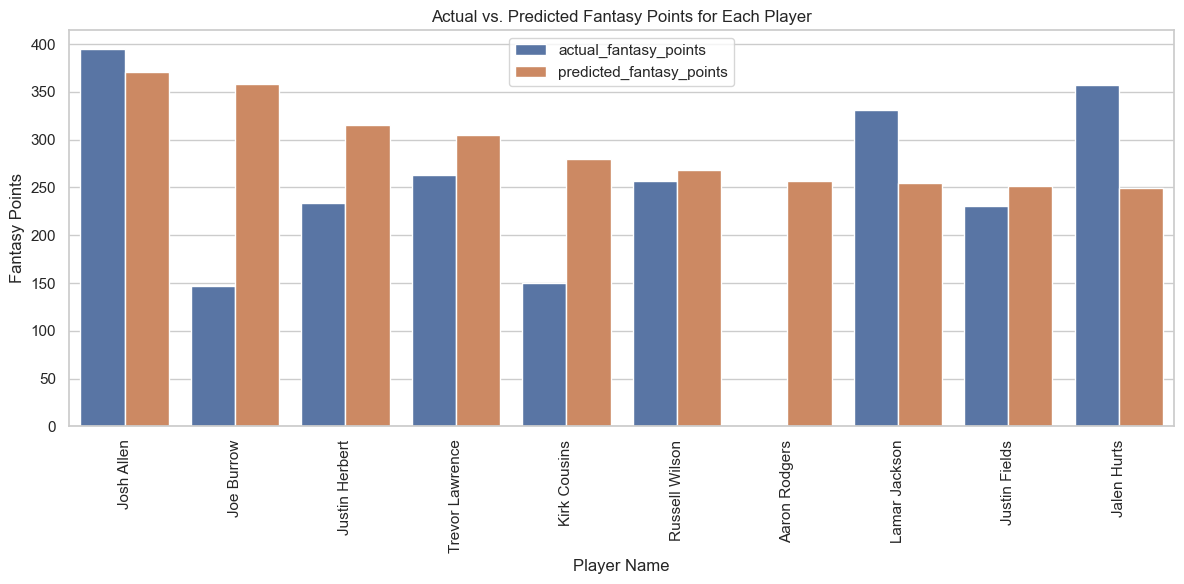

In [144]:
votingregressor(xg_results, gb_results )

## Wide Receiver and Tight End Analysis

### Regression

In [145]:
#this drops all the rookie data
wr_df.dropna(axis = 0, inplace=True)

In [146]:
#converts all the categorical and binned data
x = pd.get_dummies(wr_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season','fantasy_points_per_game']),drop_first=True).astype(float)
y = wr_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [147]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


feature    games_played
VIF           24.795838
Name: 0, dtype: object
feature     injured
VIF        2.337168
Name: 1, dtype: object
feature    new_team
VIF        1.377184
Name: 2, dtype: object
feature    QB_4000_yards
VIF             1.424617
Name: 3, dtype: object
feature    rushing_1000_yards
VIF                  1.763028
Name: 4, dtype: object
feature        racr
VIF        2.875021
Name: 5, dtype: object
feature    air_yards_share
VIF               5.844014
Name: 6, dtype: object
feature    rushing_yards
VIF             3.122048
Name: 7, dtype: object
feature    rushing_tds
VIF           1.805974
Name: 8, dtype: object
feature    rushing_fumbles
VIF               1.603498
Name: 9, dtype: object
feature    rushing_epa
VIF           1.868521
Name: 10, dtype: object
feature    rushing_2pt_conversions
VIF                       1.153356
Name: 11, dtype: object
feature    receiving_fumbles
VIF                 1.704737
Name: 12, dtype: object
feature    receiving_yards_after_catch
VIF

feature        VIF
0                      games_played  24.795838
1                           injured   2.337168
2                          new_team   1.377184
3                     QB_4000_yards   1.424617
4                rushing_1000_yards   1.763028
..                              ...        ...
73   binned_draft_pick_Fourth Round   4.563721
74    binned_draft_pick_Fifth Round   4.382972
75    binned_draft_pick_Sixth Round   3.008100
76  binned_draft_pick_Seventh Round   2.388547
77      binned_draft_pick_Undrafted   7.459869

[78 rows x 2 columns]

In [149]:
x.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_suspension', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)

In [150]:
multicollinearity(x)

feature     injured
VIF        2.007731
Name: 0, dtype: object
feature    new_team
VIF        1.365299
Name: 1, dtype: object
feature    QB_4000_yards
VIF              1.41468
Name: 2, dtype: object
feature    rushing_1000_yards
VIF                  1.737702
Name: 3, dtype: object
feature        racr
VIF        2.513821
Name: 4, dtype: object
feature    air_yards_share
VIF               5.596274
Name: 5, dtype: object
feature    rushing_yards
VIF             3.028915
Name: 6, dtype: object
feature    rushing_tds
VIF           1.795969
Name: 7, dtype: object
feature    rushing_fumbles
VIF               1.593599
Name: 8, dtype: object
feature    rushing_epa
VIF           1.853479
Name: 9, dtype: object
feature    rushing_2pt_conversions
VIF                       1.146858
Name: 10, dtype: object
feature    receiving_fumbles
VIF                 1.632909
Name: 11, dtype: object
feature    receiving_yards_after_catch
VIF                           5.841965
Name: 12, dtype: object
feature    r

feature       VIF
0                           injured  2.007731
1                          new_team  1.365299
2                     QB_4000_yards  1.414680
3                rushing_1000_yards  1.737702
4                              racr  2.513821
..                              ...       ...
60   binned_draft_pick_Fourth Round  3.015954
61    binned_draft_pick_Fifth Round  2.802426
62    binned_draft_pick_Sixth Round  2.118386
63  binned_draft_pick_Seventh Round  1.815682
64      binned_draft_pick_Undrafted  4.441214

[65 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.565
Model:                                        OLS   Adj. R-squared:                  0.552
Method:                             Least Squares   F-statistic:                     45.56
Date:                            Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                                    12:49:02   Log-Likelihood:                -14602.
No. Observations:                            2709   AIC:                         2.936e+04
Df Residuals:                                2633   BIC:                         2.981e+04
Df Model:                                      75                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

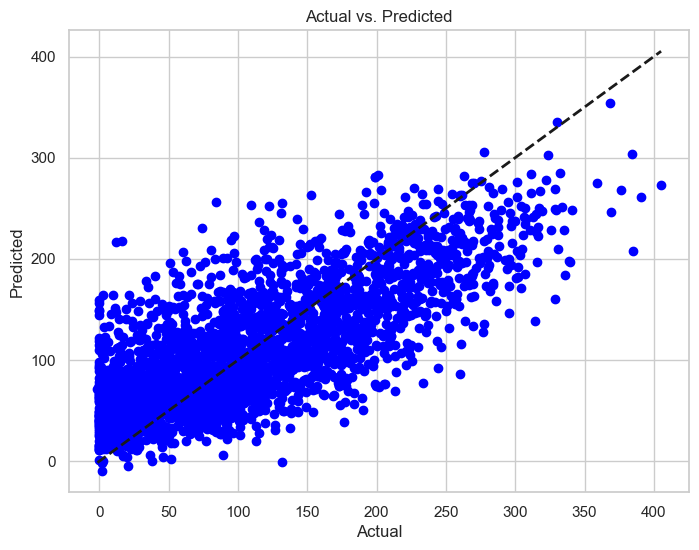

RMSE Training = 53.055356817192255


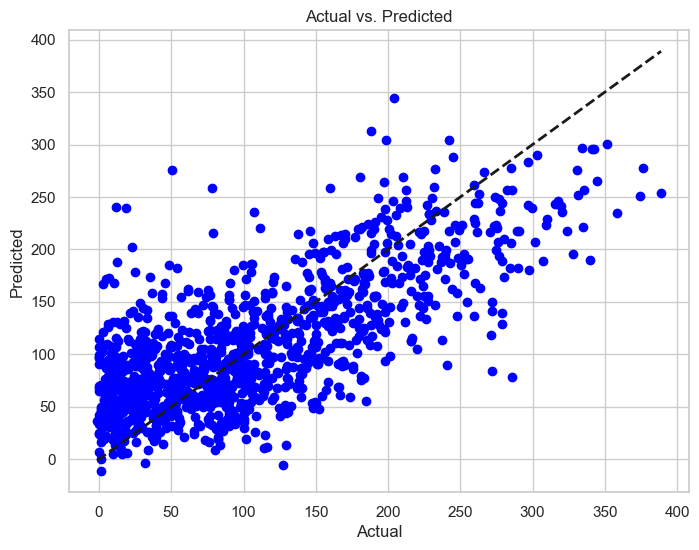

RMSE Testing = 56.13559295462785


In [151]:
linear_reg(x_train, x_test, y_train, y_test)

In [152]:
train_wr = wr_df[wr_df['season']!=2022]
test_wr = wr_df[wr_df['season']==2022]

In [153]:
# Saving player_id and player_name before dropping them
train_ids_names = train_wr[['player_id', 'player_name']]
test_ids_names = test_wr[['player_id', 'player_name']]

train_X = pd.get_dummies(train_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
train_y = train_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_wr.drop(columns=['player_id','player_name','season','fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_wr['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [155]:
train_X.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_suspension', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)
test_X.drop(columns = ['fantasy_points_ppr','injury type_achilles', 'injury type_ankle', 'injury type_foot', 'injury type_hamstring', 'injury type_knee', 'injury type_knee', 'injury type_no injury', 'injury type_suspension', 'season ending_no injury', 'injury severity_no injury', 'games_played', 'position_WR', 'binned_weight_240-259'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.555
Model:                                        OLS   Adj. R-squared:                  0.547
Method:                             Least Squares   F-statistic:                     69.80
Date:                            Fri, 31 May 2024   Prob (F-statistic):               0.00
Time:                                    12:49:55   Log-Likelihood:                -20030.
No. Observations:                            3707   AIC:                         4.019e+04
Df Residuals:                                3641   BIC:                         4.060e+04
Df Model:                                      65                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

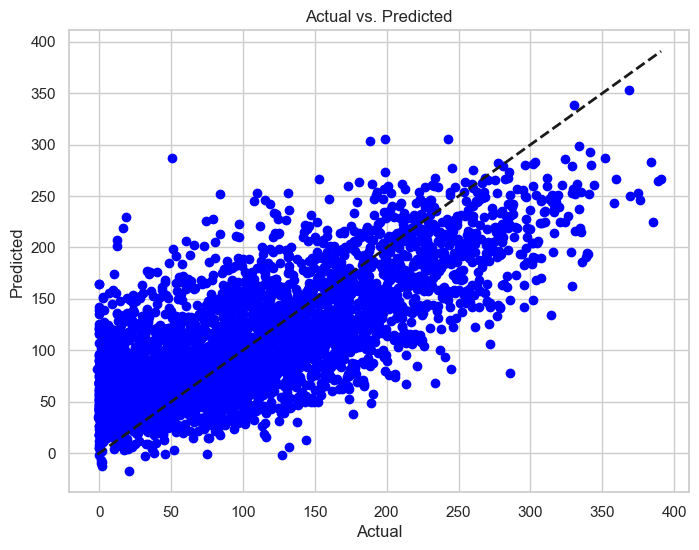

RMSE Training = 53.75374893911354


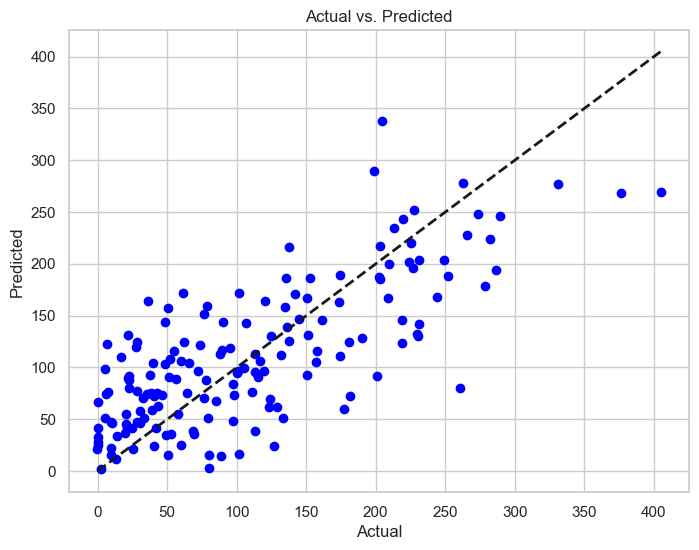

RMSE Testing = 57.451242951523966


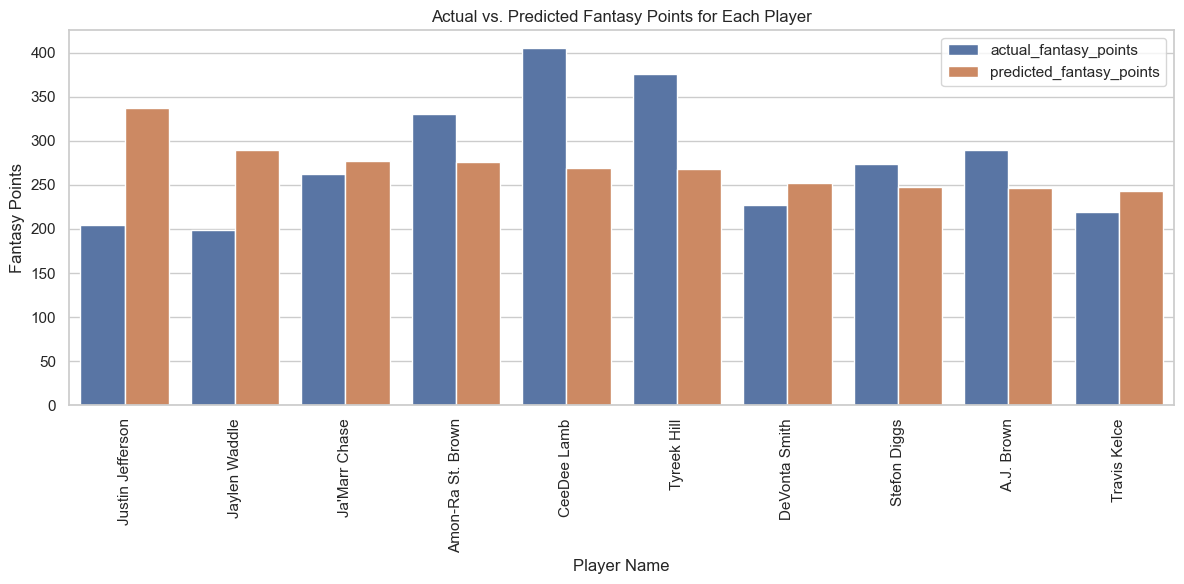

In [156]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

Out-of-Bag Score: 0.5192179947706905
Root Mean Squared Error: 59.82555530579065
R-squared: 0.5276166879481592


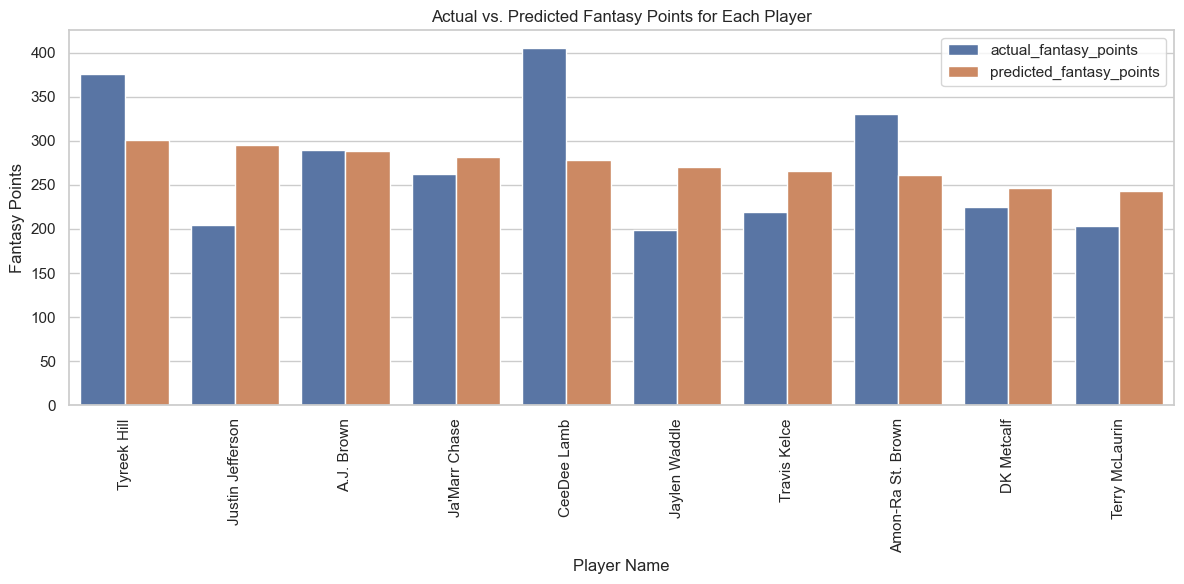

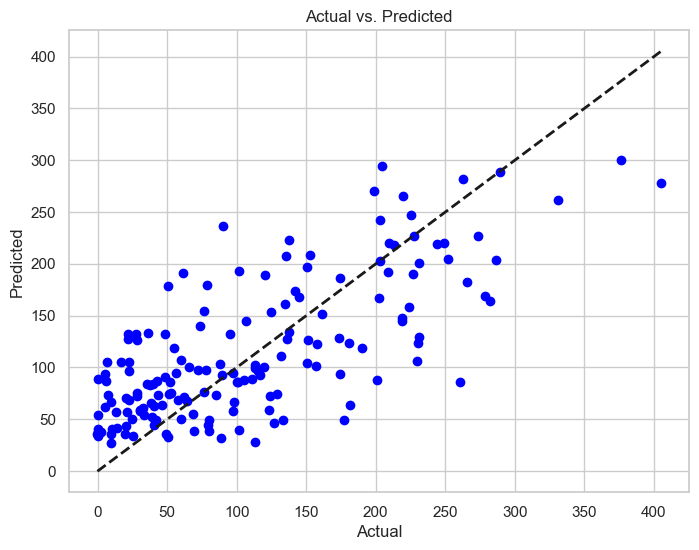

       player_id       player_name  actual_fantasy_points  \
8141  00-0033040       Tyreek Hill                 376.40   
4714  00-0036322  Justin Jefferson                 204.20   
3     00-0035676        A.J. Brown                 289.60   
3564  00-0036900     Ja'Marr Chase                 262.72   
1312  00-0036358       CeeDee Lamb                 405.20   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
8141                300.679167                 2.0                    1.0  
4714                294.895564                29.0                    2.0  
3                   288.968776                 4.0                    3.0  
3564                281.450328                10.0                    4.0  
1312                277.829774                 1.0                    5.0  


In [157]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [158]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

player_id            player_name  actual_fantasy_points  \
8141  00-0033040            Tyreek Hill                 376.40   
4714  00-0036322       Justin Jefferson                 204.20   
3     00-0035676             A.J. Brown                 289.60   
3564  00-0036900          Ja'Marr Chase                 262.72   
1312  00-0036358            CeeDee Lamb                 405.20   
4013  00-0036613          Jaylen Waddle                 198.60   
7923  00-0030506           Travis Kelce                 219.40   
256   00-0036963      Amon-Ra St. Brown                 330.90   
1848  00-0035640             DK Metcalf                 225.40   
7654  00-0035659         Terry McLaurin                 203.20   
5965  00-0032765         Michael Thomas                  89.80   
7344  00-0031588           Stefon Diggs                 273.80   
2347  00-0036912          DeVonta Smith                 227.60   
7579  00-0036410            Tee Higgins                 137.60   
1524  00-0033921           Chris Godwin                 209.20   
815   00-0036261          Brandon Aiyuk                 249.20   
2366  00-0035719           Deebo Samuel                 243.70   
3218  00-0037740         Garrett Wilson                 213.20   
2655  00-0035216        Diontae Johnson                 152.70   
5556  00-0034753           Mark Andrews                 135.40   
8468  00-0036252        Michael Pittman                 252.20   
1843  00-0034827             D.J. Moore                 286.50   
3248  00-0033288          George Kittle                 203.20   
1571  00-0037239            Chris Olave                 231.30   
1612  00-0034775         Christian Kirk                 150.26   
1625  00-0038124       Christian Watson                 101.30   
3250  00-0037247         George Pickens                 208.80   
4625  00-0033857    JuJu Smith-Schuster                  61.00   
244   00-0031544           Amari Cooper                 227.00   
4737  00-0036345            K.J. Osborn                 120.00   
2817  00-0037238           Drake London                 174.38   
2146  00-0031381          Davante Adams                 265.40   
2044  00-0036309         Darnell Mooney                  78.90   
8485  00-0033536          Mike Williams                  50.20   
4219  00-0036407            Jerry Jeudy                 141.80   
4790  00-0030279           Keenan Allen                 278.86   
8084  00-0033009             Tyler Boyd                 144.80   
8127  00-0032211          Tyler Lockett                 202.40   
6012  00-0031408             Mike Evans                 282.50   
5655  00-0035662         Marquise Brown                 134.70   
2289  00-0030564        DeAndre Hopkins                 223.60   
6343  00-0036894         Pat Freiermuth                  76.80   
3648  00-0037741           Jahan Dotson                 124.80   
3199  00-0036196             Gabe Davis                 161.40   
7446  00-0035229         T.J. Hockenson                 219.00   
3697  00-0034960          Jakobi Meyers                 218.58   
4592  00-0036988            Josh Palmer                 106.70   
6278  00-0035644              Noah Fant                  73.40   
5144  00-0036970             Kyle Pitts                 137.30   
4649  00-0027944            Julio Jones                  36.40   
5880  00-0035140         Mecole Hardman                  27.70   
1425  00-0036326         Chase Claypool                  21.70   
138   00-0037664            Alec Pierce                  95.40   
3443  00-0034983         Hunter Renfrow                  48.50   
98    00-0030035           Adam Thielen                 231.00   
811   00-0031236          Brandin Cooks                 173.20   
5338  00-0036268       Laviska Shenault                  21.50   
1873  00-0034351         Dallas Goedert                 136.30   
2740  00-0036233  Donovan Peoples-Jones                  28.50   
2032  00-0035535         Darius Slayton        

### XGBoost

avg_fantasy_points: 0.368023
year_in_league: 0.040924
binned_draft_pick_Third Round: 0.026254
receiving_epa: 0.023077
binned_draft_pick_Sixth Round: 0.022798
injury type_groin: 0.020158
binned_weight_180-199: 0.020129
receiving_yards_after_catch: 0.019813
rushing_tds: 0.019437
new_team: 0.017617
binned_weight_260-279: 0.017315
ties: 0.017021
rushing_fumbles: 0.016628
injury severity_severe: 0.015919
binned_draft_pick_Early Second Round: 0.015513
injury type_illness: 0.015394
air_yards_share: 0.015048
special_teams_tds: 0.014932
wins: 0.014766
years_coached: 0.014764
binned_draft_pick_Seventh Round: 0.014553
binned_weight_200-219: 0.014425
receiving_fumbles: 0.013869
binned_height_72-74: 0.013694
rushing_epa: 0.013577
rushing_yards: 0.013423
receiving_2pt_conversions: 0.012561
changed_teams_midseason: 0.012213
injury type_leg: 0.011671
binned_draft_pick_Undrafted: 0.011333
injury type_elbow: 0.011321
racr: 0.011067
binned_draft_pick_Fourth Round: 0.010588
injury type_back: 0.010372
inju

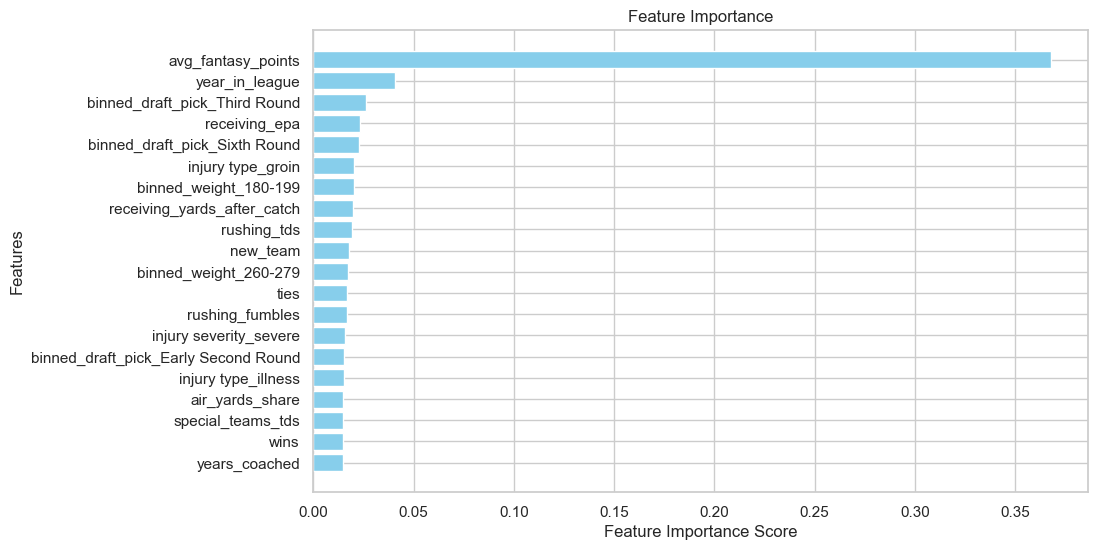

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 62.67013871432447
R-squared: 0.48162698916098223


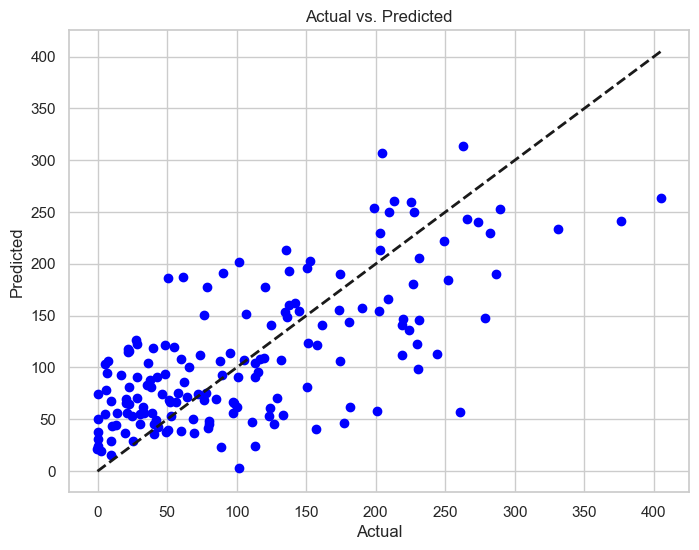

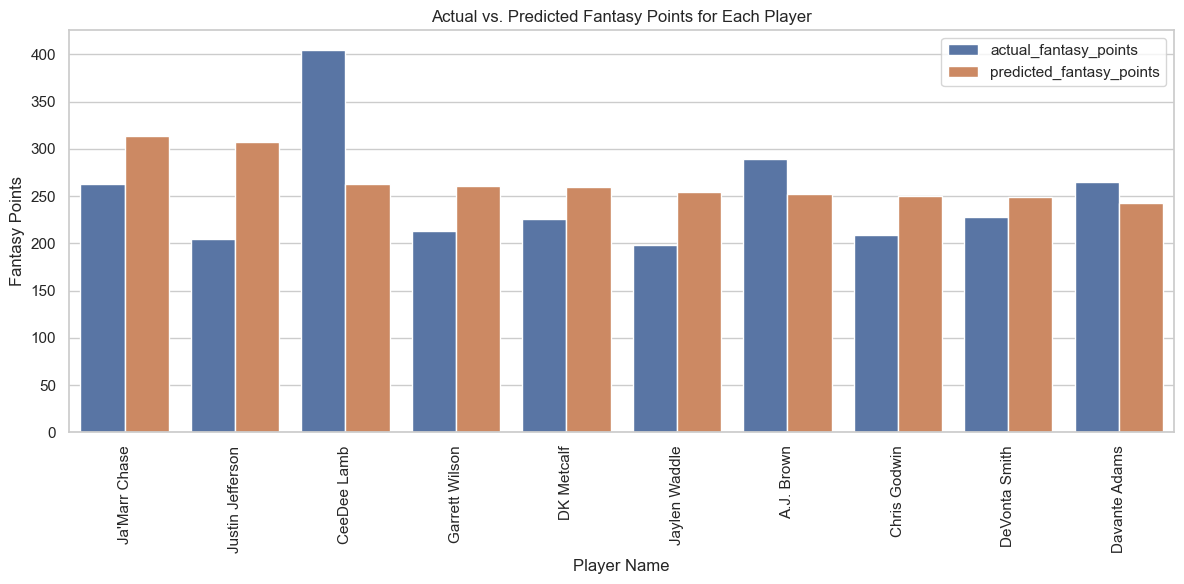

In [159]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

avg_fantasy_points: 0.699938
year_in_league: 0.067279
receiving_epa: 0.056775
receiving_yards_after_catch: 0.029453
air_yards_share: 0.027479
rushing_epa: 0.016767
rushing_yards: 0.014829
racr: 0.012855
wins: 0.011007
years_coached: 0.010378
new_team: 0.006740
receiving_fumbles: 0.004012
binned_height_75-77: 0.002534
injury type_ribs: 0.002173
injury severity_severe: 0.002142
rushing_1000_yards: 0.001880
binned_weight_180-199: 0.001838
changed_teams_midseason: 0.001744
binned_draft_pick_Undrafted: 0.001556
binned_draft_pick_Early Second Round: 0.001532
ties: 0.001455
QB_4000_yards: 0.001408
binned_draft_pick_Late Second Round: 0.001404
binned_draft_pick_Sixth Round: 0.001387
binned_height_72-74: 0.001324
binned_draft_pick_Seventh Round: 0.001204
binned_weight_200-219: 0.001195
binned_weight_220-239: 0.001134
rushing_fumbles: 0.001126
binned_draft_pick_Third Round: 0.001077
(1=firstyearwithteam,0=2+seasons): 0.001069
special_teams_tds: 0.001017
injury type_groin: 0.000942
injury type_il

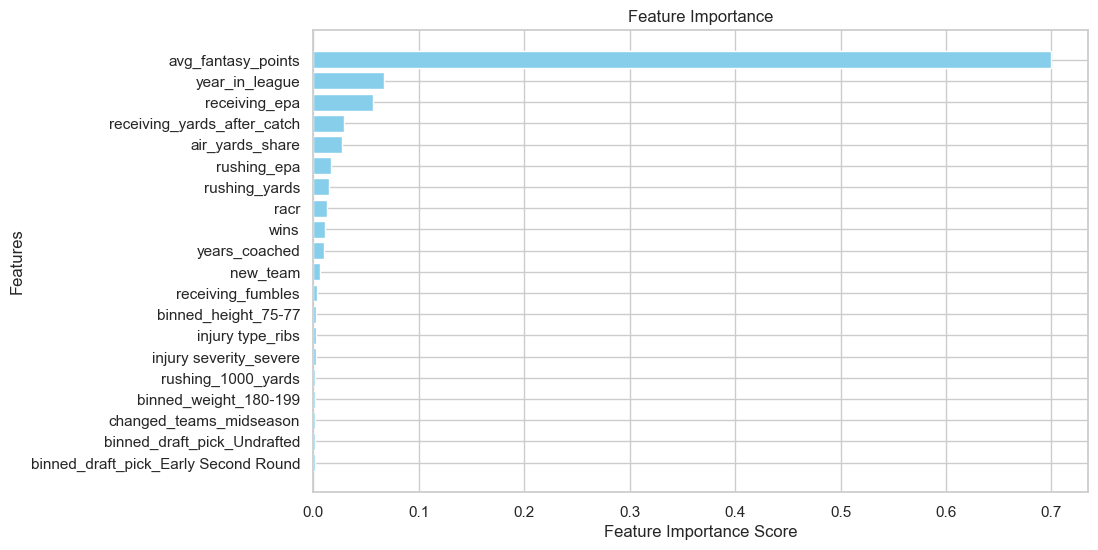

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [160]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 60.176980074472944
R-squared: 0.520320030657577


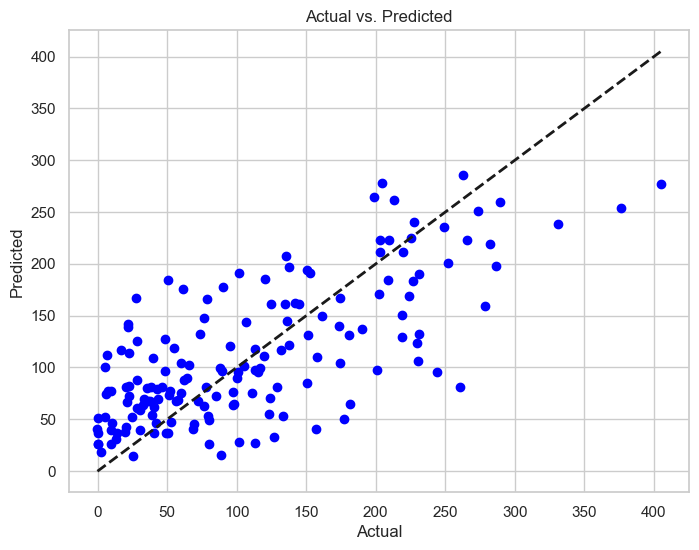

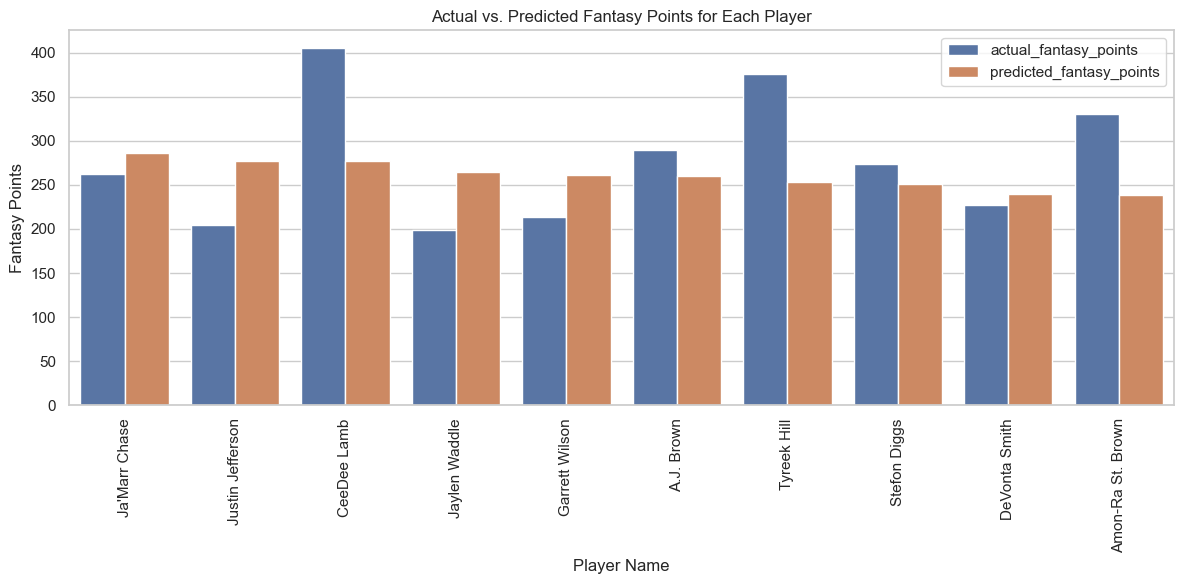

In [591]:
votingregressor(xg_results, gb_results )

## Running Back Analysis

### Regression

In [164]:
#this drops all the rookie data
rb_df.dropna(axis = 0, inplace=True)

In [165]:
rb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1859 entries, 3771 to 4885
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   player_id                          1859 non-null   object  
 1   player_name                        1859 non-null   object  
 2   position                           1859 non-null   object  
 3   season                             1859 non-null   float64 
 4   games_played                       1859 non-null   float64 
 5   injured                            1859 non-null   float64 
 6   injury type                        1859 non-null   object  
 7   injury severity                    1859 non-null   object  
 8   season ending                      1859 non-null   object  
 9   new_team                           1859 non-null   int64   
 10  QB_4000_yards                      1859 non-null   int64   
 11  Receiving_1000_yards               1859 

In [166]:
x = pd.get_dummies(rb_df.drop(columns=['player_id', 'player_name','season',
                                     'fantasy_points_ppr_next_season', 'fantasy_points_per_game']),drop_first=True).astype(float)
y = rb_df['fantasy_points_ppr_next_season'].astype(float)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [167]:
multicollinearity(x)

C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\alexs\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


feature    games_played
VIF            2.751622
Name: 0, dtype: object
feature     injured
VIF        1.749938
Name: 1, dtype: object
feature    new_team
VIF        1.238959
Name: 2, dtype: object
feature    QB_4000_yards
VIF             1.308406
Name: 3, dtype: object
feature    Receiving_1000_yards
VIF                    1.196077
Name: 4, dtype: object
feature        racr
VIF        1.078209
Name: 5, dtype: object
feature    target_share
VIF            2.878271
Name: 6, dtype: object
feature    air_yards_share
VIF               1.925226
Name: 7, dtype: object
feature       wopr
VIF        5.73589
Name: 8, dtype: object
feature    rushing_fumbles
VIF                 2.0202
Name: 9, dtype: object
feature    rushing_epa
VIF           1.491251
Name: 10, dtype: object
feature    rushing_2pt_conversions
VIF                       1.069621
Name: 11, dtype: object
feature    receiving_tds
VIF              1.99462
Name: 12, dtype: object
feature    receiving_fumbles
VIF                 1.20961

feature       VIF
0                      games_played  2.751622
1                           injured  1.749938
2                          new_team  1.238959
3                     QB_4000_yards  1.308406
4              Receiving_1000_yards  1.196077
..                              ...       ...
69   binned_draft_pick_Fourth Round  3.464541
70    binned_draft_pick_Fifth Round  2.625533
71    binned_draft_pick_Sixth Round  2.459602
72  binned_draft_pick_Seventh Round  1.995516
73      binned_draft_pick_Undrafted  4.626448

[74 rows x 2 columns]

In [169]:
x.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)

In [170]:
multicollinearity(x)

feature     injured
VIF        2.187953
Name: 0, dtype: object
feature    new_team
VIF        1.442917
Name: 1, dtype: object
feature    QB_4000_yards
VIF             1.715606
Name: 2, dtype: object
feature    Receiving_1000_yards
VIF                      2.5325
Name: 3, dtype: object
feature        racr
VIF        1.080825
Name: 4, dtype: object
feature    target_share
VIF            11.40815
Name: 5, dtype: object
feature    air_yards_share
VIF               1.890952
Name: 6, dtype: object
feature         wopr
VIF        12.073447
Name: 7, dtype: object
feature    rushing_fumbles
VIF               2.516759
Name: 8, dtype: object
feature    rushing_epa
VIF           1.764065
Name: 9, dtype: object
feature    rushing_2pt_conversions
VIF                       1.119186
Name: 10, dtype: object
feature    receiving_tds
VIF             2.729524
Name: 11, dtype: object
feature    receiving_fumbles
VIF                 1.501635
Name: 12, dtype: object
feature    receiving_air_yards
VIF        

feature       VIF
0                           injured  2.187953
1                          new_team  1.442917
2                     QB_4000_yards  1.715606
3              Receiving_1000_yards  2.532500
4                              racr  1.080825
..                              ...       ...
59   binned_draft_pick_Fourth Round  2.308934
60    binned_draft_pick_Fifth Round  1.792768
61    binned_draft_pick_Sixth Round  1.941309
62  binned_draft_pick_Seventh Round  1.402034
63      binned_draft_pick_Undrafted  3.224284

[64 rows x 2 columns]

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.522
Model:                                        OLS   Adj. R-squared:                  0.495
Method:                             Least Squares   F-statistic:                     19.22
Date:                            Fri, 31 May 2024   Prob (F-statistic):          6.59e-151
Time:                                    13:44:49   Log-Likelihood:                -7251.5
No. Observations:                            1301   AIC:                         1.465e+04
Df Residuals:                                1230   BIC:                         1.501e+04
Df Model:                                      70                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

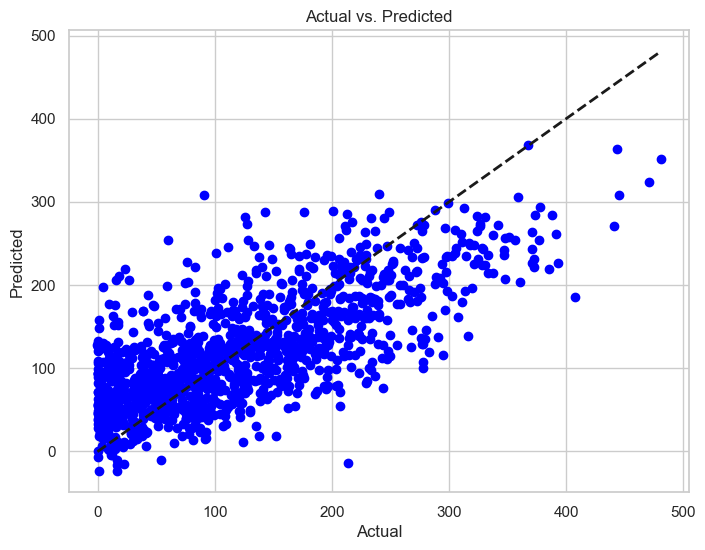

RMSE Training = 63.74452590442404


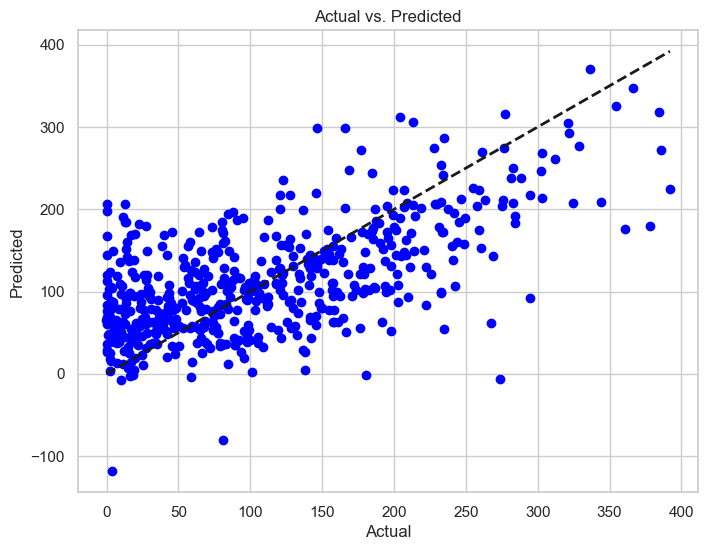

RMSE Testing = 69.04364875384324


In [171]:
linear_reg(x_train, x_test, y_train, y_test)

In [172]:
train_rb = rb_df[rb_df['season']!=2022]
test_rb = rb_df[rb_df['season']==2022]

In [173]:
# Saving player_id and player_name before dropping them
train_ids_names = train_rb[['player_id', 'player_name']]
test_ids_names = test_rb[['player_id', 'player_name']]

train_X = pd.get_dummies(train_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','fantasy_points_per_game' ]),drop_first=True).astype(float)
train_y = train_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = pd.get_dummies(test_rb.drop(columns=['position','player_id','player_name','season','fantasy_points_ppr_next_season','fantasy_points_per_game']),drop_first=True).astype(float)
test_y = test_rb['fantasy_points_ppr_next_season'].astype(float)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

In [174]:
train_X.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)
test_X.drop(columns = ['injury type_knee', 'injury type_no injury', 'injury type_suspension', 'injury severity_no injury', 'season ending_no injury', 'binned_weight_180-199', 'binned_height_78-80', 'injury severity_suspension', 'games_played', 'fantasy_points_ppr'], inplace = True)

                                  OLS Regression Results                                  
Dep. Variable:     fantasy_points_ppr_next_season   R-squared:                       0.507
Model:                                        OLS   Adj. R-squared:                  0.489
Method:                             Least Squares   F-statistic:                     27.67
Date:                            Fri, 31 May 2024   Prob (F-statistic):          5.56e-217
Time:                                    13:45:40   Log-Likelihood:                -9956.9
No. Observations:                            1786   AIC:                         2.004e+04
Df Residuals:                                1721   BIC:                         2.040e+04
Df Model:                                      64                                         
Covariance Type:                        nonrobust                                         
                                           coef    std err          t      P>|t|      [0.0

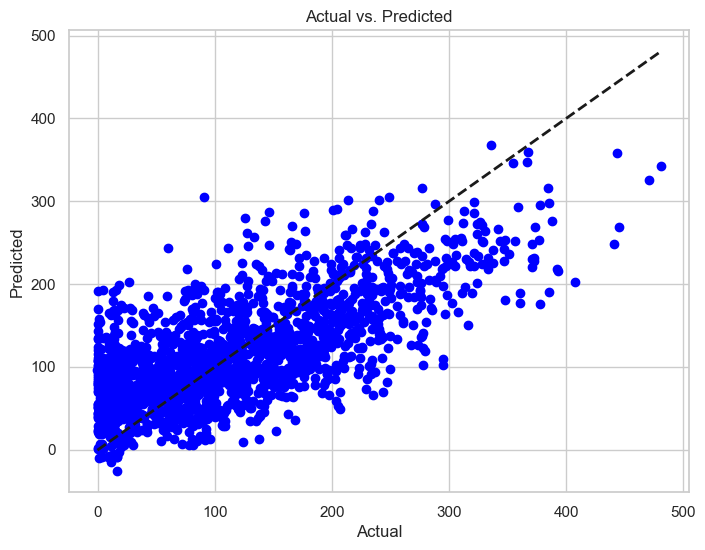

RMSE Training = 63.817748125987684


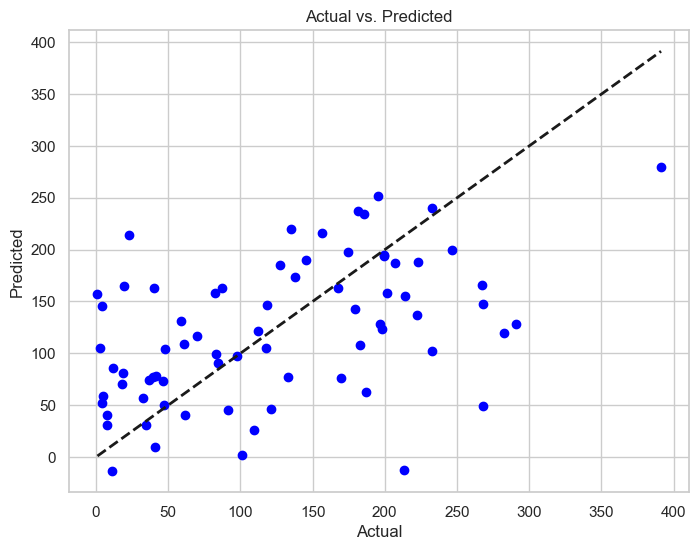

RMSE Testing = 82.57813288412403


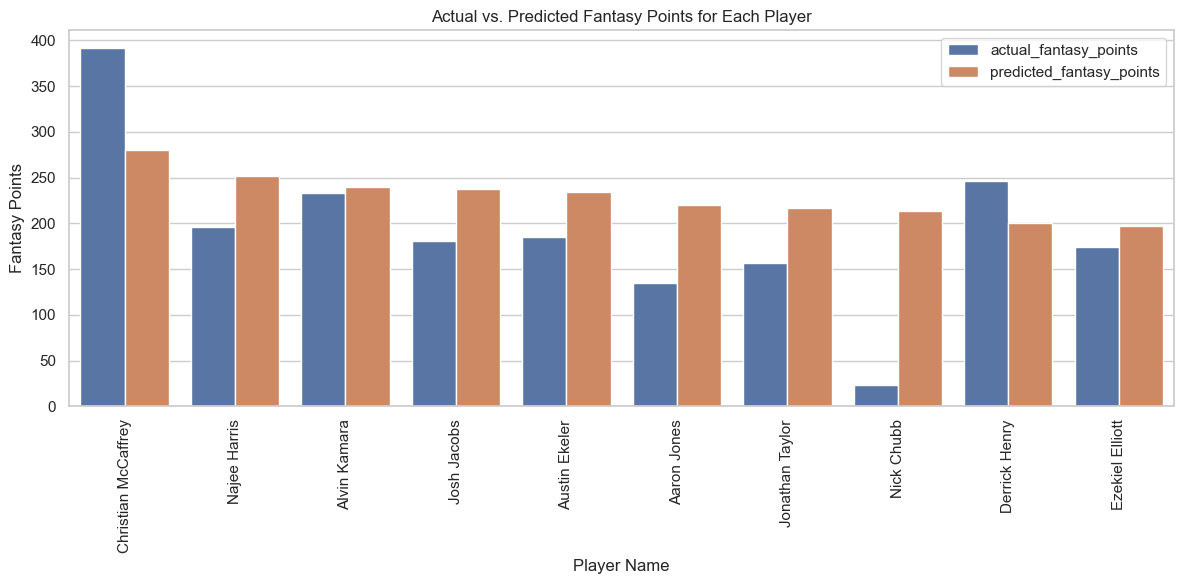

In [175]:
#predicts outcome for the 2023 season
linear_reg(train_X, test_X, train_y, test_y, test_ids_names)

### Random Forest

Out-of-Bag Score: 0.4661238639188715
Root Mean Squared Error: 84.56552085219244
R-squared: 0.11322950917846508


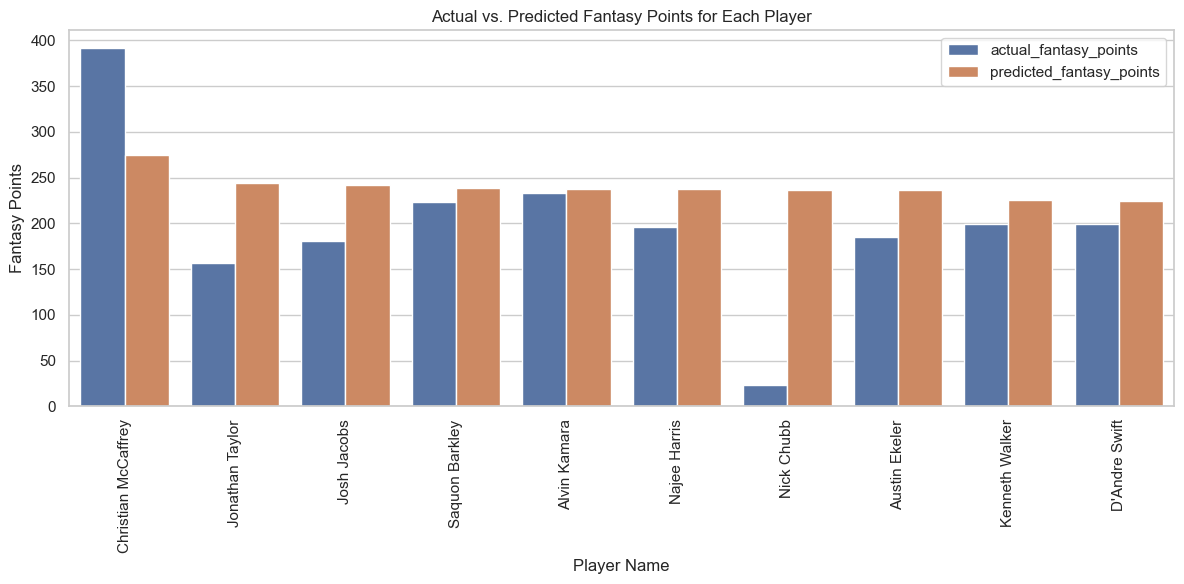

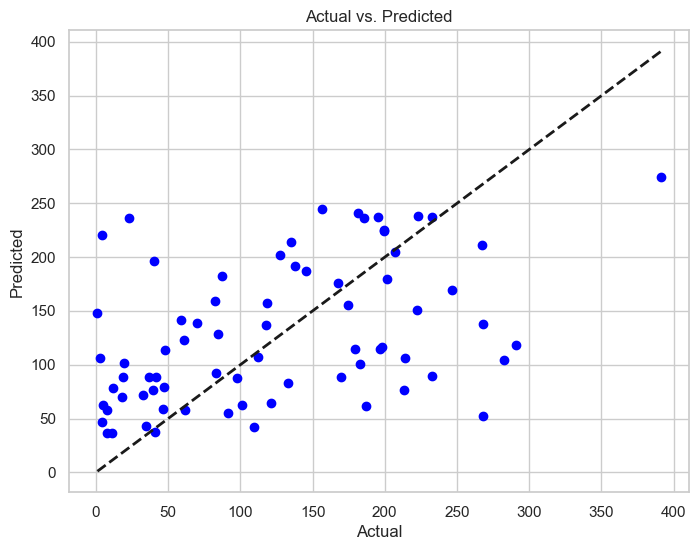

       player_id          player_name  actual_fantasy_points  \
1619  00-0033280  Christian McCaffrey                  391.3   
4448  00-0036223      Jonathan Taylor                  156.4   
4566  00-0035700          Josh Jacobs                  181.1   
7196  00-0034844       Saquon Barkley                  223.2   
225   00-0033906         Alvin Kamara                  233.0   

      predicted_fantasy_points  actual_points_rank  predicted_points_rank  
1619                274.395965                 1.0                    1.0  
4448                244.412836                29.0                    2.0  
4566                241.438516                24.0                    3.0  
7196                238.251213                10.0                    4.0  
225                 237.163591                 8.0                    5.0  


In [176]:
results = randomforest(train_X, test_X, train_y, test_y, test_ids_names)

# Display results
print(results.head())

In [177]:
results.sort_values('predicted_fantasy_points',ascending=False).head(60)

player_id            player_name  actual_fantasy_points  \
1619  00-0033280    Christian McCaffrey                 391.30   
4448  00-0036223        Jonathan Taylor                 156.40   
4566  00-0035700            Josh Jacobs                 181.10   
7196  00-0034844         Saquon Barkley                 223.20   
225   00-0033906           Alvin Kamara                 233.00   
6170  00-0036893           Najee Harris                 195.50   
6228  00-0034791             Nick Chubb                  23.10   
551   00-0033699          Austin Ekeler                 185.40   
4885  00-0038134         Kenneth Walker                 199.40   
1811  00-0036275          D'Andre Swift                 199.30   
5405  00-0033856      Leonard Fournette                   4.00   
44    00-0033293            Aaron Jones                 134.90   
4340  00-0033897              Joe Mixon                 267.00   
2212  00-0035685       David Montgomery                 207.20   
482   00-0036328         Antonio Gibson                 127.40   
1887  00-0033893            Dalvin Cook                  40.20   
8076  00-0037263         Tyler Allgeier                 137.60   
6728  00-0036875    Rhamondre Stevenson                 145.70   
6101  00-0035243          Miles Sanders                  87.60   
3780  00-0033553           James Conner                 201.50   
2588  00-0035250       Devin Singletary                 167.34   
2497  00-0032764          Derrick Henry                 246.66   
1889  00-0037258          Dameon Pierce                  82.70   
4766  00-0033923            Kareem Hunt                 118.50   
3110  00-0033045        Ezekiel Elliott                 174.50   
7843  00-0035261           Tony Pollard                 222.60   
3811  00-0035831         James Robinson                   1.00   
5917  00-0036924         Michael Carter                  58.80   
1660  00-0036360  Clyde Edwards-Helaire                  70.10   
6558  00-0037256          Rachaad White                 267.90   
7     00-0036265            A.J. Dillon                 117.60   
4126  00-0031376        Jerick McKinnon                  84.36   
3735  00-0033948        Jamaal Williams                  60.80   
953   00-0038120            Breece Hall                 290.50   
1057  00-0037746         Brian Robinson                 198.10   
3969  00-0036997       Javonte Williams                 179.20   
4015  00-0037228          Jaylen Warren                 196.40   
3003  00-0036567        Elijah Mitchell                  47.50   
5039  00-0036906         Khalil Herbert                 112.50   
3505  00-0037197          Isiah Pacheco                 213.90   
4930  00-0033118           Kenyan Drake                   3.10   
7904  00-0036973         Travis Etienne                 282.40   
5889  00-0032144          Melvin Gordon                  19.70   
1637  00-0036555          Chuba Hubbard                 182.50   
5308  00-0030513        Latavius Murray                  82.90   
3782  00-0037248             James Cook                 232.70   
8390  00-0036251              Zack Moss                 169.60   
1719  00-0030578  Cordarrelle Patterson                  36.90   
1899  00-0035657          Damien Harris                  19.00   
4076  00-0034115         Jeffery Wilson                  41.30   
4883  00-0036919       Kenneth Gainwell                  97.38   
163   00-0034972     Alexander Mattison                 133.20   
5746  00-0033308            Matt Breida                  46.90   
3545  00-0036158           J.K. Dobbins                  11.70   
1431  00-0034681          Chase Edmonds                  39.70   
4170  00-0037267            Jerome Ford                 213.20   
8064  00-0035537             Ty Johnson                  32.40   
774   00-0034414           Boston Scott                  17.80   
7129  00-0033526          Samaje Perine                 121.30   
6616  00-0034750          Rashaad Penny        

### XGBoost

avg_fantasy_points: 0.265983
year_in_league: 0.077306
binned_height_72-74: 0.029728
special_teams_tds: 0.028407
binned_draft_pick_Late Second Round: 0.025373
binned_draft_pick_Early 1st Round: 0.024835
binned_weight_200-219: 0.024398
receiving_yards_after_catch: 0.023417
(1=firstyearwithteam,0=2+seasons): 0.022379
binned_weight_240-259: 0.022136
binned_weight_220-239: 0.021912
receiving_epa: 0.021422
rushing_epa: 0.020035
target_share: 0.019909
receiving_air_yards: 0.019519
wopr: 0.019243
years_coached: 0.019164
binned_draft_pick_Fourth Round: 0.018951
rushing_fumbles: 0.018323
racr: 0.017860
binned_draft_pick_Third Round: 0.017832
binned_height_69-71: 0.016756
air_yards_share: 0.016544
rushing_2pt_conversions: 0.015665
ties: 0.015603
wins: 0.015479
changed_teams_midseason: 0.015394
injured: 0.014108
binned_draft_pick_Late First Round: 0.013779
receiving_fumbles: 0.013356
receiving_tds: 0.011902
injury type_toe: 0.011607
season ending_yes: 0.011605
receiving_2pt_conversions: 0.010687
b

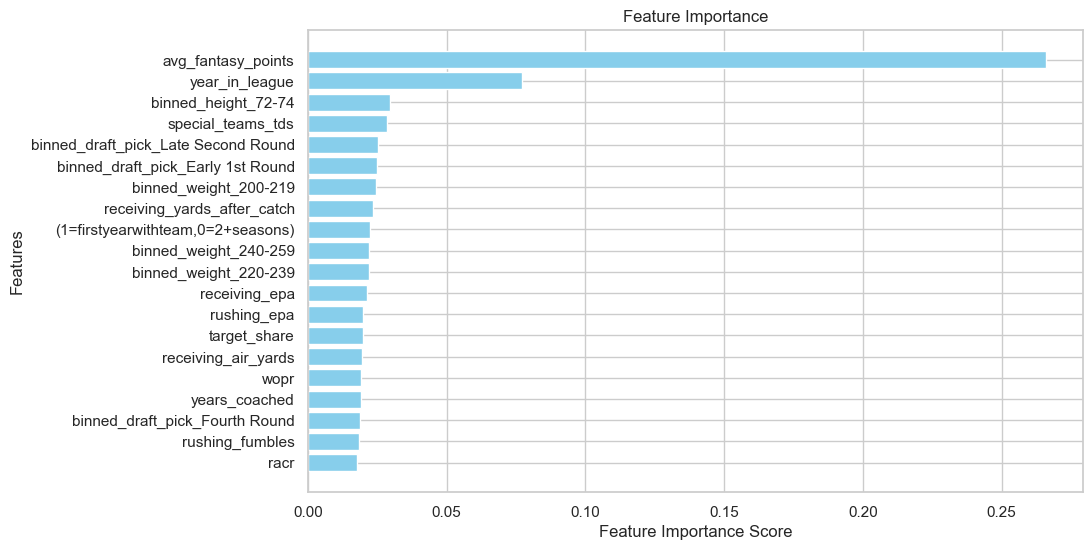

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Root Mean Squared Error: 84.12050893979647
R-squared: 0.122537915443801


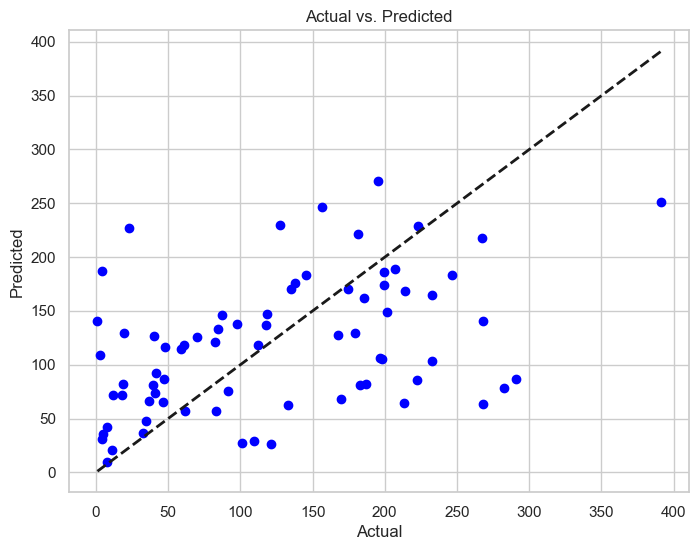

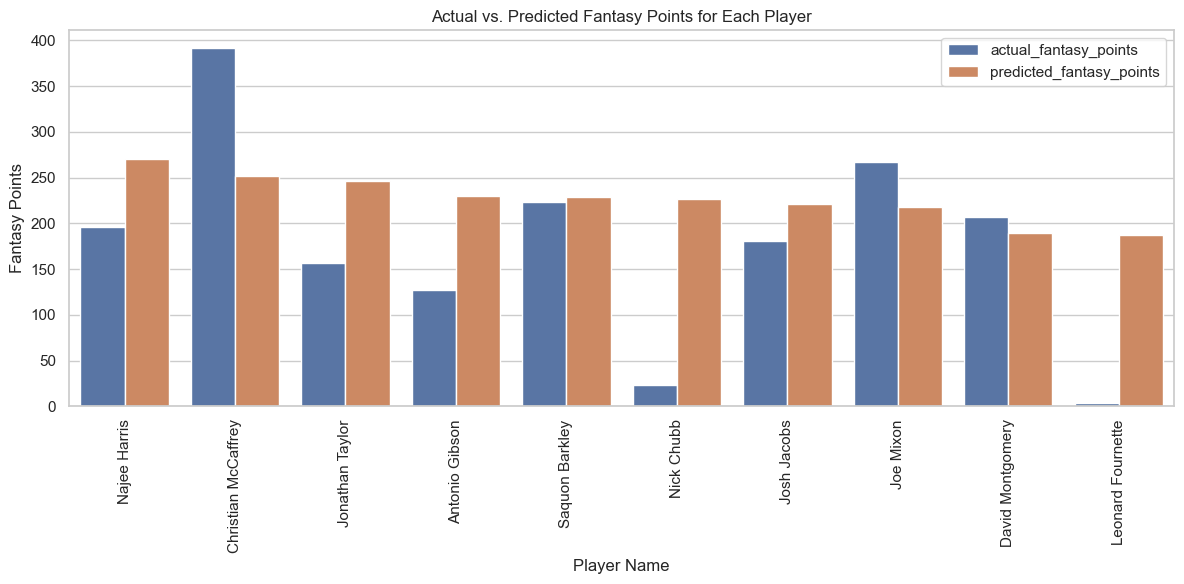

In [178]:
xg_results = xgboost(train_X, test_X, train_y, test_y, test_ids_names )

### Gradient Boosting

avg_fantasy_points: 0.560349
year_in_league: 0.101289
rushing_epa: 0.047825
target_share: 0.039269
receiving_epa: 0.039096
racr: 0.036063
air_yards_share: 0.026443
receiving_yards_after_catch: 0.021549
receiving_air_yards: 0.018213
rushing_fumbles: 0.014978
wopr: 0.014053
years_coached: 0.013068
wins: 0.010272
injured: 0.007463
receiving_fumbles: 0.005639
receiving_tds: 0.004793
new_team: 0.002840
binned_draft_pick_Third Round: 0.002474
QB_4000_yards: 0.002455
binned_draft_pick_Early 1st Round: 0.002108
binned_weight_200-219: 0.002080
binned_draft_pick_Seventh Round: 0.002017
binned_weight_240-259: 0.001953
Receiving_1000_yards: 0.001434
injury type_leg: 0.001415
injury type_chest: 0.001337
binned_height_69-71: 0.001256
(1=firstyearwithteam,0=2+seasons): 0.001237
binned_draft_pick_Late First Round: 0.001169
special_teams_tds: 0.001129
ties: 0.001112
changed_teams_midseason: 0.001089
binned_draft_pick_Early Second Round: 0.000983
rushing_2pt_conversions: 0.000891
binned_draft_pick_Late 

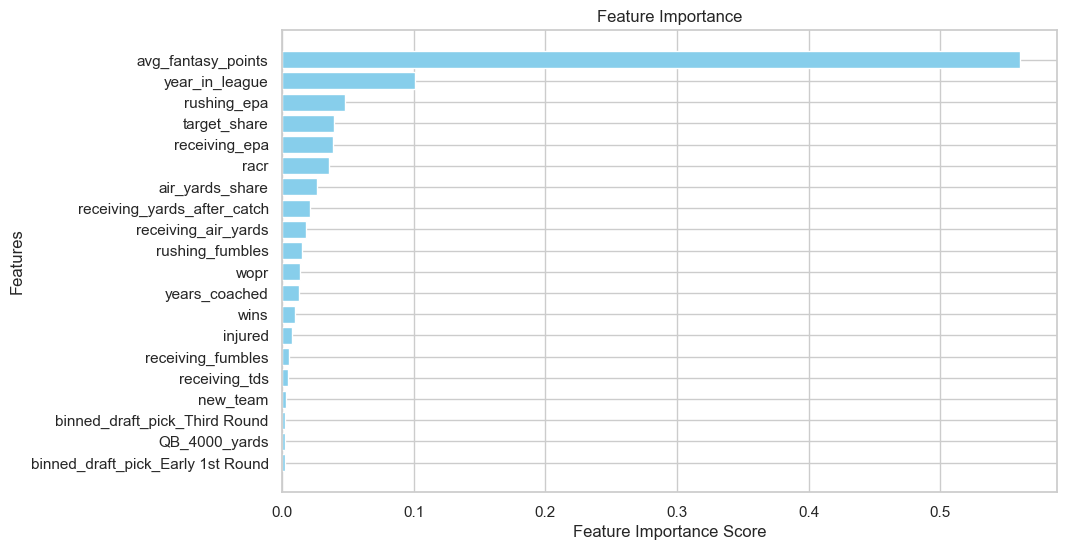

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 86.36897712375897
R-squared: 0.07500341603738037


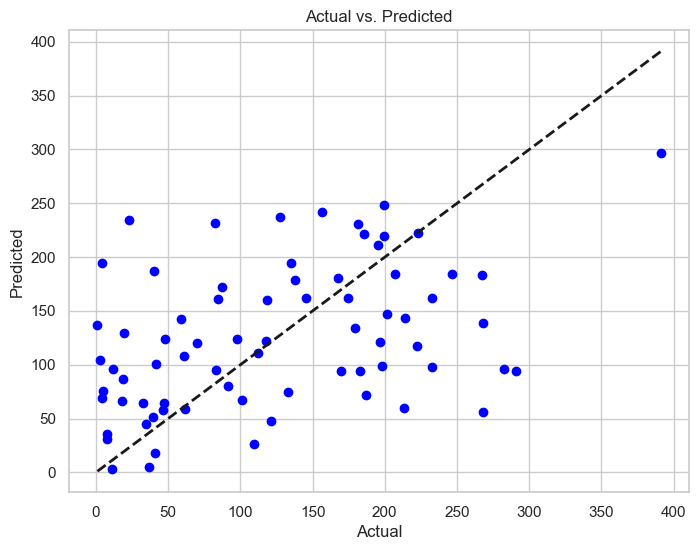

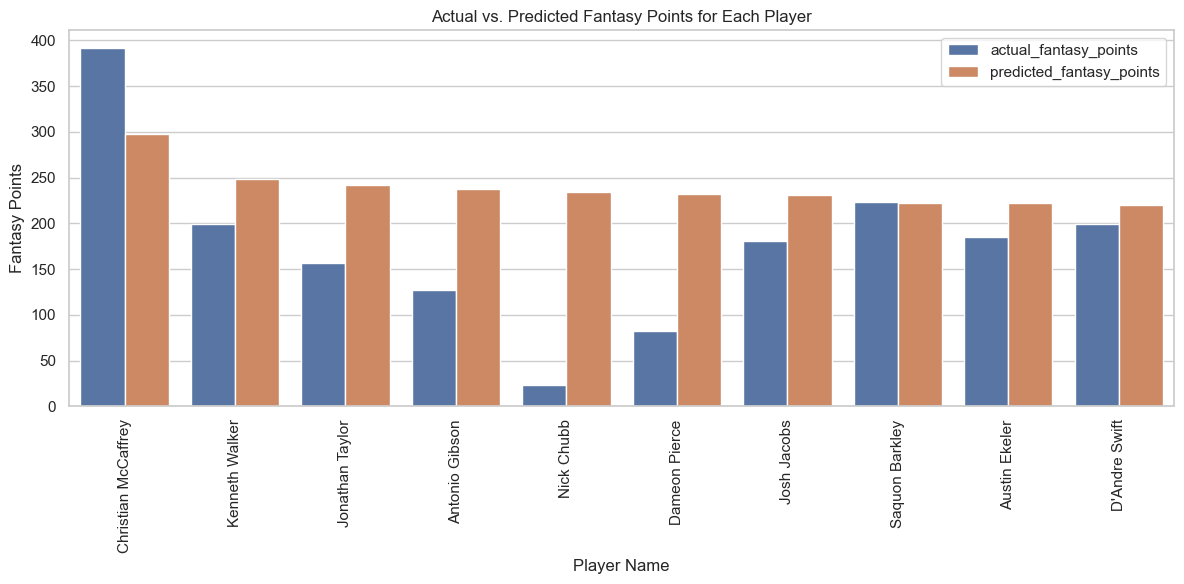

In [179]:
gb_results = gradientboosting(train_X, test_X, train_y, test_y, test_ids_names)

### Voting Regression

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Root Mean Squared Error: 84.02953960022306
R-squared: 0.12443469393050921


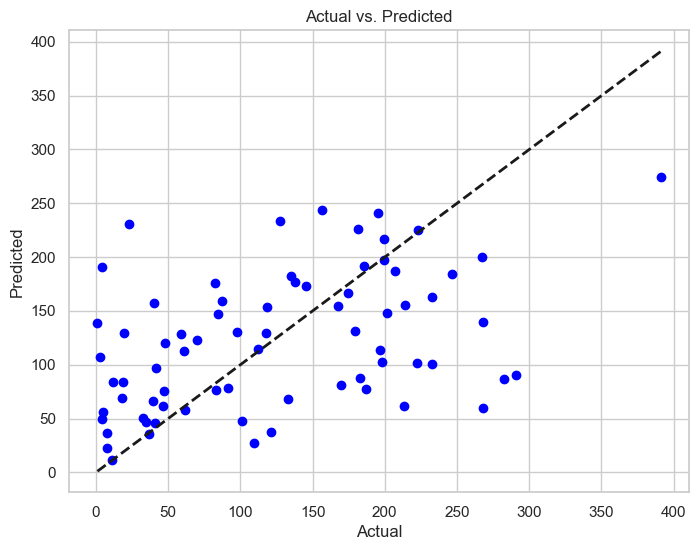

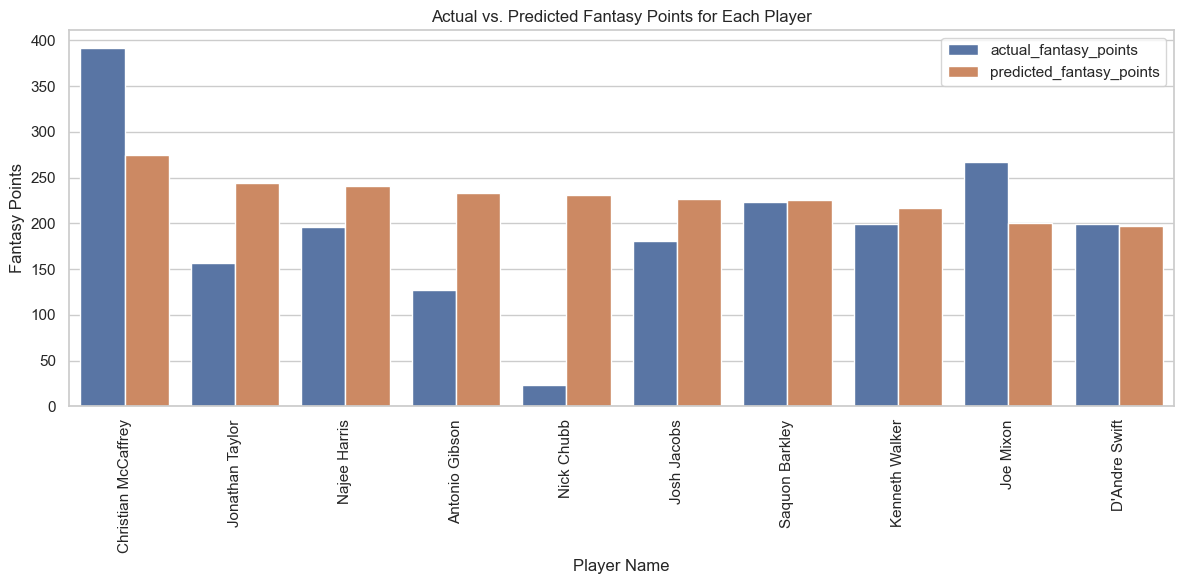

In [180]:
votingregressor(xg_results, gb_results )